##  Contents<a id='2.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Objectives](#1.3_Objectives)
  * [1.4 Imports](#1.4_Imports)
  * [1.5 Load New York Housing Data](#1.5_Newyork_Housing_Data)
  * [1.6 Explore The Data](#1.6_Explore_The_Data)
    * [1.6.1 Clean the data](#1.6.1 Clean)
    * [1.6.2 Drop Rows With No Price Data](#1.6.2_Drop_Rows_With_No_Price_Data)
    * [1.6.3 Target Area](#1.6.3_Target_Area)
    * [1.6.4 Number Of Missing Values By Column](#1.6.4_Number_Of_Missing_Values_By_Column)
    * [1.6.5 Relabeling of Columns](#1.6.5_Relabel_Columns)
      * [1.6.5.1 Fixing Datatypes of Columns](#1.6.5.1_Fixing_Datatypes_of_columns)
      * [1.6.5.2 Reverse Geolocator](#1.6.5.2_Reverse_Geolocator)
    * [1.6.6 Distribution](#1.6.6_Distribution)
      * [1.6.6.1 Number of distinct neighborhoods](#1.6.6.1_Number_of_distinct_neighborhoods)
      * [1.6.6.2 Distribution Of Housing Price By Neighborhood](#1.6.6.2_Distribution_Of_Housing_Price_By_Neighborhood)
  * [1.7 Neighborhood Statistics](#1.7_Neighborhood_Statistics)
  * [1.8 Save data](#1.8_Save_data)
  * [1.9 Summary](#1.9_Summary)


## 1.2 Introduction<a id='1.2_Introduction and Problem'></a>

Capital Fortune is a midwest real estate company who is looking to invest in the ever-growing NYC market and have bought a significant amount of land in  Brooklyn NY which they have start to build many houses that will be finished 2024. These houses will be single-family homes with  They are seeking help from us to estimate the best pricing for their houses as well as what type of housing equates to the highest net-profit.

## 1.3 Objectives<a id='1.3_Objectives'></a>

Our objective will be to give the best house estimates for Capital Fortune houses which are comparable to other houses in the NYC area, as well as determine which house type yield the highest profit. I will be analyzing similar build houses as well as how those houses price are affected via location and build. In order to achieve our goal we will be using Zillow's Housing dataset which has records upto 01/20/2021

## 1.4 Imports<a id='1.4_Imports'></a>

In [293]:
#Lets get our imports
import pandas as pd
import seaborn as sns
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import matplotlib.ticker as tick

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from collections import Counter

ModuleNotFoundError: No module named 'save_file'

## 1.5 Load New York Housing Data<a id='1.5_Newyork_Housing_Data'></a>

In [2]:
#Lets load up the raw data aka nyc_raw_data
nyc_rd = pd.read_csv('../data/newyork_housing.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,5,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,

In [3]:
#Lets see what we're working with.
nyc_rd.info()
#Looks like there are 75630 observations and 1507 columns, thats a lot of features we going to have to shrink that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75630 entries, 0 to 75629
Columns: 1507 entries, address/city to zpid
dtypes: bool(13), float64(440), int64(2), object(1052)
memory usage: 863.0+ MB


In [4]:
#Let's take a peek at what our dataframe looks like
nyc_rd.head()
#Right off the bat we see a lot of missing data and some columns which are similar like address 

address/city  address/community address/neighborhood address/state  \
0     New York                NaN                  NaN            NY   
1        Bronx                NaN                  NaN            NY   
2        Bronx                NaN                  NaN            NY   
3        Bronx                NaN                  NaN            NY   
4        Bronx                NaN                  NaN            NY   

  address/streetAddress address/subdivision  address/zipcode  bathrooms  \
0   60 Terrace View Ave                 NaN          10463.0        2.0   
1        625 W 246th St                 NaN          10471.0        8.0   
2        716 W 231st St                 NaN          10463.0        3.0   
3        750 W 232nd St                 NaN          10463.0        6.0   
4        632 W 230th St                 NaN          10463.0        6.0   

   bedrooms currency  ...  schools/2/link schools/2/name schools/2/rating  \
0       5.0      USD  ...             NaN            NaN              NaN   
1       8.0      USD  ...             NaN            NaN              NaN   
2       4.0      USD  ...             NaN            NaN              NaN   
3       5.0      USD  ...             NaN            NaN              NaN   
4       5.0      USD  ...             NaN            NaN              NaN   

   schools/2/size  schools/2/studentsPerTeacher  schools/2/totalCount  \
0             NaN                           NaN                   NaN   
1             NaN                           NaN                   NaN   
2             NaN                           NaN                   NaN   
3             NaN                           NaN                   NaN   
4             NaN                           NaN                   NaN   

  schools/2/type                                                url yearBuilt  \
0            NaN  https://www.zillow.com/homedetails/60-Terrace-...    1920.0   
1            NaN  https://www.zillow.com/homedetails/625-W-246th...    1940.0   
2            NaN  https://www.zillow.com/homedetails/716-W-231st...    1920.0   
3            NaN  https://www.zillow.com/homedetails/750-W-232nd...    1950.0   
4            NaN  https://www.zillow.com/homedetails/632-W-230th...    2020.0   

           zpid  
0  3.155405e+07  
1  2.985412e+07  
2  2.985186e+07  
3  2.985186e+07  
4  2.077107e+09  

[5 rows x 1507 columns]

In [5]:
#I want to create a index or id column so when we remove columns its easy to merge on a column
nyc_rd['id'] = nyc_rd.index


In [6]:
nyc_rd['id']

0            0
1            1
2            2
3            3
4            4
         ...  
75625    75625
75626    75626
75627    75627
75628    75628
75629    75629
Name: id, Length: 75630, dtype: int64

### 1.6.1 Clean the Data<a id='1.6.1_Clean_the_Data'></a>

In [7]:
#Lets do a deeper dive into the columns
pd.set_option('display.max_columns', None)
nyc_rd_columns = nyc_rd.columns.tolist()
nyc_rd_columns
#We can see see there a lot redundant, irrelevant, and columns with missing data which we dont need lets drop them specifically 
#Lets deal with the irrelevant columns with photos first 

['address/city',
 'address/community',
 'address/neighborhood',
 'address/state',
 'address/streetAddress',
 'address/subdivision',
 'address/zipcode',
 'bathrooms',
 'bedrooms',
 'currency',
 'dateposted',
 'description',
 'homeStatus',
 'latitude',
 'livingArea',
 'longitude',
 'photos/0',
 'photos/1',
 'photos/2',
 'photos/3',
 'photos/4',
 'photos/5',
 'photos/6',
 'photos/7',
 'photos/8',
 'photos/9',
 'photos/10',
 'photos/11',
 'photos/12',
 'photos/13',
 'photos/14',
 'photos/15',
 'photos/16',
 'photos/17',
 'photos/18',
 'photos/19',
 'photos/20',
 'photos/21',
 'photos/22',
 'photos/23',
 'photos/24',
 'photos/25',
 'photos/26',
 'photos/27',
 'photos/28',
 'photos/29',
 'photos/30',
 'photos/31',
 'photos/32',
 'photos/33',
 'photos/34',
 'photos/35',
 'photos/36',
 'photos/37',
 'photos/38',
 'photos/39',
 'photos/40',
 'photos/41',
 'photos/42',
 'photos/43',
 'photos/44',
 'photos/45',
 'photos/46',
 'photos/47',
 'photos/48',
 'photos/49',
 'photos/50',
 'photos/51',
 '

### 1.6.2 Dropping Columns<a id='1.6.2_Dropping_Column'></a>


In [8]:
nyc_rd = nyc_rd.drop(nyc_rd.filter(like='photos',axis=1).columns,axis=1)
nyc_rd_columns = nyc_rd.columns.tolist()
#Lets look at our new columns
nyc_rd_columns
#Still a lot of work to be done there is a lot of columns with price history do we really need that many?
#Lets investigate

['address/city',
 'address/community',
 'address/neighborhood',
 'address/state',
 'address/streetAddress',
 'address/subdivision',
 'address/zipcode',
 'bathrooms',
 'bedrooms',
 'currency',
 'dateposted',
 'description',
 'homeStatus',
 'latitude',
 'livingArea',
 'longitude',
 'price',
 'priceHistory',
 'priceHistory/0/attributeSource/infoString1',
 'priceHistory/0/attributeSource/infoString2',
 'priceHistory/0/attributeSource/infoString3',
 'priceHistory/0/buyerAgent',
 'priceHistory/0/buyerAgent/name',
 'priceHistory/0/buyerAgent/photo',
 'priceHistory/0/buyerAgent/photo/url',
 'priceHistory/0/buyerAgent/profileUrl',
 'priceHistory/0/event',
 'priceHistory/0/postingIsRental',
 'priceHistory/0/price',
 'priceHistory/0/priceChangeRate',
 'priceHistory/0/sellerAgent',
 'priceHistory/0/sellerAgent/name',
 'priceHistory/0/sellerAgent/photo',
 'priceHistory/0/sellerAgent/photo/url',
 'priceHistory/0/sellerAgent/profileUrl',
 'priceHistory/0/showCountyLink',
 'priceHistory/0/source',
 'p

In [9]:
nyc_rd.filter(like='priceHistory', axis=1)

priceHistory priceHistory/0/attributeSource/infoString1  \
0               NaN                                        NaN   
1               NaN           7e926562cd277890e4e3da97173191ad   
2               NaN                                        NaN   
3               NaN           8fc1856e2d9a089a07098efa626531d7   
4               NaN           336048b9faf140601813bb877d92efd2   
...             ...                                        ...   
75625           NaN                        2376928166089795382   
75626           NaN                                        NaN   
75627           NaN                                        NaN   
75628           NaN                                        NaN   
75629           NaN                                        NaN   

             priceHistory/0/attributeSource/infoString2  \
0                               Keller Williams via MLS   
1                                        Trebach Realty   
2      William Raveis Real Estate, Mortgage & Insurance   
3                                            StreetEasy   
4                                        Trebach Realty   
...                                                 ...   
75625                                   Broker Provided   
75626                                     Public Record   
75627                                     Public Record   
75628                                     Public Record   
75629                                     Public Record   

       priceHistory/0/attributeSource/infoString3  priceHistory/0/buyerAgent  \
0                                             NaN                        NaN   
1                                             NaN                        NaN   
2                                             NaN                        NaN   
3                                             NaN                        NaN   
4                                             NaN                        NaN   
...                                           ...                        ...   
75625                                         NaN                        NaN   
75626                                         NaN                        NaN   
75627                                         NaN                        NaN   
75628                                         NaN                        NaN   
75629                                         NaN                        NaN   

               priceHistory/0/buyerAgent/name  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
75625                                     NaN   
75626                              GiGi Malek   
75627  Terrace Sotheby's International Realty   
75628                                     NaN   
75629                                     NaN   

       priceHistory/0/buyerAgent/photo  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
75625                              NaN   
75626                              NaN   
75627                              NaN   
75628                              NaN   
75629                              NaN   

                     priceHistory/0/buyerAgent/photo/url  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
75625                         

In [10]:
nyc_rd['priceHistory'] != 'NaN'
#We can see the priceHistory column is useless it all missing data lets drop this column
#I am going to have to drop a lot of columns which serve no purpose similar to priceHistory 


0        True
1        True
2        True
3        True
4        True
         ... 
75625    True
75626    True
75627    True
75628    True
75629    True
Name: priceHistory, Length: 75630, dtype: bool

In [11]:
#Most of the columns are a history of price change but we won't be needing this for our problem so we will be ridding ourselfs
#of all columns with priceHistory
nyc_rd = nyc_rd.drop(nyc_rd.filter(like='priceHistory',axis=1).columns,axis=1)
nyc_rd_columns = nyc_rd.columns.tolist()
#Lets look at our new columns
nyc_rd_columns

['address/city',
 'address/community',
 'address/neighborhood',
 'address/state',
 'address/streetAddress',
 'address/subdivision',
 'address/zipcode',
 'bathrooms',
 'bedrooms',
 'currency',
 'dateposted',
 'description',
 'homeStatus',
 'latitude',
 'livingArea',
 'longitude',
 'price',
 'propertyTaxRate',
 'resoFactsStats/aboveGradeFinishedArea',
 'resoFactsStats/accessibilityFeatures',
 'resoFactsStats/accessibilityFeatures/0',
 'resoFactsStats/accessibilityFeatures/1',
 'resoFactsStats/additionalParcelsDescription',
 'resoFactsStats/appliances',
 'resoFactsStats/appliances/0',
 'resoFactsStats/appliances/1',
 'resoFactsStats/appliances/2',
 'resoFactsStats/appliances/3',
 'resoFactsStats/appliances/4',
 'resoFactsStats/appliances/5',
 'resoFactsStats/appliances/6',
 'resoFactsStats/appliances/7',
 'resoFactsStats/appliances/8',
 'resoFactsStats/appliances/9',
 'resoFactsStats/appliances/10',
 'resoFactsStats/appliances/11',
 'resoFactsStats/appliances/12',
 'resoFactsStats/applian

In [12]:
nyc_rd.filter(like='resoFact', axis=1)
#There are a lot of good information here like the appliances in the house, garage, parking, etc but unfortunately 
#there are too many missing values in a lot of this so I will be selecting columns that have a significant amount of data
#as well as ridding the appliciances columns as it might add value to a house it doesn't relate to CapitalFortune
#Housing as they will be sold empty

resoFactsStats/aboveGradeFinishedArea  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
75625                                   NaN   
75626                                   NaN   
75627                                   NaN   
75628                                   NaN   
75629                                   NaN   

       resoFactsStats/accessibilityFeatures  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
75625                                   NaN   
75626                                   NaN   
75627                                   NaN   
75628                                   NaN   
75629                                   NaN   

      resoFactsStats/accessibilityFeatures/0  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
75625                                    NaN   
75626                                    NaN   
75627                                    NaN   
75628                                    NaN   
75629                                    NaN   

      resoFactsStats/accessibilityFeatures/1  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
75625                                    NaN   
75626                                    NaN   
75627                                    NaN   
75628                                    NaN   
75629                                    NaN   

      resoFactsStats/additionalParcelsDescription  resoFactsStats/appliances  \
0                                             NaN                        NaN   
1                                             NaN                        NaN   
2                                             NaN                        NaN   
3                                             NaN                        NaN   
4                                             NaN                        NaN   
...                                           ...                        ...   
75625                                         NaN                        NaN   
75626                                         NaN                        NaN   
75627                                         NaN                        NaN   
75628                                         NaN                        NaN   
75629                                         NaN                        NaN   

      resoFactsStats/appliances/0 resoFactsStats/appliances/1  \
0                             NaN                         NaN   
1                      Dishwasher                       Dryer   
2                      Dishwasher                       Dryer   
3                             NaN                         NaN   
4                      Dishwasher                       Dryer   
...                           ...                         ...   
75625                         NaN                         NaN   
75626                         NaN                         NaN   
75627                         NaN                         NaN   
75628                         NaN                         NaN   
75629                  Dishwasher             

In [13]:
reso_drop_list = [] 
for i in nyc_rd_columns:
    if 'reso' in i:
        reso_drop_list.append(i)
        
len(reso_drop_list)

606

In [14]:
#After some tedious work on seeing which reso columns has reliable data as most were missing and irrelevant these 
#were the columns left that seem relevant but there will be further cleaning.
reso_list = ['resoFactsStats/atAGlanceFacts/0/factValue', 'resoFactsStats/atAGlanceFacts/1/factValue', 
            'resoFactsStats/atAGlanceFacts/3/factLabel','resoFactsStats/atAGlanceFacts/4/factLabel', 'resoFactsStats/atAGlanceFacts/4/factValue',
            'resoFactsStats/atAGlanceFacts/7/factLabel','resoFactsStats/atAGlanceFacts/7/factValue', 'resoFactsStats/basement', 'resoFactsStats/bathrooms', 'resoFactsStats/bathroomsFull', 
            'resoFactsStats/bathroomsHalf', 'resoFactsStats/bedrooms', 'resoFactsStats/cityRegion',
            'resoFactsStats/hasCooling', 'resoFactsStats/hasFireplace', 'resoFactsStats/hasHeating', 'resoFactsStats/hasSpa',
            'resoFactsStats/homeType', 'resoFactsStats/livingArea', 'resoFactsStats/lotSize', 'resoFactsStats/parkingFeatures/0',
            'resoFactsStats/parkingFeatures/1', 'resoFactsStats/stories', 'resoFactsStats/taxAnnualAmount', 'resoFactsStats/taxAssessedValue',
             'resoFactsStats/yearBuilt']


In [15]:

reso_drop = [x for x in reso_drop_list if x not in reso_list]
reso_drop

['resoFactsStats/aboveGradeFinishedArea',
 'resoFactsStats/accessibilityFeatures',
 'resoFactsStats/accessibilityFeatures/0',
 'resoFactsStats/accessibilityFeatures/1',
 'resoFactsStats/additionalParcelsDescription',
 'resoFactsStats/appliances',
 'resoFactsStats/appliances/0',
 'resoFactsStats/appliances/1',
 'resoFactsStats/appliances/2',
 'resoFactsStats/appliances/3',
 'resoFactsStats/appliances/4',
 'resoFactsStats/appliances/5',
 'resoFactsStats/appliances/6',
 'resoFactsStats/appliances/7',
 'resoFactsStats/appliances/8',
 'resoFactsStats/appliances/9',
 'resoFactsStats/appliances/10',
 'resoFactsStats/appliances/11',
 'resoFactsStats/appliances/12',
 'resoFactsStats/appliances/13',
 'resoFactsStats/appliances/14',
 'resoFactsStats/architecturalStyle',
 'resoFactsStats/associationAmenities',
 'resoFactsStats/associationAmenities/0',
 'resoFactsStats/associationAmenities/1',
 'resoFactsStats/associationFee',
 'resoFactsStats/associationFee2',
 'resoFactsStats/associationFeeInclud

In [16]:
#Making a new dataframe of only reso_list so I can drop all reso columns and re-merge with the reso columns
#we want
#Drop all columns with reso
nyc_rd = nyc_rd.drop(reso_drop,axis=1)

nyc_rd

address/city  address/community address/neighborhood  \
0                  New York                NaN                  NaN   
1                     Bronx                NaN                  NaN   
2                     Bronx                NaN                  NaN   
3                     Bronx                NaN                  NaN   
4                     Bronx                NaN                  NaN   
...                     ...                ...                  ...   
75625              Flushing                NaN                  NaN   
75626  Forest Hills Gardens                NaN                  NaN   
75627  Forest Hills Gardens                NaN                  NaN   
75628              Flushing                NaN                  NaN   
75629              Flushing                NaN                  NaN   

      address/state address/streetAddress address/subdivision  \
0                NY   60 Terrace View Ave                 NaN   
1                NY        625 W 246th St                 NaN   
2                NY        716 W 231st St                 NaN   
3                NY        750 W 232nd St                 NaN   
4                NY        632 W 230th St                 NaN   
...             ...                   ...                 ...   
75625            NY         6829 Manse St                 NaN   
75626            NY       82 Greenway Ter                 NaN   
75627            NY       86 Greenway Ter                 NaN   
75628            NY         8913 70th Ave                 NaN   
75629            NY         7049 Manse St                 NaN   

       address/zipcode  bathrooms  bedrooms currency    dateposted  \
0              10463.0        2.0       5.0      USD  1.610134e+12   
1              10471.0        8.0       8.0      USD  1.595968e+12   
2              10463.0        3.0       4.0      USD  1.592668e+12   
3              10463.0        6.0       5.0      USD  1.600814e+12   
4              10463.0        6.0       5.0      USD  1.605751e+12   
...                ...        ...       ...      ...           ...   
75625          11375.0        2.0       3.0      USD           NaN   
75626          11375.0        6.0       6.0      USD           NaN   
75627          11375.0        5.0       6.0      USD           NaN   
75628          11375.0        NaN       NaN      USD           NaN   
75629          11375.0        2.0       3.0      USD           NaN   

                                             description homeStatus  \
0      Discover Marble Hill, a neighborhood rich with...   FOR_SALE   
1      EXCLUSIVE BRAND NEW\nLavish Newly Built 8-Bd. ...   FOR_SALE   
2      This 4233 square foot single family home has 4...   FOR_SALE   
3      EXCLUSIVE NEW TO MARKET\nPrime Renovation Oppo...   FOR_SALE   
4      EXCLUSIVE JUST LISTED\nNewly Built 5-Bd. Stucc...   FOR_SALE   
...                                                  ...        ...   
75625  Wonderful 1 Family Home. First Floor Features ...       SOLD   
75626  "DISTINQUISHED FIELDSTONE TOWNHOUSE TREASURE"\...       SOLD   
75627  EXCLUSIVE LISTING OF TERRACE SOTHEBY'S INTERNA...       SOLD   
75628  8913 70th Ave, Flushing, NY 11375 is a single ...       SOLD   
75629  7049 Manse St, Flushing, NY 11375 is a single ...       SOLD   

        latitude  livingArea  longitude      price  propertyTaxRate  \
0      40.877743      1889.0 -73.910866   799999.0             0.88   
1      40.892689      7000.0 -73.910667  3995000.0             0.95   
2      40.883419      4233.0 -73.918106  1495000.0             0.95   
3      40.885033      7000.0 -73.917793  3450000.0             0.95   
4      40.881702         NaN -73.914185  1790000.0             0.95   
...          ...         ...        ...        ...              ...   
75625  40.714203      2417.0 -73.855263   825000.0             0.84   
75626  40.717163      6085.0 -73.843124  2704000.0             0.84   
75627  40.717052      4564.0 -73.843025  2750000

In [17]:
#Lets look into the address/community and address/neighborhood on surface I see a alot of NaN
nyc_rd['address/community'].isnull().sum()
#Looks like they are all NaN so we can drop

75630

In [18]:
nyc_rd['address/neighborhood'].isnull().sum()
#Most observation is missing we can drop as we can use address/city plus zipcode to identify the area

74953

In [19]:
nyc_rd['address/zipcode'].isnull().sum
#We will keep this col

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
75625    False
75626    False
75627    False
75628    False
75629    False
Name: address/zipcode, Length: 75630, dtype: bool>

In [20]:
nyc_rd['address/subdivision'].isnull().sum()
#Drop

75628

In [21]:
nyc_rd['resoFactsStats/basement'].isnull().sum()
#A lot missing but important factor in price of houses lets keep this

48534

In [22]:
#Lets check if bathrooms and resoFacts/bathrooms are the same if so lets drop one
print((nyc_rd['bathrooms'] != nyc_rd['resoFactsStats/bathrooms']).sum())
#Hmm thats weird 20k of oberservation have different values lets see if there are NaN
print(nyc_rd['bathrooms'].isnull().sum())
print(nyc_rd['resoFactsStats/bathrooms'].isnull().sum())
#We can see that resoFactsbathrooms has less missing values than  bathrooms col so lets drop bathrooms

20298
19053
15312


In [23]:
#Now we need to check the same for bedrooms
print((nyc_rd['bedrooms'] != nyc_rd['resoFactsStats/bedrooms']).sum())
print(nyc_rd['bedrooms'].isnull().sum())
print(nyc_rd['resoFactsStats/bedrooms'].isnull().sum())
#Seems like bedrooms col has more missing 

19464
19464
16328


In [24]:
#Now we need to check the city/region
print((nyc_rd['address/city'] != nyc_rd['resoFactsStats/cityRegion']).sum())
print(nyc_rd['address/city'].isnull().sum())
print(nyc_rd['resoFactsStats/cityRegion'].isnull().sum())
#Seems like the discrepancies is probably from the way the string was typed so either one can be dropped

773
1
1


In [25]:
#resoFactsStats/homeType col and resoFactsStats/atAGlanceFacts/0/factValue seem to have same values lets check

print((nyc_rd['resoFactsStats/homeType'] != nyc_rd['resoFactsStats/atAGlanceFacts/0/factValue']).sum())
print(nyc_rd['resoFactsStats/homeType'].isnull().sum())
print(nyc_rd['resoFactsStats/atAGlanceFacts/0/factValue'].isnull().sum())
#They both tell the type of house it is and since hometype has more missing i will drop it

373
0
286


In [26]:
#Need to do the same for living area now
print((nyc_rd['livingArea'] != nyc_rd['resoFactsStats/livingArea']).sum())
print(nyc_rd['livingArea'].isnull().sum())
print(nyc_rd['resoFactsStats/livingArea'].isnull().sum())
# They all appear like they are not equal because reso usings sqft after its value whereas livingArea col does not
#regardless it seems resoLivingArea has less missing data so we keept it 

75630
9211
9182


In [27]:
#esoFactsStats/atAGlanceFacts/1/factValue and reso/yearBuilt seem to both have the year the house was built
print((nyc_rd['resoFactsStats/atAGlanceFacts/1/factValue'] != nyc_rd['resoFactsStats/yearBuilt']).sum())
print(nyc_rd['resoFactsStats/atAGlanceFacts/1/factValue'].isnull().sum())
print(nyc_rd['resoFactsStats/yearBuilt'].isnull().sum())
print(nyc_rd['yearBuilt'].isnull().sum())
#Here there are 3 columns with the same info lets drop the two with the most missing values
#The biggest different is probably due to the fact one col has int and the other floats so lets drop the one with more missing values

44265
5688
5692
5732


In [28]:
#Further columns to drop
drop_cols = ['zpid', 'url', 'address/community', 'address/neighborhood', 'address/subdivision', 'currency', 'dateposted'
            , 'homeStatus', 'description', 'bathrooms', 'bedrooms', 'resoFactsStats/cityRegion', 'resoFactsStats/homeType'
            , 'resoFactsStats/atAGlanceFacts/3/factLabel', 'livingArea', 'resoFactsStats/yearBuilt', 'yearBuilt']

In [29]:
nyc_rd = nyc_rd.drop(drop_cols, axis=1)

In [30]:
#Lets look at our new DF we still need to clean out the schools columns
nyc_rd.head()

address/city address/state address/streetAddress  address/zipcode  \
0     New York            NY   60 Terrace View Ave          10463.0   
1        Bronx            NY        625 W 246th St          10471.0   
2        Bronx            NY        716 W 231st St          10463.0   
3        Bronx            NY        750 W 232nd St          10463.0   
4        Bronx            NY        632 W 230th St          10463.0   

    latitude  longitude      price  propertyTaxRate  \
0  40.877743 -73.910866   799999.0             0.88   
1  40.892689 -73.910667  3995000.0             0.95   
2  40.883419 -73.918106  1495000.0             0.95   
3  40.885033 -73.917793  3450000.0             0.95   
4  40.881702 -73.914185  1790000.0             0.95   

  resoFactsStats/atAGlanceFacts/0/factValue  \
0                               Residential   
1                             Single Family   
2                             Single Family   
3                             Single Family   
4                             Single Family   

  resoFactsStats/atAGlanceFacts/1/factValue  \
0                                      1920   
1                                      1940   
2                                      1920   
3                                      1950   
4                                      2020   

  resoFactsStats/atAGlanceFacts/4/factLabel  \
0                                   Parking   
1                                   Parking   
2                                   Parking   
3                                   Parking   
4                                   Parking   

  resoFactsStats/atAGlanceFacts/4/factValue  \
0                                  Driveway   
1                 Garage, Garage - Attached   
2                 Garage, Garage - Attached   
3                 Garage, Garage - Attached   
4                                  0 spaces   

  resoFactsStats/atAGlanceFacts/7/factLabel  \
0                                Price/sqft   
1                                Price/sqft   
2                                Price/sqft   
3                                Price/sqft   
4                                       NaN   

  resoFactsStats/atAGlanceFacts/7/factValue resoFactsStats/basement  \
0                                      $424                Finished   
1                                      $571                     NaN   
2                                      $353                     NaN   
3                                      $493                     NaN   
4                                       NaN                     NaN   

   resoFactsStats/bathrooms  resoFactsStats/bathroomsFull  \
0                       2.0                           1.0   
1                       8.0                           7.0   
2                       3.0                           3.0   
3                       6.0                           6.0   
4                       6.0                           5.0   

   resoFactsStats/bathroomsHalf  resoFactsStats/bedrooms  \
0                           1.0                      5.0   
1                           1.0                      8.0   
2                           0.0                      4.0   
3                           0.0                      5.0   
4                           1.0                      5.0   

  resoFactsStats/hasCooling resoFactsStats/hasFireplace  \
0                      True                         NaN   
1                      True                        True   
2                     False                         NaN   
3                      True                        True   
4                      True                         NaN   

  resoFactsStats/hasHeating  resoFactsStats/hasSpa resoFactsStats/livingArea  \
0                      True                  False                1,889 sqft   
1                     False                  False                7,000 sqft   
2                     False                  False                4,233 sqft   

In [31]:
#On the surface i see a alot of NaN for schools lets check
nyc_rd['schools'].isnull().sum()
#Useless col we can drop


75630

In [32]:
#It seems our dataset gives us schools at each level elementary, middle and high schools
school_drop = ['schools', 'schools/0/assigned', 'schools/0/link', 'schools/0/totalCount', 'schools/1/assigned'
              , 'schools/1/link' ]
#Also all columns with schools/2 are NaN so lets drop using a filter

In [33]:
nyc_rd = nyc_rd.drop(nyc_rd.filter(like='schools/2',axis=1).columns,axis=1)

In [34]:
nyc_rd = nyc_rd.drop(school_drop,axis=1)

### 1.6.3 Target Area<a id='1.6.3_Target_Area'></a>

Capital Fortune seems to only concern about prices in Brooklyn while other boroughs have good information they might give us noise when it comes to predicting prices only in Brooklyn as areas in Manhattan is notoriously expensive where as state island is affordable. 

In [39]:
#Lets see the distribution of our observations and where they are located
Counter(nyc_rd['City'].to_list()).most_common()
#Staten Island seems have a lot of observations but we can see some of the city names are actually neighborhoods
#in their respected neighborhood
#Perticularly Queens 

[('Staten Island', 15735),
 ('Brooklyn', 14936),
 ('Bronx', 13706),
 ('Jamaica', 7566),
 ('Flushing', 6797),
 ('New York', 4342),
 ('Far Rockaway', 2211),
 ('Long Island City', 1011),
 ('Queens', 569),
 ('Little Neck', 491),
 ('Forest Hills', 446),
 ('Astoria', 360),
 ('Queens Village', 329),
 ('Howard Beach', 321),
 ('Bayside', 295),
 ('Fresh Meadows', 279),
 ('Glen Oaks', 276),
 ('Rosedale', 263),
 ('Woodside', 254),
 ('Glendale', 248),
 ('Oakland Gardens', 218),
 ('Laurelton', 213),
 ('Ridgewood', 211),
 ('Staten island', 209),
 ('East Elmhurst', 205),
 ('Breezy Point', 190),
 ('Jackson Heights', 189),
 ('Broad Channel', 178),
 ('Bellerose', 169),
 ('Rego Park', 159),
 ('Richmond Hill', 152),
 ('New york', 149),
 ('Hollis', 145),
 ('Rockaway Park', 142),
 ('Elmhurst', 142),
 ('Springfield Gardens', 126),
 ('South Richmond Hill', 113),
 ('Rockaway Beach', 112),
 ('College Pt', 112),
 ('Maspeth', 107),
 ('Whitestone', 107),
 ('Corona', 102),
 ('Kew Gardens', 91),
 ('Douglaston', 85),


In [41]:
#Lets seperate our DataFrame for brooklyn
brooklyn_df = nyc_rd[nyc_rd['City'] == 'Brooklyn']

### 1.6.4 Number Of Missing Values By Column<a id='1.6.4_Number_Of_Missing_Values_By_Column'></a>

In [43]:
#Okay we refine our dataset by a lot but there is still alot more work, we need to relabel and perphaps drop a few more cols
#This isn't perfect as still a lot of columns have NaN but its a start we will do further work as we work towards our objective.
#Lets see our missing data 
missing = pd.concat([brooklyn_df.isnull().sum(), 100 * brooklyn_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])
#Lets start with dropping columns that have a lot of NaN and relabeling columns to better represent the column values
#And for some of the more trivial one where its NaN we will replace with either 0 or false
#For example has fireplace if its NaN we will just put false or 
#how many stories a build it is if its NaN we can assume its 0 

count          %
City                              0   0.000000
State                             0   0.000000
address/streetAddress             0   0.000000
Spa_Available                     0   0.000000
id                                0   0.000000
propertyTaxRate                   1   0.006695
latitude                          3   0.020086
longitude                         3   0.020086
ZipCode                           4   0.026781
price                             6   0.040171
schools/0/distance                9   0.060257
schools/0/isAssigned              9   0.060257
schools/0/level                   9   0.060257
schools/0/name                    9   0.060257
schools/0/type                    9   0.060257
HomeType                         46   0.307981
ParkingType                      58   0.388324
Heating_Available               192   1.285485
schools/0/rating                245   1.640332
schools/0/grades                326   2.182646
schools/0/size                  326   2.182646
schools/1/distance              348   2.329941
schools/1/isAssigned            348   2.329941
schools/1/level                 348   2.329941
schools/1/name                  348   2.329941
schools/1/type                  348   2.329941
schools/0/studentsPerTeacher    353   2.363417
schools/1/rating                540   3.615426
schools/1/grades                564   3.776111
schools/1/size                  564   3.776111
Cooling_Available               663   4.438939
YearBuilt                       894   5.985538
LivingArea_Space(SqFT)         1150   7.699518
schools/1/studentsPerTeacher   1300   8.703803
Annual_Tax                     1536  10.283878
Tax_Assessed_Value             1721  11.522496
Lot_Size                       1988  13.310123
Total_Bathrooms                3362  22.509373
Story_Building                 3410  22.830745
Bedrooms                       3867  25.890466
Half_Bathrooms                 4395  29.425549
Full_Bathrooms                 4462  29.874130
Fireplace_Available           11018  73.768077
Basement                      11429  76.519818

### 1.6.5 Relabeling of Columns<a id='1.6.4_Relabel_Columns'></a>

In [44]:
#Some of the remaining columns are labels for another column so we will drop that and rename those column to 
# the right labels
drop_cols = ['resoFactsStats/atAGlanceFacts/4/factLabel', 'resoFactsStats/atAGlanceFacts/7/factLabel',
            'resoFactsStats/parkingFeatures/0', 'resoFactsStats/parkingFeatures/1', 'schools/1/totalCount',
            'resoFactsStats/atAGlanceFacts/7/factValue',]

column_rename = {'address/city':'City', 'address/state': 'State', 'address/zipcode':'ZipCode', 
                 'resoFactsStats/atAGlanceFacts/0/factValue': 'HomeType', 
                 'resoFactsStats/atAGlanceFacts/1/factValue':'YearBuilt', 
                 'resoFactsStats/atAGlanceFacts/4/factValue': 'ParkingType',
                'resoFactsStats/basement':'Basement', 'resoFactsStats/bathrooms': 'Total_Bathrooms',
                 'resoFactsStats/bathroomsFull':'Full_Bathrooms','resoFactsStats/bathroomsHalf':'Half_Bathrooms',
                 'resoFactsStats/bedrooms':'Bedrooms', 'resoFactsStats/hasCooling':'Cooling_Available',
                 'resoFactsStats/hasFireplace': 'Fireplace_Available', 'resoFactsStats/hasHeating': 'Heating_Available',
                 'resoFactsStats/hasSpa':'Spa_Available', 'resoFactsStats/livingArea': 'LivingArea_Space(SqFT)',
                 'resoFactsStats/lotSize':'Lot_Size', 'resoFactsStats/stories':'Story_Building',
                 'resoFactsStats/taxAnnualAmount':'Annual_Tax', 'resoFactsStats/taxAssessedValue':'Tax_Assessed_Value'}

In [ ]:
brooklyn_df = brooklyn_df.drop(drop_cols, axis=1)

In [46]:
brooklyn_df.rename(columns = column_rename, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [47]:
brooklyn_df.head()
##Nice now that we have relabed properly lets drop rest of those columns

City State   address/streetAddress  ZipCode   latitude  longitude  \
1389  Brooklyn    NY          177 Monitor St  11222.0  40.725403 -73.942284   
1391  Brooklyn    NY          239 Monitor St  11222.0  40.727341 -73.943130   
2405  Brooklyn    NY  71 Wolcott St APT 206A  11231.0  40.678719 -74.014549   
2406  Brooklyn    NY           161 Coffey St  11231.0  40.677280 -74.016098   
2407  Brooklyn    NY        434 Van Brunt St  11231.0  40.675514 -74.017532   

          price  propertyTaxRate       HomeType YearBuilt ParkingType  \
1389  1385000.0             0.65  Single Family      1899    0 spaces   
1391  1399000.0             0.65  Single Family      1901    0 spaces   
2405   799000.0             0.65          Condo      2019    0 spaces   
2406  3600000.0             0.65  Single Family      1899    0 spaces   
2407  2649500.0             0.65      Townhouse      2019    0 spaces   

         Basement  Total_Bathrooms  Full_Bathrooms  Half_Bathrooms  Bedrooms  \
1389          NaN              2.0             2.0             0.0       3.0   
1391     Finished              3.0             2.0             1.0       3.0   
2405          NaN              2.0             1.0             1.0       3.0   
2406          NaN              4.0             2.0             2.0       3.0   
2407  See Remarks              5.0             3.0             2.0       4.0   

     Cooling_Available Fireplace_Available Heating_Available  Spa_Available  \
1389              True                True              True          False   
1391              True               False              True          False   
2405             False                 NaN             False          False   
2406              True                True             False          False   
2407              True                True             False          False   

     LivingArea_Space(SqFT)    Lot_Size  Story_Building  Annual_Tax  \
1389             1,425 sqft  1,200 sqft             2.0      3496.0   
1391             1,800 sqft  1,123 sqft             NaN      3488.0   
2405                    NaN         NaN             4.0         NaN   
2406             1,536 sqft  1,667 sqft             2.0      2433.0   
2407             4,082 sqft         NaN             NaN         NaN   

      Tax_Assessed_Value  schools/0/distance schools/0/grades  \
1389           1514000.0                 0.1             PK-5   
1391           1168000.0                 0.2             PK-5   
2405                 NaN                 0.2             PK-5   
2406           1895000.0                 0.3             PK-5   
2407                 NaN                 0.4             PK-5   

     schools/0/isAssigned schools/0/level        schools/0/name  \
1389                 True         Primary    Ps 110 The Monitor   
1391                 True         Primary    Ps 110 The Monitor   
2405                 True         Primary  Ps 15 Patrick F Daly   
2406                 True         Primary  Ps 15 Patrick F Daly   
2407                 True         Primary  Ps 15 Patrick F Daly   

      schools/0/rating  schools/0/size  schools/0/studentsPerTeacher  \
1389               4.0           522.0                          14.0   
1391               4.0           522.0                          14.0   
2405               2.0           487.0                           9.0   
2406               2.0           487.0                           9.0   
2407               2.0           487.0                           9.0   

     schools/0/type  schools/1/distance schools/1/grades schools/1/isAssigned  \
1389         Public                 0.5              6-8                 True   
1391         Public                 0.6              6-8                 True   
2405         Public                 0.8             6-12                 True   
2406         Public                 0.9             6-12                 True   
2407         Public                 1.0             6-12                 True   


In [48]:
#Lets check out all rows with price less than 50k
brooklyn_df.loc[nyc_rd['price'] < 50000]

#Seems to me these prices are not accurate and more like family members selling each other their property to transfer title
#For sake of simplicity I will drop these rows and our client houses being built are all above 100k

#We will also drop all houses over 100Million as most of these are warehouses and outside of Capital Fortune houses price

City State address/streetAddress  ZipCode   latitude  longitude  \
2430   Brooklyn    NY       130 Van Dyke St  11231.0  40.676102 -74.014923   
10367  Brooklyn    NY    One Blue Slip #28B  11222.0  40.732983 -73.962425   
10394  Brooklyn    NY   149 Huron St APT 1C  11222.0  40.733078 -73.955711   
10647  Brooklyn    NY   1 Blue Slip APT 14A  11222.0  40.735630 -73.959969   
10986  Brooklyn    NY      218 Frost St #2B  11211.0  40.718079 -73.942352   
...         ...   ...                   ...      ...        ...        ...   
73878  Brooklyn    NY       664 Humboldt St  11222.0  40.724380 -73.944954   
73899  Brooklyn    NY         32 Diamond St  11222.0  40.723984 -73.945686   
73926  Brooklyn    NY         117 Milton St  11222.0  40.729504 -73.956177   
73937  Brooklyn    NY   217 N 11th St APT 3  11211.0  40.718796 -73.952965   
74168  Brooklyn    NY    76 N 7th St APT 3R  11249.0  40.719643 -73.961082   

        price  propertyTaxRate            HomeType           YearBuilt  \
2430     10.0             0.65  Multiple Occupancy                1901   
10367  6970.0             0.88           Apartment                 NaN   
10394  3600.0             0.65       Available Now  Multiple Occupancy   
10647  3620.0             0.65           Apartment                 NaN   
10986  3690.0             0.65     Mon Feb 15 2021  Multiple Occupancy   
...       ...              ...                 ...                 ...   
73878    10.0             0.65  Multiple Occupancy                1901   
73899    10.0             0.65  Multiple Occupancy                1901   
73926  2150.0             0.65           Apartment                1874   
73937    10.0             0.65               Condo                2006   
74168  3000.0             0.65  Multiple Occupancy                 NaN   

                  ParkingType Basement  Total_Bathrooms  Full_Bathrooms  \
2430                 0 spaces      NaN              NaN             NaN   
10367                0 spaces      NaN              2.0             2.0   
10394  Cats, Small Dogs, Dogs      NaN              NaN             0.0   
10647                0 spaces      NaN              1.0             0.0   
10986  Cats, Small Dogs, Dogs      NaN              2.0             0.0   
...                       ...      ...              ...             ...   
73878                0 spaces      NaN              NaN             NaN   
73899                0 spaces      NaN              NaN             NaN   
73926               On-street      NaN              1.0             1.0   
73937                0 spaces      NaN              1.0             NaN   
74168                    None      NaN              1.0             0.0   

       Half_Bathrooms  Bedrooms Cooling_Available Fireplace_Available  \
2430              NaN       NaN             False                 NaN   
10367             0.0       2.0             False                 NaN   
10394             0.0       2.0              True                 NaN   
10647             0.0       0.0             False                 NaN   
10986             0.0       2.0              True                 NaN   
...               ...       ...               ...                 ...   
73878             NaN       NaN             False                 NaN   
73899             NaN       NaN             False                 NaN   
73926             0.0       0.0             False               False   
73937             NaN       3.0             False                 NaN   
74168             0.0       1.0              True                 NaN   

      Heating_Available  Spa_Available LivingArea_Space(SqFT)    Lot_Size  \
2430              False          False             1,650 sqft  2,100 sqft   
10367             False          False             1,100 sqft         NaN   
10394              True          False             1,053 sqft         NaN   
10647             False          False                    NaN         NaN   
10986              Tru

In [50]:
brooklyn_df = brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['price'] < 50000].index, axis=0)

In [51]:
brooklyn_df = brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['price'] > 100000000].index, axis=0)

In [52]:
# We are going to simplify the Basement feature and make it into a boolean for all missing values we put false
brooklyn_df['Basement'] = brooklyn_df['Basement'].fillna(False)

In [53]:
#For all values that are none or unfinished we put false as well and make all the ones with basements True
for i in brooklyn_df.index:
    if type(brooklyn_df['Basement'][i]) == str:
        if brooklyn_df['Basement'][i] in ('None') or brooklyn_df['Basement'][i] in ('Unfinished') or brooklyn_df['Basement'][i] in ('None,Unfinished'):
            brooklyn_df['Basement'][i] = False
        else:
            brooklyn_df['Basement'][i] = True
            
        

<ipython-input-53-826dc5513c79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Basement'][i] = True
<ipython-input-53-826dc5513c79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Basement'][i] = False


In [54]:
brooklyn_df['Basement'].value_counts()

False    11451
True      2914
Name: Basement, dtype: int64

### 1.6.5.1 Fixing Datatypes of Columns<a id='1.6.5.1_Fixing_datatypes_of_columns'></a>


In [55]:
#Numeric Features I need to make sure each column data type is accurate
brooklyn_df['LivingArea_Space(SqFT)'].dtype
#This is type object I will change to string then remove the sqft and turn to int

dtype('O')

In [56]:
brooklyn_df['LivingArea_Space(SqFT)'] = brooklyn_df['LivingArea_Space(SqFT)'].replace(to_replace ='sqft', value = '', regex = True)
#Get rid of sqft as we denouce it was in SqFT in the column name

In [57]:
#Also need to get rid of all space and comma's
brooklyn_df['LivingArea_Space(SqFT)'] = brooklyn_df['LivingArea_Space(SqFT)'].replace(to_replace =' ', value = "", regex = True)


In [58]:
brooklyn_df['LivingArea_Space(SqFT)'] = brooklyn_df['LivingArea_Space(SqFT)'].replace(to_replace =',', value = '', regex = True)


In [59]:
brooklyn_df['LivingArea_Space(SqFT)'] = brooklyn_df['LivingArea_Space(SqFT)'].replace(to_replace ='nan', value = np.nan, regex = True)


In [60]:
brooklyn_df['LivingArea_Space(SqFT)'] = brooklyn_df['LivingArea_Space(SqFT)'].astype('O')

In [61]:
brooklyn_df['LivingArea_Space(SqFT)'].loc[brooklyn_df['LivingArea_Space(SqFT)'].notnull()] = brooklyn_df['LivingArea_Space(SqFT)'].loc[brooklyn_df['LivingArea_Space(SqFT)'].notnull()].astype(int)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [62]:
stat.mean(brooklyn_df['LivingArea_Space(SqFT)'].loc[brooklyn_df['LivingArea_Space(SqFT)'].notnull()])

3027.082433758587

In [63]:
#Lets fix columns that have NaN for boolean values to false

brooklyn_df['Fireplace_Available'].fillna(False, inplace = True)

In [64]:

missing = pd.concat([brooklyn_df.isnull().sum(), 100 * brooklyn_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])


count          %
City                              0   0.000000
State                             0   0.000000
address/streetAddress             0   0.000000
latitude                          0   0.000000
longitude                         0   0.000000
Basement                          0   0.000000
Fireplace_Available               0   0.000000
Spa_Available                     0   0.000000
id                                0   0.000000
propertyTaxRate                   1   0.006961
ZipCode                           2   0.013923
price                             6   0.041768
schools/0/distance                9   0.062652
schools/0/isAssigned              9   0.062652
schools/0/level                   9   0.062652
schools/0/name                    9   0.062652
schools/0/type                    9   0.062652
HomeType                         46   0.320223
ParkingType                      52   0.361991
Heating_Available               192   1.336582
schools/0/rating                237   1.649843
schools/0/grades                314   2.185868
schools/0/size                  314   2.185868
schools/1/distance              337   2.345980
schools/1/isAssigned            337   2.345980
schools/1/level                 337   2.345980
schools/1/name                  337   2.345980
schools/1/type                  337   2.345980
schools/0/studentsPerTeacher    341   2.373825
schools/1/rating                522   3.633832
schools/1/grades                545   3.793944
schools/1/size                  545   3.793944
Cooling_Available               663   4.615385
YearBuilt                       837   5.826662
LivingArea_Space(SqFT)         1118   7.782805
schools/1/studentsPerTeacher   1248   8.687783
Annual_Tax                     1477  10.281935
Tax_Assessed_Value             1665  11.590672
Lot_Size                       1921  13.372781
Total_Bathrooms                3029  21.085973
Story_Building                 3324  23.139575
Bedrooms                       3539  24.636269
Half_Bathrooms                 4012  27.928994
Full_Bathrooms                 4081  28.409328

Bedrooms will be replaced with their respective price range, same with Total_Bathrooms as well.
Since Price is our target feature we will drop any rows without a price. For storied Building we will make it 1 at worst we can assume they have at least one floor.

In [70]:
brooklyn_df = brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['price'].isnull()].index, axis=0)

In [100]:
brooklyn_df =brooklyn_df.reset_index(drop=True)

In [101]:
brooklyn_df['id'] = brooklyn_df.index

In [73]:

bedroom_df = (brooklyn_df[['Bedrooms','price']].loc[brooklyn_df['Bedrooms'].isnull()]) 
  
    

In [74]:
brooklyn_df.loc[brooklyn_df['price'] > 50000000]

City State address/streetAddress  ZipCode   latitude  longitude  \
24554  Brooklyn    NY           383 Gold St  11201.0  40.692825 -73.983200   
24577  Brooklyn    NY        67 Duffield St  11201.0  40.696484 -73.983559   
24988  Brooklyn    NY         96 Dekalb Ave  11201.0  40.689644 -73.978989   
31646  Brooklyn    NY       1752 Shore Pkwy  11214.0  40.592159 -73.998123   
31654  Brooklyn    NY             41 Bay St  11231.0  40.588680 -73.997162   
48399  Brooklyn    NY         96 Dekalb Ave  11201.0  40.689644 -73.978989   
51349  Brooklyn    NY          1320 37th St  11218.0  40.641647 -73.984367   
61013  Brooklyn    NY        1712 E 14th St  11229.0  40.607674 -73.959496   
73145  Brooklyn    NY          206 Kent Ave  11249.0  40.717953 -73.964668   

             price  propertyTaxRate            HomeType YearBuilt  \
24554  100000000.0             0.65         Vacant Land       NaN   
24577   60000000.0             0.65         Vacant Land       NaN   
24988   62000000.0             0.65  Multiple Occupancy      1930   
31646   73000000.0             0.65       Single Family      2013   
31654   53500000.0             0.65         Vacant Land       NaN   
48399   62000000.0             0.65  Multiple Occupancy      1930   
51349   53175570.0             0.65       Single Family      2016   
61013   76000000.0             0.65       Single Family      2018   
73145   77285000.0             0.65       Single Family      2018   

                              ParkingType Basement  Total_Bathrooms  \
24554                            0 spaces    False              0.0   
24577                            0 spaces    False              0.0   
24988                            0 spaces    False              1.0   
31646                            0 spaces    False              NaN   
31654                            0 spaces    False              0.0   
48399                            0 spaces    False              1.0   
51349                            0 spaces    False              0.0   
61013  Garage, Garage - Attached, Covered    False              0.0   
73145                            0 spaces    False              0.0   

       Full_Bathrooms  Half_Bathrooms  Bedrooms Cooling_Available  \
24554             NaN             NaN       0.0             False   
24577             NaN             NaN       0.0             False   
24988             0.0             0.0       1.0              True   
31646             NaN             NaN       NaN             False   
31654             NaN             NaN       0.0             False   
48399             0.0             0.0       1.0              True   
51349             NaN             NaN       0.0             False   
61013             NaN             NaN       0.0             False   
73145             NaN             NaN       0.0             False   

       Fireplace_Available Heating_Available  Spa_Available  \
24554                False             False          False   
24577                False             False          False   
24988                 True              True          False   
31646                False             False          False   
31654                False             False          False   
48399                 True              True          False   
51349                False             False          False   
61013                False             False          False   
73145                False             False          False   

      LivingArea_Space(SqFT)     Lot_Size  Story_Building  Annual_Tax  \
24554                    NaN   2,655 sqft             NaN     23170.0   
24577                    NaN   0.63 Acres             NaN    149846.0   
24988                   3600   1,507 sqft             4.0     11025.0   
31646                 259823  11.47 Acres             1.0     79719.0   
31654                    NaN   1.25 Acres             NaN     77621.0   
48399                   3600   1,507 sqft             4.0     11025.

In [75]:
for i in bedroom_df.index:
    if bedroom_df['price'][i] < 100000:
        bedroom_df['Bedrooms'][i] = round(brooklyn_df['Bedrooms'].loc[brooklyn_df['price'] < 100000].mean())
    if bedroom_df['price'][i] >= 100000 and bedroom_df['price'][i] < 500000:
        bedroom_df['Bedrooms'][i] = round(brooklyn_df['Bedrooms'].loc[(brooklyn_df['price'] >= 100000) & (brooklyn_df['price'][i] < 500000)].mean())
    if bedroom_df['price'][i] >= 500000 and bedroom_df['price'][i] < 1000000:
        bedroom_df['Bedrooms'][i] = round(brooklyn_df['Bedrooms'].loc[(brooklyn_df['price'] >= 500000) & (brooklyn_df['price'][i] < 1000000)].mean())
    if bedroom_df['price'][i] >= 1000000 and bedroom_df['price'][i] < 5000000:
        bedroom_df['Bedrooms'][i] = round(brooklyn_df['Bedrooms'].loc[(brooklyn_df['price'] >= 1000000) & (brooklyn_df['price'][i] < 5000000)].mean())
    if bedroom_df['price'][i] >= 5000000 and bedroom_df['price'][i] < 10000000:
        bedroom_df['Bedrooms'][i] = round(brooklyn_df['Bedrooms'].loc[(brooklyn_df['price'] >= 5000000) & (brooklyn_df['price'][i] < 10000000)].mean())
    if bedroom_df['price'][i] >= 10000000 and bedroom_df['price'][i] < 50000000:
        bedroom_df['Bedrooms'][i] = 6
    if bedroom_df['price'][i] >= 50000000:
        bedroom_df['Bedrooms'][i] = 6
        

In [76]:
brooklyn_df['Bedrooms'].loc[brooklyn_df['Bedrooms'].isnull()] = bedroom_df['Bedrooms']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [77]:
brooklyn_df.loc[nyc_rd['Full_Bathrooms'].isnull()]

City State address/streetAddress  ZipCode   latitude  longitude  \
2410   Brooklyn    NY       110 Van Dyke St  11231.0  40.676014 -74.014946   
2411   Brooklyn    NY      383 Van Brunt St  11231.0  40.676037 -74.014069   
2413   Brooklyn    NY         178 Coffey St  11231.0  40.677788 -74.015991   
2414   Brooklyn    NY         176 Coffey St  11231.0  40.677753 -74.015938   
2421   Brooklyn    NY       153 Van Dyke St  11231.0  40.675964 -74.015572   
...         ...   ...                   ...      ...        ...        ...   
74167  Brooklyn    NY           65 N 7th St  11249.0  40.720154 -73.960999   
74169  Brooklyn    NY           70 N 6th St  11249.0  40.719044 -73.961609   
74173  Brooklyn    NY         159 Wythe Ave  11249.0  40.719036 -73.960686   
74177  Brooklyn    NY         168 Wythe Ave  11249.0  40.719543 -73.960777   
74182  Brooklyn    NY          123 Kent Ave  11249.0  40.720009 -73.961746   

            price  propertyTaxRate            HomeType YearBuilt  \
2410     725000.0             0.65                 NaN       NaN   
2411    3899999.0             0.65           Mixed Use      1925   
2413    2200000.0             0.65  Multiple Occupancy      1899   
2414    2010000.0             0.65  Multiple Occupancy      1899   
2421    3600000.0             0.65         Vacant Land       NaN   
...           ...              ...                 ...       ...   
74167   4000000.0             0.65       Single Family      1930   
74169  13766650.0             0.65       Single Family      1920   
74173   8500000.0             0.65       Single Family      1910   
74177  11711000.0             0.65       Single Family      1910   
74182  22350000.0             0.65       Single Family      1910   

         ParkingType Basement  Total_Bathrooms  Full_Bathrooms  \
2410             NaN    False              NaN             NaN   
2411   Street, Other     True              3.0             NaN   
2413        0 spaces    False              NaN             NaN   
2414        0 spaces    False              NaN             NaN   
2421        0 spaces    False              0.0             NaN   
...              ...      ...              ...             ...   
74167       0 spaces    False              0.0             NaN   
74169       0 spaces    False              0.0             NaN   
74173       0 spaces    False              0.0             NaN   
74177       0 spaces    False              NaN             NaN   
74182       0 spaces    False              NaN             NaN   

       Half_Bathrooms  Bedrooms Cooling_Available  Fireplace_Available  \
2410              NaN       4.0               NaN                False   
2411              3.0       5.0               NaN                False   
2413              NaN       5.0             False                False   
2414              NaN       5.0             False                False   
2421              NaN       0.0             False                False   
...               ...       ...               ...                  ...   
74167             NaN       0.0             False                False   
74169             NaN       0.0             False                False   
74173             NaN       0.0             False                False   
74177             NaN       6.0             False                False   
74182             NaN       6.0             False                False   

      Heating_Available  Spa_Available LivingArea_Space(SqFT)    Lot_Size  \
2410                NaN          False                    NaN  2,000 sqft   
2411               True          False                   4092  1,980 sqft   
2413              False          False                   2884  2,000 sqft   
2414              False          False                   2884  2,000 sqft   
2421              False          False                    NaN  2,000 sqft   
...                 ...            ...                    ...         ...   
74167             False          Fal

In [78]:

bathroom_df = (brooklyn_df[['Total_Bathrooms','price']].loc[brooklyn_df['Total_Bathrooms'].isnull()]) 
  
    

In [79]:
for i in bathroom_df.index:
    if bathroom_df['price'][i] < 100000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[brooklyn_df['price'] < 100000].mean())
    if bathroom_df['price'][i] >= 100000 and bathroom_df['price'][i] < 500000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 100000) & (brooklyn_df['price'][i] < 500000)].mean())
    if bathroom_df['price'][i] >= 500000 and bathroom_df['price'][i] < 1000000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 500000) & (brooklyn_df['price'][i] < 1000000)].mean())
    if bathroom_df['price'][i] >= 1000000 and bathroom_df['price'][i] < 5000000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 1000000) & (brooklyn_df['price'][i] < 5000000)].mean())
    if bathroom_df['price'][i] >= 5000000 and bathroom_df['price'][i] < 10000000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 5000000) & (brooklyn_df['price'][i] < 10000000)].mean())
    if bathroom_df['price'][i] >= 10000000 and bathroom_df['price'][i] < 50000000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 10000000) & (brooklyn_df['price'][i] < 50000000)].mean())
    if bathroom_df['price'][i] >= 50000000:
        bathroom_df['Total_Bathrooms'][i] = round(brooklyn_df['Total_Bathrooms'].loc[(brooklyn_df['price'] >= 50000000)].mean())
        

In [80]:
brooklyn_df['Total_Bathrooms'].loc[brooklyn_df['Total_Bathrooms'].isnull()] = bathroom_df['Total_Bathrooms']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [81]:
#We are going to fill in NaN for story building column with 1 we can assume at worse they have at least one floor 
brooklyn_df['Story_Building'].fillna(1,inplace=True)

### 1.6.5.2 Reverse Geolocator<a id='1.6.5.2_Reverse_Geolocator'></a>

We are going to use a reverse geolocator using the library geopy to get the proper address, neighborhood, and borough using longitude and latitude.

In [85]:
# Lets see an example using our first observation 60 Terrace View Ave
def geolocator(coordinates):
    geolocator = Nominatim(user_agent="Pizon")
    reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
    location = reverse(coordinates, language='en', exactly_one=True)
    return location.raw['address']


In [106]:
# .address will give us its address, Neighborhood, borough, county, state, and zip code
geolocator((brooklyn_df['latitude'][0],brooklyn_df['longitude'][0]))

{'house_number': '177',
 'road': 'Monitor Street',
 'neighbourhood': 'Greenpoint',
 'suburb': 'Brooklyn',
 'city_district': 'Kings County',
 'city': 'New York',
 'state': 'New York',
 'postcode': '11222',
 'country': 'United States',
 'country_code': 'us'}

In [174]:
#Now we need to make a function to get the address for each latitude and longitude and put in the right address
#Iterating through dataframe rows takes forever we going to make our latitude and longtitudes into numpy arrays
np_latitude = brooklyn_df['latitude'].to_numpy()
np_longitude = brooklyn_df['longitude'].to_numpy()
Neighborhood = []
np_index = brooklyn_df['id'].to_numpy()
    

In [175]:
for i, j, k in zip(np_latitude, np_longitude, np_index):
    coordinates = (i,j)
    address = geolocator(coordinates)
    if 'neighbourhood' in address: 
        n = address['neighbourhood']
    elif 'town' in address:
        n = address['town']
    elif 'city_district' in address:
        n = address['city_district']
    else: n = None
    Neighborhood.append(n)
    print(n,'', address, '',k)

Greenpoint  {'house_number': '177', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  0
Greenpoint  {'house_number': '239', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  1
Red Hook  {'house_number': '146', 'road': 'Wolcott Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  2
Red Hook  {'house_number': '161', 'road': 'Coffey Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country':

Sea Gate  {'house_number': '3742', 'road': 'Atlantic Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  32
Kings County  {'house_number': '84', 'road': 'Green Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  33
Kings County  {'house_number': '141', 'road': 'Green Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  34
Kings County  {'house_number': '176', 'road': 'West Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  35
Kings County  {'house_number': '160', 'ro

Kings County  {'house_number': '112', 'road': 'India Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  67
Kings County  {'house_number': '108', 'road': 'India Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  68
Kings County  {'house_number': '149', 'road': 'Green Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  69
Kings County  {'house_number': '199', 'road': 'Franklin Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  70
Kings County  {'house_number': '83', 'road': 'India Street', 'sub

Greenpoint  {'house_number': '34A', 'road': 'Jewel Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  101
Kings County  {'house_number': '171', 'road': 'Eagle Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  102
Kings County  {'house_number': '157', 'road': 'North 3rd Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  103
Kings County  {'house_number': '350', 'road': 'South 4th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 

RateLimiter caught an error, retrying (0/2 tries). Called with (*((40.72244644165039, -73.94586944580078),), **{'language': 'en', 'exactly_one': True}).
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Program

Greenpoint  {'house_number': '35', 'road': 'Broome Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  105
Kings County  {'house_number': '1', 'road': 'North 4th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  106
Kings County  {'house_number': '186', 'road': 'Broadway', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  107
Kings County  {'house_number': '733', 'road': 'Grand Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_c

Kings County  {'house_number': '73', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  138
Kings County  {'house_number': '409', 'road': 'Suydam Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  139
Kings County  {'house_number': '67', 'road': 'Driggs Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  140
Kings County  {'house_number': '67', 'road': 'Driggs Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  141
Kings County  {'house_number': '973', 'road': 'Metropolitan 

Kings County  {'house_number': '304', 'road': 'Maujer Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  172
Kings County  {'house_number': '919', 'road': 'Grand Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  173
Kings County  {'house_number': '919', 'road': 'Grand Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  174
Kings County  {'house_number': '919', 'road': 'Grand Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  175
Kings County  {'house_number': '919', 'road': 'Grand Street', '

Kings County  {'house_number': '185', 'road': 'Woodpoint Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  206
Kings County  {'house_number': '767', 'road': 'Grand Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  207
Kings County  {'house_number': '185', 'road': 'Woodpoint Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  208
Kings County  {'house_number': '185', 'road': 'Woodpoint Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  209
Kings County  {'house_number': 

Kings County  {'house_number': '245', 'road': 'Scholes Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  239
Kings County  {'house_number': '245', 'road': 'Scholes Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  240
Kings County  {'house_number': '245', 'road': 'Scholes Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  241
Kings County  {'house_number': '245', 'road': 'Scholes Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'co

Kings County  {'house_number': '142', 'road': 'Graham Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  273
Kings County  {'house_number': '142', 'road': 'Graham Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  274
Kings County  {'house_number': '855', 'road': 'Grand Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  275
Kings County  {'house_number': '855', 'road': 'Grand Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  276
Kings County  {'house_number': '855', 'road': 'Grand Street', 

Kings County  {'house_number': '22', 'road': 'Judge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  308
Kings County  {'house_number': '22', 'road': 'Judge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  309
Kings County  {'house_number': '22', 'road': 'Judge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  310
Kings County  {'house_number': '22', 'road': 'Judge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  311
Kings County  {'house_number': '221', 'road': 'Devoe Street', 'quart

Kings County  {'house_number': '267', 'road': 'Ainslie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  343
Kings County  {'house_number': '267', 'road': 'Ainslie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  344
Kings County  {'house_number': '267', 'road': 'Ainslie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  345
Kings County  {'house_number': '267', 'road': 'Ainslie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  346
Kings County  {'house_number': '267', 'road': 'Ainslie S

Kings County  {'house_number': '110', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  377
Kings County  {'house_number': '110', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  378
Kings County  {'house_number': '110', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  379
Ridgewood  {'house_number': '237', 'road': 'Starr Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  380
Ridgewood  {'house_number': 

Ridgewood  {'house_number': '262', 'road': 'Starr Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  410
Ridgewood  {'house_number': '262', 'road': 'Starr Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  411
Kings County  {'house_number': '357', 'road': 'Humboldt Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  412
Ridgewood  {'house_number': '262', 'road': 'Starr Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'countr

Kings County  {'house_number': '26', 'road': 'Maspeth Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  445
Kings County  {'house_number': '26', 'road': 'Maspeth Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  446
Kings County  {'house_number': '26', 'road': 'Maspeth Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  447
Kings County  {'house_number': '34', 'road': 'Maspeth Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  448
Kings County  {'house_number': '797', 'road': 'Grand Street'

Kings County  {'house_number': '203', 'road': 'Skillman Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  480
Kings County  {'house_number': '203', 'road': 'Skillman Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  481
Kings County  {'house_number': '452', 'road': 'Suydam Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  482
Kings County  {'house_number': '452', 'road': 'Suydam Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  483
Ki

Kings County  {'house_number': '251', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  514
Kings County  {'house_number': '251', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  515
Kings County  {'house_number': '244', 'road': 'Montrose Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  516
Kings County  {'house_number': '244', 'road': 'Montrose Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  517
Kings County  {'house_number': '251', 'road': 'Bushw

Kings County  {'house_number': '237', 'road': 'Withers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  549
Kings County  {'house_number': '78', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  550
Kings County  {'house_number': '19', 'road': 'Apollo Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  551
Greenpoint  {'house_number': '211', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  552
K

Kings County  {'house_number': '112', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  582
Kings County  {'house_number': '622', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  583
Kings County  {'house_number': '107', 'road': 'Beadel Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  584
Kings County  {'house_number': '307', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  585
Greenpoint  {'house_number': '238', 'road': 'Richardso

Kings County  {'house_number': '632', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  616
Kings County  {'house_number': '632', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  617
Kings County  {'house_number': '632', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  618
Kings County  {'house_number': '632', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  619
Kings County  {'house_number': '632', 'road': 'Morgan Avenue

Greenpoint  {'house_number': '162', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  650
Greenpoint  {'house_number': '162', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  651
Greenpoint  {'house_number': '162', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  652
Greenpoint  {'house_number': '160', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Kings County  {'house_number': '11', 'road': 'Sutton Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  682
Kings County  {'house_number': '11', 'road': 'Sutton Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  683
Kings County  {'house_number': '11', 'road': 'Sutton Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  684
Kings County  {'house_number': '11', 'road': 'Sutton Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  685
Kings County  {'house_number': '11', 'road': 'Sutton Street', 's

Kings County  {'house_number': '134', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  716
Kings County  {'house_number': '14', 'road': 'Monitor Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  717
Kings County  {'house_number': '14', 'road': 'Monitor Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  718
Kings County  {'house_number': '14', 'road': 'Monitor Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  719
Kings County  {'house_number': '121', 'road': 'Kingsland 

Kings County  {'house_number': '96', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  750
Kings County  {'house_number': '251', 'road': 'Withers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  751
Kings County  {'house_number': '251', 'road': 'Withers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  752
Kings County  {'house_number': '251', 'road': 'Withers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', '

Brooklyn Heights  {'house_number': '27', 'road': 'Grace Court', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  782
Brooklyn Heights  {'house_number': '33', 'road': 'Joralemon Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  783
Brooklyn Heights  {'house_number': '200', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  784
Brooklyn Heights  {'house_number': '160', 'road': 'Columbia Heights', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New

Brooklyn Heights  {'house_number': '47', 'road': 'Remsen Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  812
Brooklyn Heights  {'house_number': '283', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  813
Financial District  {'house_number': '10', 'road': 'Gouverneur Lane', 'neighbourhood': 'Financial District', 'suburb': 'Manhattan', 'county': 'New York County', 'city': 'New York', 'state': 'New York', 'postcode': '10005', 'country': 'United States', 'country_code': 'us'}  814
Brooklyn Heights  {'house_number': '44', 'road': 'Joralemon Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'Ne

Brooklyn Heights  {'house_number': '70', 'road': 'Orange Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  842
DUMBO  {'building': '1 John Street', 'house_number': '1', 'road': 'John Street', 'neighbourhood': 'DUMBO', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  843
DUMBO  {'house_number': '100', 'road': 'Gold Street', 'neighbourhood': 'DUMBO', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  844
DUMBO  {'building': 'Concord Village - 270 Jay', 'house_number': '270', 'road': 'Jay Street', 'neighbourhood': 'DUMBO', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York',

Brooklyn Heights  {'house_number': '65', 'road': 'Middagh Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  873
DUMBO  {'house_number': '197', 'road': 'Bridge Street', 'neighbourhood': 'DUMBO', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  874
Brooklyn Heights  {'house_number': '114', 'road': 'Remsen Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  875
Brooklyn Heights  {'house_number': '261', 'road': 'Henry Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Yo

Kings County  {'house_number': '176', 'road': 'Johnson Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  903
Downtown Brooklyn  {'office': '2 MetroTech Center', 'house_number': '2', 'road': 'Myrtle Avenue', 'neighbourhood': 'Downtown Brooklyn', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  904
DUMBO  {'house_number': '85', 'road': 'Adams Street', 'neighbourhood': 'DUMBO', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  905
Brooklyn Heights  {'building': 'The St George Tower', 'house_number': '111', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'Ne

Cobble Hill Historic District  {'house_number': '423', 'road': 'Hicks Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  933
Carroll Gardens  {'house_number': '32', 'road': '1st Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  934
Cobble Hill Historic District  {'house_number': '90A', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  935
Cobble Hill Historic District  {'house_number': '92', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', '

Columbia Street Waterfront District  {'house_number': '144', 'road': 'Union Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  962
Columbia Street Waterfront District  {'house_number': '156', 'road': 'Summit Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  963
Columbia Street Waterfront District  {'house_number': '323', 'road': 'Columbia Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  964
Cobble Hill Historic District  {'house_number': '405', 'r

Carroll Gardens  {'house_number': '74', 'road': '1st Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  990
Cobble Hill Historic District  {'house_number': '130', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  991
Brooklyn Heights  {'house_number': '30', 'road': 'Garden Place', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  992
Cobble Hill Historic District  {'house_number': '376', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'ci

Columbia Street Waterfront District  {'house_number': '102', 'road': 'Summit Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1018
Cobble Hill Historic District  {'house_number': '19', 'road': 'Tompkins Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1019
Carroll Gardens  {'house_number': '151', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1020
Cobble Hill Historic District  {'house_number': '31', 'road': 'Tompkins Place', 'neighbourhood': 'Cobble

Red Hook  {'house_number': '300', 'road': 'Van Brunt Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1046
Cobble Hill Historic District  {'house_number': '225', 'road': 'Kane Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1047
Cobble Hill Historic District  {'house_number': '378', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1048
Brooklyn Heights  {'house_number': '25', 'road': 'Garden Place', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_d

Cobble Hill Historic District  {'house_number': '304', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1074
Cobble Hill Historic District  {'house_number': '196', 'road': 'Baltic Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1075
Columbia Street Waterfront District  {'house_number': '84', 'road': 'Carroll Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1076
Brooklyn Heights  {'house_number': '299', 'road': 'Henry Street', 'neighbourho

Cobble Hill Historic District  {'house_number': '447', 'road': 'Henry Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1102
Carroll Gardens  {'house_number': '117', 'road': '1st Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1103
Cobble Hill Historic District  {'house_number': '455', 'road': 'Henry Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1104
Cobble Hill  {'house_number': '84', 'road': 'Congress Street', 'neighbourhood': 'Cobble Hill', 'suburb': 'Brooklyn', 'city_di

Cobble Hill Historic District  {'house_number': '374', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1130
Cobble Hill Historic District  {'house_number': '430', 'road': 'Henry Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1131
Carroll Gardens  {'house_number': '12', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1132
Brooklyn Heights  {'house_number': '309', 'road': 'Henry Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn',

Brooklyn Heights  {'house_number': '283', 'road': 'Henry Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1158
Brooklyn Heights  {'house_number': '309', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1159
Carroll Gardens  {'house_number': '92', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1160
Cobble Hill Historic District  {'house_number': '134', 'road': 'Baltic Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings Co

Carroll Gardens  {'house_number': '54', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1186
Columbia Street Waterfront District  {'house_number': '110', 'road': 'President Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1187
Cobble Hill Historic District  {'house_number': '446', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1188
Columbia Street Waterfront District  {'house_number': '37', 'road': 'Carroll Street', 'neighbourhood': 'Colu

Gowanus  {'house_number': '162', 'road': 'Douglass Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1215
Boerum Hill  {'house_number': '344', 'road': 'Dean Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1216
Boerum Hill  {'house_number': '40', 'road': 'Dean Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1217
Brooklyn Heights  {'house_number': '51', 'road': 'Sidney Place', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': 

Carroll Gardens Historic District  {'house_number': '343', 'road': 'Hoyt Street', 'neighbourhood': 'Carroll Gardens Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1245
Kings County  {'house_number': '112', 'road': 'Fleet Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1246
Boerum Hill  {'house_number': '177', 'road': 'Smith Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1247
Boerum Hill  {'house_number': '30', 'road': 'Saint Marks Place', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York'

Park Slope  {'house_number': '369', 'road': 'Bergen Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1275
Carroll Gardens Historic District  {'house_number': '322', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1276
Boerum Hill Historic District  {'house_number': '174', 'road': 'Dean Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1277
Boerum Hill Historic District  {'house_number': '260', 'road': 'Bergen Street', 'neighbourhood': 'Boerum Hill Historic D

Gowanus  {'house_number': '94', 'road': 'Wyckoff Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1304
Cobble Hill Historic District  {'house_number': '168', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1305
Park Slope  {'house_number': '674', 'road': 'Warren Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1306
Cobble Hill Historic District  {'house_number': '166', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings

Cobble Hill Historic District  {'house_number': '331', 'road': 'Degraw Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1334
Gowanus  {'house_number': '373', 'road': 'Baltic Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1335
Gowanus  {'house_number': '105', 'road': '4th Avenue', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1336
Cobble Hill Historic District  {'house_number': '187', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County'

Cobble Hill  {'house_number': '24', 'road': 'Douglass Street', 'neighbourhood': 'Cobble Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1363
Cobble Hill Historic District  {'house_number': '62', 'road': 'Wyckoff Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1364
Downtown Brooklyn  {'house_number': '304', 'road': 'Livingston Street', 'neighbourhood': 'Downtown Brooklyn', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1365
Gowanus  {'house_number': '112', 'road': 'Butler Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city

Boerum Hill  {'house_number': '464', 'road': 'State Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1392
Kings County  {'house_number': '82', 'road': '4th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1393
Kings County  {'house_number': '80', 'road': '4th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1394
Kings County  {'house_number': '78', 'road': '4th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1395
Cobble Hill  {'house_number': '58', 'r

Park Slope  {'house_number': '122', 'road': 'Saint Marks Place', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1423
Boerum Hill  {'house_number': '160', 'road': 'Nevins Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1424
Boerum Hill Historic District  {'house_number': '246', 'road': 'Bergen Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1425
Columbia Street Waterfront District  {'house_number': '331', 'road': 'Sackett Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brookly

Gowanus  {'house_number': '153', 'road': 'Wyckoff Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1452
Boerum Hill  {'house_number': '204', 'road': 'Smith Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1453
Cobble Hill Historic District  {'house_number': '177', 'road': 'Atlantic Avenue', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1454
Boerum Hill  {'house_number': '321', 'road': 'Pacific Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York',

Boerum Hill  {'house_number': '40', 'road': 'Dean Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1482
Cobble Hill  {'house_number': '56', 'road': 'Court Street', 'neighbourhood': 'Cobble Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1483
Gowanus  {'house_number': '486', 'road': 'Warren Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1484
Gowanus  {'house_number': '478', 'road': 'Warren Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country'

Brooklyn Heights  {'house_number': '161', 'road': 'State Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1512
Boerum Hill Historic District  {'house_number': '94', 'road': 'Bergen Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  1513
Park Slope  {'house_number': '409', 'road': 'Butler Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  1514
Boerum Hill  {'house_number': '550', 'road': 'State Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': '

Cobble Hill Historic District  {'house_number': '537', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1542
Kings County  {'house_number': '45', 'road': 'Wolcott Street', 'residential': 'Red Hook Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1543
Carroll Gardens  {'house_number': '143', 'road': 'Huntington Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1544
Carroll Gardens  {'house_number': '192', 'road': 'West 9th Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kin

Carroll Gardens  {'house_number': '55', 'road': 'Garnet Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1573
Red Hook  {'house_number': '10', 'road': 'Huntington Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1574
Red Hook  {'house_number': '34', 'road': 'Dikeman Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1575
Red Hook  {'house_number': '126', 'road': 'Pioneer Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Kings County  {'house_number': '65', 'road': 'Wolcott Street', 'residential': 'Red Hook Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1604
Carroll Gardens  {'house_number': '529', 'road': 'Court Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1605
Carroll Gardens  {'house_number': '33', 'road': 'Garnet Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1606
Carroll Gardens  {'house_number': '37', 'road': 'Garnet Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Kings County  {'house_number': '175', 'road': 'Richards Street', 'residential': 'Red Hook Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1635
Carroll Gardens  {'house_number': '150', 'road': 'Nelson Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1636
Red Hook  {'house_number': '95', 'road': 'King Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1637
Carroll Gardens  {'house_number': '32', 'road': '3rd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'p

Carroll Gardens  {'house_number': '112', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  1666
Greenwood Heights  {'house_number': '187', 'road': '33rd Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1667
Greenwood Heights  {'house_number': '183', 'road': '33rd Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1668
Greenwood Heights  {'house_number': '164', 'road': '22nd Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New Yor

Greenwood Heights  {'house_number': '822', 'road': '5th Avenue', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1696
Greenwood Heights  {'house_number': '124', 'road': '19th Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1697
Greenwood Heights  {'house_number': '695', 'road': '4th Avenue', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1698
Greenwood Heights  {'house_number': '839', 'road': '3rd Avenue', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New 

Greenwood Heights  {'house_number': '59', 'road': '21st Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1726
Greenwood Heights  {'house_number': '210', 'road': '26th Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1727
Greenwood Heights  {'house_number': '445', 'road': '36th Street', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  1728
Greenwood Heights  {'house_number': '800', 'road': '5th Avenue', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New

Bath Beach  {'house_number': '153', 'road': 'Bay 26th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1756
Bath Beach  {'house_number': '8883', 'road': '19th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1757
Bath Beach  {'house_number': '2039', 'road': 'Cropsey Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1758
Bath Beach  {'house_number': '8814', 'road': 'Bay Parkway', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11

Bath Beach  {'house_number': '261', 'road': 'Bay 22nd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1787
Bath Beach  {'house_number': '263', 'road': 'Bay 22nd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1788
Bath Beach  {'house_number': '1947', 'road': '20th Drive', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1789
Bath Beach  {'house_number': '8779', 'road': '21st Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Bath Beach  {'house_number': '198', 'road': 'Bay 29th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1818
Bath Beach  {'house_number': '148', 'road': 'Bay 29th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1819
Bath Beach  {'house_number': '237', 'road': 'Bay 34th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1820
Bath Beach  {'house_number': '475', 'road': 'Bay 41st Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode

Bath Beach  {'house_number': '68', 'road': '28th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1849
Bath Beach  {'house_number': '220', 'road': 'Bay 44th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1850
Bath Beach  {'house_number': '150', 'road': 'Bay 43rd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1851
Bensonhurst  {'house_number': '2484', 'road': '84th Street', 'neighbourhood': 'Bensonhurst', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11

Gravesend  {'house_number': '2169', 'road': 'West 13th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  1880
Bath Beach  {'house_number': '235', 'road': 'Bay 44th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1881
Bath Beach  {'house_number': '101', 'road': 'Bay 40th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1882
Bath Beach  {'house_number': '151', 'road': 'Bay 40th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode

Bath Beach  {'house_number': '8804', 'road': '24th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1911
Bath Beach  {'house_number': '59', 'road': 'Bay 41st Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1912
Gravesend  {'house_number': '134', 'road': 'Avenue V', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  1913
Bath Beach  {'house_number': '134', 'road': 'Bay 38th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', '

Bath Beach  {'house_number': '8662', 'road': '23rd Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1942
Bath Beach  {'house_number': '146', 'road': 'Bay 37th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1943
Gravesend  {'house_number': '2127', 'road': 'West 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  1944
Bath Beach  {'house_number': '188', 'road': 'Bay 34th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '

Gravesend  {'house_number': '2231', 'road': 'West 9th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  1973
Bath Beach  {'house_number': '22', 'road': 'Bay 49th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1974
Bath Beach  {'house_number': '144', 'road': 'Bay 38th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  1975
Gravesend  {'house_number': '73', 'road': 'Bay 46th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1

Gravesend  {'house_number': '67', 'road': '27th Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2004
Kings County  {'house_number': '2366', 'road': 'West 11th Street', 'residential': 'Marlboro Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2005
Bath Beach  {'house_number': '2348', 'road': 'Benson Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2006
Gravesend  {'house_number': '2075', 'road': 'West 12th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode'

Bath Beach  {'house_number': '88', 'road': 'Bay 34th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2035
Gravesend  {'house_number': '1978', 'road': 'West 12th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2036
Bath Beach  {'house_number': '121', 'road': '28th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2037
Gravesend  {'house_number': '1976', 'road': 'West 12th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1

Gravesend  {'house_number': '88', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2066
Bensonhurst  {'house_number': '2332', 'road': '85th Street', 'neighbourhood': 'Bensonhurst', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2067
Bath Beach  {'house_number': '8814', 'road': '26th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2068
Bath Beach  {'house_number': '133', 'road': 'Bay 44th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'c

Gravesend  {'house_number': '2701', 'road': '27th Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2097
Gravesend  {'house_number': '1910', 'road': 'West 13th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2098
Gravesend  {'house_number': '1924', 'road': 'West 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2099
Gravesend  {'house_number': '1961', 'road': 'West 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Gravesend  {'house_number': '1914', 'road': 'West 6th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  2128
Bath Beach  {'house_number': '8638', 'road': '25th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2129
Bath Beach  {'house_number': '257', 'road': 'Bay 40th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2130
Bath Beach  {'building': 'Contello Towers 3', 'house_number': '2650-2672', 'road': 'Cropsey Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New Yor

Kings County  {'house_number': '2842', 'road': 'West 31st Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2159
Sea Gate  {'house_number': '4703', 'road': 'Beach 47th Street', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2160
Sea Gate  {'house_number': '3703', 'road': 'Sea Gate Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2161
Sea Gate  {'house_number': '4625', 'road': 'Beach 46th Street', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1

Sea Gate  {'house_number': '3819', 'road': 'Cypress Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2190
Kings County  {'house_number': '2864', 'road': 'West 29th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2191
Sea Gate  {'house_number': '4396', 'road': 'Beach 44th Street', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2192
Sea Gate  {'house_number': '3701', 'road': 'Nautilus Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1122

Sea Gate  {'house_number': '3728', 'road': 'Lyme Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2222
Sea Gate  {'house_number': '3734', 'road': 'Lyme Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2223
Kings County  {'house_number': '2852', 'road': 'West 33rd Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2224
Kings County  {'house_number': '2868', 'road': 'West 35th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'c

Sea Gate  {'house_number': '3902', 'road': 'Cypress Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2254
Sea Gate  {'house_number': '3743', 'road': 'Lyme Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2255
Sea Gate  {'house_number': '3729', 'road': 'Lyme Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2256
Sea Gate  {'house_number': '4012', 'road': 'Manhattan Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country

Kings County  {'house_number': '2709', 'road': 'West 37th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2286
Kings County  {'house_number': '2834', 'road': 'West 31st Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2287
Sea Gate  {'house_number': '3924', 'road': 'Neptune Avenue', 'neighbourhood': 'Sea Gate', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2288
Kings County  {'house_number': '2711', 'road': 'West 37th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '

Kings County  {'house_number': '2877', 'road': 'West 20th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2317
Kings County  {'house_number': '2792', 'road': 'West 15th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2318
Bath Beach  {'house_number': '143', 'road': 'Bay 49th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2319
Kings County  {'house_number': '145', 'road': 'Bay 53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'Unite

Kings County  {'house_number': '2423', 'road': 'Mermaid Avenue', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2348
Kings County  {'house_number': '2807', 'road': 'West 27th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2349
Kings County  {'house_number': '174', 'road': 'Bay 53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2350
Kings County  {'house_number': '2872', 'road': 'West 19th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United 

Bath Beach  {'house_number': '143', 'road': 'Bay 49th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2379
Kings County  {'house_number': '145', 'road': 'Bay 53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2380
Kings County  {'house_number': '2825', 'road': 'West 15th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2381
Kings County  {'house_number': '2839', 'road': 'West 15th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'Unite

Kings County  {'house_number': '2806', 'road': 'Mermaid Avenue', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2410
West Brighton  {'house_number': '2904', 'road': 'Stillwell Avenue', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2411
Kings County  {'house_number': '2807', 'road': 'West 28th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2412
Kings County  {'house_number': '2848', 'road': 'West 19th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

Kings County  {'house_number': '3071', 'road': 'Cropsey Avenue', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2441
Kings County  {'house_number': '165', 'road': 'Bay 52nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  2442
Kings County  {'house_number': '2864', 'road': 'West 22nd Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2443
Kings County  {'house_number': '2835', 'road': 'West 19th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United 

Kings County  {'house_number': '2226', 'road': 'Mermaid Avenue', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2472
Kings County  {'house_number': '2925', 'road': 'West 20th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2473
Kings County  {'house_number': '2907', 'road': 'West 19th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  2474
Kings County  {'house_number': '2862', 'road': 'West 20th Street', 'quarter': 'Coney Island', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode':

Bergen Beach  {'house_number': '2538', 'road': 'East 66th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2503
Bergen Beach  {'house_number': '2117', 'road': 'East 72nd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2504
Bergen Beach  {'house_number': '1478', 'road': 'Royce Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2505
Bergen Beach  {'house_number': '2214', 'road': 'East 70th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': '

Bergen Beach  {'house_number': '2060', 'road': 'Royce Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2535
Kings County  {'house_number': '303', 'road': 'Whitman Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2536
Bergen Beach  {'house_number': '2253', 'road': 'East 66th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2537
Bergen Beach  {'house_number': '7216', 'road': 'Avenue X', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'U

Kings County  {'house_number': '2662', 'road': 'National Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2566
Bergen Beach  {'house_number': '2328', 'road': 'East 66th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2567
Kings County  {'house_number': '239', 'road': 'Whitman Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  2568
Bergen Beach  {'house_number': '2254', 'road': 'East 73rd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country

Clinton Hill  {'house_number': '124', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2597
Clinton Hill  {'house_number': '166', 'road': 'Washington Avenue', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2598
Fort Greene  {'house_number': '159', 'road': 'Adelphi Street', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2599
Clinton Hill  {'house_number': '94', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

Clinton Hill  {'house_number': '110', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2628
Clinton Hill  {'house_number': '110', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2629
Clinton Hill  {'house_number': '108', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2630
Clinton Hill  {'house_number': '104', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode

Clinton Hill  {'house_number': '174', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2659
Fort Greene  {'house_number': '415', 'road': 'Myrtle Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2660
Clinton Hill  {'house_number': '164', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2661
Clinton Hill  {'house_number': '162', 'road': 'Hall Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode

Fort Greene  {'house_number': '103', 'road': 'Clermont Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2690
Fort Greene  {'house_number': '105', 'road': 'Clermont Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2691
Fort Greene  {'house_number': '94', 'road': 'Adelphi Street', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2692
Kings County  {'house_number': '41', 'road': 'Vanderbilt Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': '

Kings County  {'house_number': '180', 'road': 'Nostrand Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2723
Clinton Hill  {'house_number': '131', 'road': 'Taaffe Place', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2724
Clinton Hill  {'house_number': '2', 'road': 'Skillman Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2725
Kings County  {'house_number': '189', 'road': 'Hart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us

Kings County  {'house_number': '434', 'road': 'Marcy Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2757
Kings County  {'house_number': '405', 'road': 'Flushing Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2758
Kings County  {'house_number': '51', 'road': 'Lynch Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2759
Kings County  {'house_number': '532', 'road': 'Willoughby Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2760
Kings County  {'house_number': '475', 'road': 'Willou

Kings County  {'house_number': '616', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  2791
Kings County  {'house_number': '146', 'road': 'Middleton Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2792
Clinton Hill  {'house_number': '163', 'road': 'Skillman Street', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2793
Kings County  {'house_number': '200', 'road': 'Pulaski Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2794
Kings County  {'

Kings County  {'house_number': '542', 'road': 'Willoughby Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2825
Kings County  {'house_number': '374', 'road': 'Wallabout Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2826
Kings County  {'house_number': '180', 'road': 'Hewes Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  2827
Kings County  {'house_number': '270', 'road': 'Wallabout Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2828
Kings County  {'house_number': '44', 'road': 'W

Kings County  {'house_number': '8', 'road': 'Throop Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2858
Clinton Hill  {'house_number': '282', 'road': 'Washington Avenue', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2859
Kings County  {'house_number': '273', 'road': 'Rutledge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  2860
Park Slope  {'house_number': '415', 'road': 'Dean Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'

Kings County  {'house_number': '110', 'road': 'Heyward Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2890
Fort Greene  {'house_number': '183', 'road': 'DeKalb Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2891
Kings County  {'house_number': '74', 'road': 'Spencer Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2892
Fort Greene  {'house_number': '135', 'road': 'Fort Greene Place', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': '

Kings County  {'house_number': '35', 'road': 'Vernon Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2922
Clinton Hill  {'house_number': '127', 'road': 'Gates Avenue', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  2923
Kings County  {'house_number': '455', 'road': 'Willoughby Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2924
Fort Greene  {'house_number': '58', 'road': 'Greene Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us

Kings County  {'house_number': '198', 'road': 'Hart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2955
Clinton Hill  {'house_number': '438', 'road': 'Grand Avenue', 'neighbourhood': 'Clinton Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  2956
Kings County  {'house_number': '31', 'road': 'Belvidere Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2957
Kings County  {'house_number': '800', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  2958
Park Slope  {'house_num

Bedford-Stuyvesant  {'house_number': '11A', 'road': 'Stuyvesant Avenue', 'neighbourhood': 'Bedford-Stuyvesant', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  2988
Kings County  {'house_number': '178', 'road': 'Hart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  2989
Prospect Heights  {'house_number': '48', 'road': 'Underhill Avenue', 'neighbourhood': 'Prospect Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  2990
Kings County  {'house_number': '97', 'road': 'Moore Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United State

Bedford-Stuyvesant  {'house_number': '176', 'road': 'Tompkins Avenue', 'neighbourhood': 'Bedford-Stuyvesant', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  3021
Park Slope  {'house_number': '584', 'road': 'Pacific Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  3022
Kings County  {'house_number': '135', 'road': 'Rutledge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  3023
Kings County  {'house_number': '1049', 'road': 'Willoughby Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'coun

Kings County  {'house_number': '157', 'road': 'Rutledge Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  3053
Prospect Heights  {'house_number': '870', 'road': 'Pacific Street', 'neighbourhood': 'Prospect Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  3054
Kings County  {'house_number': '5', 'road': 'Ridgewood Place', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  3055
Kings County  {'house_number': '801', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 

Kings County  {'house_number': '1138', 'road': 'Lafayette Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3086
Fort Greene  {'house_number': '217', 'road': 'DeKalb Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11205', 'country': 'United States', 'country_code': 'us'}  3087
Kings County  {'house_number': '97', 'road': 'Pulaski Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  3088
Kings County  {'house_number': '98', 'road': 'Wyckoff Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'co

Kings County  {'house_number': '58', 'road': 'Vernon Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  3118
Kings County  {'house_number': '624', 'road': 'Hart Street', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3119
Kings County  {'house_number': '400', 'road': 'Suydam Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  3120
Kings County  {'house_number': '177', 'road': 'Vernon Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  3121
Kings County  {'house_number': '442'

Kings County  {'house_number': '971', 'road': 'Willoughby Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3151
Kings County  {'house_number': '138', 'road': 'Penn Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  3152
Kings County  {'house_number': '442', 'road': 'Pulaski Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3153
Prospect Heights  {'house_number': '658', 'road': 'Dean Street', 'neighbourhood': 'Prospect Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  3154
Kings County  

Kings County  {'amenity': 'El Valle', 'house_number': '920', 'road': 'Broadway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3184
Fort Greene  {'house_number': '394', 'road': 'Adelphi Street', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  3185
Kings County  {'house_number': '1582', 'road': 'DeKalb Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  3186
Kings County  {'house_number': '690A', 'road': 'Willoughby Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'coun

Kings County  {'house_number': '9', 'road': 'Menahan Street', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3216
Kings County  {'house_number': '573', 'road': 'Hart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3217
Kings County  {'house_number': '136', 'road': 'Stockholm Street', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3218
Kings County  {'house_number': '343', 'road': 'Menahan Street', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code'

Kings County  {'house_number': '583', 'road': 'Hart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11221', 'country': 'United States', 'country_code': 'us'}  3248
Park Slope  {'shop': 'Almost New Vintage', 'house_number': '68', 'road': 'Saint Marks Avenue', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  3249
Eastern Parkway  {'house_number': '952', 'road': 'Saint Johns Place', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11213', 'country': 'United States', 'country_code': 'us'}  3250
Kings County  {'house_number': '227', 'road': 'Woodbine Street', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'pos

East Flatbush  {'house_number': '77', 'road': 'East 46th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3280
East Flatbush  {'house_number': '293', 'road': 'East 49th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3281
Kings County  {'house_number': '756', 'road': 'Rutland Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3282
East Flatbush  {'house_number': '715', 'road': 'Lenox Road', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'count

Crown Heights  {'house_number': '655', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3311
Brownsville  {'house_number': '1015', 'road': 'Winthrop Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3312
Brownsville  {'house_number': '49', 'road': 'Legion Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3313
East Flatbush  {'house_number': '135', 'road': 'East 46th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Ocean Hill  {'house_number': '1692', 'road': 'Saint Marks Avenue', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3342
Ocean Hill  {'house_number': '1847', 'road': 'Eastern Parkway', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3343
Brownsville  {'house_number': '83', 'road': 'Remsen Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3344
Ocean Hill  {'house_number': '25', 'road': 'Gunther Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcod

Ocean Hill  {'house_number': '4', 'road': 'Radde Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3374
Ocean Hill  {'house_number': '2154', 'road': 'Bergen Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3375
Brooklyn Community District 17  {'house_number': '796', 'road': 'Albany Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3376
Ocean Hill  {'house_number': '2146', 'road': 'Atlantic Avenue', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York'

Brownsville  {'house_number': '98', 'road': 'East 91st Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3405
Ocean Hill  {'house_number': '11A', 'road': 'Radde Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3406
Brownsville  {'house_number': '96', 'road': 'East 91st Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3407
Brooklyn Community District 17  {'house_number': '84', 'road': 'East 39th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'N

Ocean Hill  {'house_number': '922', 'road': 'Herkimer Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3436
East Flatbush  {'house_number': '249', 'road': 'East 52nd Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3437
Kings County  {'house_number': '1394', 'road': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3438
Kings County  {'house_number': '696', 'road': 'Midwood Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_co

Brownsville  {'house_number': '14', 'road': 'East 91st Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3467
Ocean Hill  {'house_number': '6', 'road': 'Roosevelt Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3468
Ocean Hill  {'house_number': '1813', 'road': 'Saint Johns Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3469
Brooklyn Community District 17  {'house_number': '154', 'road': 'East 38th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city'

Ocean Hill  {'house_number': '530', 'road': 'Thomas S. Boyland Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3498
Brooklyn Community District 17  {'house_number': '869', 'road': 'Rutland Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3499
East Flatbush  {'house_number': '69', 'road': 'East 54th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3500
Ocean Hill  {'house_number': '1985', 'road': 'Bergen Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County',

Brownsville  {'house_number': '103', 'road': 'Amboy Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3528
Eastern Parkway  {'amenity': "Amy's Kitchen", 'house_number': '470 170 4571', 'road': 'Troy Avenue', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3529
Kings County  {'house_number': '847', 'road': 'Midwood Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3530
Ocean Hill  {'house_number': '1608', 'road': 'Prospect Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Brownsville  {'house_number': '132', 'road': 'Amboy Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3559
East Flatbush  {'house_number': '78', 'road': 'East 54th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3560
Ocean Hill  {'house_number': '7', 'road': 'Somers Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3561
East Flatbush  {'house_number': '4', 'road': 'East 53rd Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

Kings County  {'house_number': '262', 'road': 'Chester Street', 'residential': 'Marcus Garvey Village', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3590
Kings County  {'house_number': '809', 'road': 'Midwood Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3591
Ocean Hill  {'house_number': '100', 'road': 'MacDougal Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3592
Brownsville  {'house_number': '16', 'road': 'East 58th Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'coun

Brownsville  {'house_number': '398', 'road': 'Amboy Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3621
East Flatbush  {'house_number': '104', 'road': 'East 53rd Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3622
Brownsville  {'house_number': '1873', 'road': 'Strauss Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3623
Crown Heights  {'house_number': '837', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York'

East Flatbush  {'house_number': '675', 'road': 'Winthrop Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3652
Brooklyn Community District 17  {'house_number': '626', 'road': 'Rockaway Parkway', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  3653
Ocean Hill  {'house_number': '2341', 'road': 'Dean Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3654
Ocean Hill  {'house_number': '1922', 'road': 'Prospect Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city'

Brownsville  {'house_number': '284', 'road': 'Grafton Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3683
Brownsville  {'house_number': '84', 'road': 'Herzl Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3684
Crown Heights  {'house_number': '628', 'road': 'Troy Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3685
Eastern Parkway  {'house_number': '1839', 'road': 'Park Place', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'p

East Flatbush  {'house_number': '104', 'road': 'East 51st Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3714
Ocean Hill  {'house_number': '255', 'road': 'Saratoga Avenue', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3715
Brownsville  {'house_number': '233', 'road': 'East 92nd Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3716
Eastern Parkway  {'house_number': '805', 'road': 'Montgomery Street', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state':

Brownsville  {'house_number': '135', 'road': 'Dumont Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3745
Ocean Hill  {'house_number': '1954', 'road': 'Bergen Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3746
East Flatbush  {'house_number': '663', 'road': 'Lenox Road', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3747
Brownsville  {'house_number': '1172', 'road': 'East New York Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', '

Brownsville  {'house_number': '1166', 'road': 'East New York Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3776
Brownsville  {'house_number': '64', 'road': 'Riverdale Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3777
Brownsville  {'house_number': '47', 'road': 'East 91st Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3778
Ocean Hill  {'house_number': '1820', 'road': 'Prospect Place', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Ocean Hill  {'house_number': '505', 'road': 'Thomas S. Boyland Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3807
Crown Heights  {'house_number': '719', 'road': 'Crown Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11213', 'country': 'United States', 'country_code': 'us'}  3808
Ocean Hill  {'house_number': '2065', 'road': 'Fulton Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3809
Crown Heights  {'house_number': '731', 'road': 'Crown Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Yo

East Flatbush  {'house_number': '95', 'road': 'East 56th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3838
Ocean Hill  {'house_number': '858', 'road': 'Herkimer Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11233', 'country': 'United States', 'country_code': 'us'}  3839
Eastern Parkway  {'house_number': '352', 'road': 'Utica Avenue', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11213', 'country': 'United States', 'country_code': 'us'}  3840
Ocean Hill  {'house_number': '856', 'road': 'Herkimer Street', 'neighbourhood': 'Ocean Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Yor

Kings County  {'house_number': '1517', 'road': 'Jefferson Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  3869
Brownsville  {'house_number': '2032', 'road': 'Strauss Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3870
East Flatbush  {'house_number': '238', 'road': 'East 49th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  3871
Brownsville  {'house_number': '1944', 'road': 'Strauss Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'cou

New Lots  {'house_number': '568', 'road': 'Vermont Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3900
New Lots  {'house_number': '772', 'road': 'Hegeman Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3901
New Lots  {'house_number': '718', 'road': 'New Jersey Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3902
Kings County  {'house_number': '545', 'road': 'Watkins Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'c

New Lots  {'house_number': '642', 'road': 'Van Siclen Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3931
New Lots  {'amenity': 'Full Gospel Tabernackle', 'house_number': '29', 'road': 'Louisiana Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3932
New Lots  {'house_number': '607', 'road': 'Hegeman Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3933
Cypress Hills  {'house_number': '568', 'road': 'Van Siclen Avenue', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New Yo

Kings County  {'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  3964
Kings County  {'house_number': '922', 'road': 'Mother Gaston Boulevard', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3965
Kings County  {'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  3966
New Lots  {'house_number': '774', 'road': 'Georgia Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3967
Kings County  {'house_number': '987', 'road': 'C

New Lots  {'house_number': '756', 'road': 'Williams Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3997
New Lots  {'house_number': '719', 'road': 'Wyona Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  3998
Brownsville  {'house_number': '486', 'road': 'Powell Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  3999
Kings County  {'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 

New Lots  {'house_number': '779', 'road': 'Williams Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4030
Kings County  {'road': 'Jerome Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  4031
New Lots  {'house_number': '566', 'road': 'Alabama Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4032
Kings County  {'road': 'Jerome Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  4033
Kings County  {'road': 'Jerome Street',

Kings County  {'house_number': '762', 'road': 'Barbey Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4064
New Lots  {'house_number': '423', 'road': 'Newport Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4065
Kings County  {'road': 'Jerome Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  4066
Brownsville  {'house_number': '344', 'road': 'Lott Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us

Kings County  {'house_number': '1086', 'road': 'Barbey Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4096
Cypress Hills  {'house_number': '680', 'road': 'Hendrix Street', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4097
New Lots  {'house_number': '731', 'road': 'New Jersey Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4098
Brownsville  {'house_number': '388', 'road': 'Christopher Avenue', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country':

Kings County  {'house_number': '553', 'road': 'Christopher Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4127
Brownsville  {'house_number': '544', 'road': 'Powell Street', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4128
New Lots  {'house_number': '530', 'road': 'New Lots Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4129
New Lots  {'house_number': '1807', 'road': 'Linden Boulevard', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United S

New Lots  {'house_number': '777', 'road': 'New Jersey Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4159
Brownsville  {'house_number': '853', 'road': 'Mother Gaston Boulevard', 'neighbourhood': 'Brownsville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4160
Kings County  {'house_number': '787', 'road': 'Linwood Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  4161
New Lots  {'house_number': '732', 'road': 'Hinsdale Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postco

New Lots  {'house_number': '761', 'road': 'Williams Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4191
Kings County  {'house_number': '1040', 'road': 'Hendrix Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4192
New Lots  {'house_number': '554', 'road': 'Vermont Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4193
Kings County  {'house_number': '725', 'road': 'Jerome Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', '

Kings County  {'house_number': '847', 'road': 'Hegeman Avenue', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4223
New Lots  {'house_number': '558', 'road': 'Pennsylvania Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4224
Kings County  {'house_number': '754', 'road': 'Cleveland Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4225
New Lots  {'house_number': '529', 'road': 'Alabama Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Kings County  {'house_number': '692', 'road': 'Ashford Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4255
Kings County  {'house_number': '485', 'road': 'Thatford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4256
Kings County  {'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  4257
Kings County  {'house_number': '489', 'road': 'Thatford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4258
New Lots  {'house_number': '659', 'ro

New Lots  {'house_number': '503', 'road': 'Hegeman Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4287
Kings County  {'house_number': '504', 'road': 'Thatford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4288
Kings County  {'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  4289
New Lots  {'house_number': '613', 'road': 'Vermont Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4290
New Lots  {'hous

Kings County  {'house_number': '657', 'road': 'Ashford Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4319
Cypress Hills  {'house_number': '575', 'road': 'Van Siclen Avenue', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4320
Kings County  {'house_number': '517', 'road': 'Christopher Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4321
Cypress Hills  {'house_number': '588', 'road': 'Van Siclen Avenue', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 

New Lots  {'house_number': '759', 'road': 'Wyona Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4351
Kings County  {'house_number': '486', 'road': 'Christopher Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11212', 'country': 'United States', 'country_code': 'us'}  4352
New Lots  {'house_number': '509', 'road': 'Georgia Avenue', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4353
New Lots  {'house_number': '534', 'road': 'Vermont Street', 'neighbourhood': 'New Lots', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'co

Canarsie  {'house_number': '102', 'road': 'Skidmore Lane', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  4383
Canarsie  {'house_number': '930', 'road': 'East 96th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  4384
Kings County  {'house_number': '652', 'road': 'Ashford Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  4385
Canarsie  {'house_number': '93', 'road': 'Skidmore Lane', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'count

Kings County  {'house_number': '2022', 'road': 'East 52nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4415
Bergen Beach  {'house_number': '2512', 'road': 'East 63rd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4416
Kings County  {'house_number': '2264', 'road': 'Ryder Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4417
Kings County  {'house_number': '2210', 'road': 'East 60th Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4418
Kings County

Kings County  {'house_number': '2717', 'road': 'Mill Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4448
Kings County  {'house_number': '4404', 'road': 'Avenue U', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4449
Kings County  {'house_number': '2214', 'road': 'Coleman Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4450
Kings County  {'house_number': '2778', 'road': 'Mill Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4451
Paerdegat  {'house_number': '1917', 

Kings County  {'house_number': '2390', 'road': 'National Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4480
Bergen Beach  {'house_number': '2687', 'road': 'East 64th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4481
Kings County  {'house_number': '2148', 'road': 'Hendrickson Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4482
Kings County  {'house_number': '2239', 'road': 'East 59th Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_cod

Kings County  {'house_number': '2715', 'road': 'Arkansas Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4513
Kings County  {'house_number': '2239', 'road': '56th Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4514
Paerdegat  {'house_number': '1931', 'road': 'East 52nd Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4515
Kings County  {'house_number': '2050', 'road': 'East 53rd Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4516
Kings County  {'house_

Kings County  {'house_number': '2776', 'road': 'East 66th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4546
Kings County  {'house_number': '2543', 'road': 'Mill Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4547
Kings County  {'house_number': '2252', 'road': 'East 59th Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4548
Kings County  {'house_number': '2760', 'road': 'East 66th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4549
Kings County  {'house_number': '2709', 'road':

Kings County  {'house_number': '2075', 'road': 'East 56th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4580
Kings County  {'house_number': '2755', 'road': 'Mill Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4581
Kings County  {'house_number': '2044', 'road': 'East 56th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4582
Bergen Beach  {'house_number': '2665', 'road': 'East 65th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4583
Kings County

Bergen Beach  {'house_number': '2412', 'road': 'East 63rd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4613
Bergen Beach  {'house_number': '2752', 'road': 'East 64th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4614
Paerdegat  {'house_number': '2041', 'road': 'East 54th Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  4615
Kings County  {'house_number': '580', 'road': 'Mayfair Drive South', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', '

Gravesend  {'house_number': '192', 'road': 'Avenue W', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4645
Gravesend  {'house_number': '2418', 'road': 'West Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4646
Gravesend  {'house_number': '40', 'road': 'Southgate Court', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4647
Gravesend  {'house_number': '326', 'road': 'Avenue W', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'Un

Gravesend  {'house_number': '246', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4676
Gravesend  {'house_number': '2039', 'road': 'West Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4677
Gravesend  {'house_number': '2113', 'road': 'West 5th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4678
Gravesend  {'house_number': '2167', 'road': 'East 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'cou

Kings County  {'house_number': '2344', 'road': 'Ocean Parkway', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4707
Gravesend  {'house_number': '2182', 'road': 'West Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4708
Kings County  {'house_number': '2334', 'road': 'Ocean Parkway', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4709
Gravesend  {'house_number': '2238', 'road': 'West Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Gravesend  {'house_number': '81', 'road': 'Gravesend Neck Road', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4738
Kings County  {'house_number': '2357', 'road': 'East 1st Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4739
Kings County  {'house_number': '2359', 'road': 'East 1st Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4740
Gravesend  {'house_number': '2131', 'road': 'Ocean Parkway', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Gravesend  {'house_number': '703', 'road': 'Gravesend Neck Road', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4769
Gravesend  {'house_number': '705', 'road': 'Avenue Y', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  4770
Gravesend  {'house_number': '719', 'road': 'Gravesend Neck Road', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4771
Gravesend  {'house_number': '1954', 'road': 'East 1st Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11

Kings County  {'house_number': '2134', 'road': 'Ocean Parkway', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4800
Kings County  {'house_number': '2477', 'road': 'West 3rd Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4801
Kings County  {'house_number': '2325', 'road': 'West 1st Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4802
Gravesend  {'house_number': '2224', 'road': 'McDonald Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New Y

Gravesend  {'house_number': '2452', 'road': 'East 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4831
Gravesend  {'house_number': '62', 'road': 'Village Road East', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4832
Kings County  {'house_number': '2444', 'road': 'West 3rd Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4833
Gravesend  {'house_number': '2242', 'road': 'East 5th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York',

Gravesend  {'railway': 'Avenue U', 'road': 'McDonald Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4862
Gravesend  {'house_number': '24', 'road': 'Southgate Court', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4863
Gravesend  {'house_number': '463', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4864
Gravesend  {'house_number': '717', 'road': 'Avenue X', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 

Gravesend  {'house_number': '2332', 'road': 'Coney Island Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4893
Gravesend  {'house_number': '2452', 'road': 'East 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4894
Gravesend  {'house_number': '745', 'road': 'Crawford Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4895
Gravesend  {'house_number': '422', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223

Gravesend  {'house_number': '2235', 'road': 'West 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4925
Gravesend  {'house_number': '2239', 'road': 'West 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4926
Kings County  {'house_number': '2276', 'road': 'East 1st Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4927
Gravesend  {'house_number': '87', 'road': 'Parkway Court', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

Sheepshead Bay  {'house_number': '2158', 'road': 'East 24th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  4957
Gravesend  {'house_number': '1106', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4958
Gravesend  {'house_number': '2121', 'road': 'West Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4959
Gravesend  {'house_number': '450', 'road': 'Avenue X', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 

Gravesend  {'house_number': '1300', 'road': 'Avenue T', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  4989
Sheepshead Bay  {'house_number': '2909', 'road': 'Ocean Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  4990
Kings County  {'house_number': '2448', 'road': 'Ocean Parkway', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  4991
Sheepshead Bay  {'house_number': '2579', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'N

Sheepshead Bay  {'house_number': '2506', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5020
Brighton Beach  {'house_number': '6', 'road': 'Banner 3rd Terrace', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5021
Gravesend  {'house_number': '2133', 'road': 'West 6th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  5022
Gravesend  {'house_number': '2611', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York',

Brighton Beach  {'house_number': '2969', 'road': 'Brighton 1st Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5051
Sheepshead Bay  {'house_number': '2462', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5052
Kings County  {'house_number': '2287', 'road': 'East 1st Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  5053
Kings County  {'house_number': '2650', 'road': 'Ocean Parkway', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'ci

Sheepshead Bay  {'house_number': '2018', 'road': 'Jerome Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5082
Sheepshead Bay  {'house_number': '2710', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5083
Brighton Beach  {'house_number': '234', 'road': 'Brighton 2nd Lane', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5084
Kings County  {'house_number': '615', 'road': 'Hampton Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': 

Gerritsen  {'house_number': '2232', 'road': 'Brigham Street', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5113
Brighton Beach  {'house_number': '3096', 'road': 'Brighton 6th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5114
Kings County  {'house_number': '275', 'road': 'Corbin Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5115
West Brighton  {'highway': 'Surf Avenue & West 5th Street', 'road': 'Surf Avenue', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postco

Brighton Beach  {'house_number': '1311', 'road': 'Brightwater Avenue', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5144
Gerritsen  {'house_number': '2429', 'road': 'Brigham Street', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5145
Kings County  {'house_number': '2573', 'road': 'East 14th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5146
Brighton Beach  {'house_number': '7', 'road': 'Brighton 7th Lane', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235

Midwood  {'house_number': '2232', 'road': 'East 12th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  5176
Brighton Beach  {'house_number': '2955', 'road': 'Ocean Parkway', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5177
Kings County  {'house_number': '921', 'road': 'Oriental Boulevard', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5178
Sheepshead Bay  {'house_number': '2505', 'road': 'East 29th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', '

Brighton Beach  {'house_number': '3058', 'road': 'Brighton 3rd Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5207
Gerritsen  {'house_number': '30', 'road': 'Gotham Avenue', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5208
West Brighton  {'house_number': '3086', 'road': 'West 1st Street', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  5209
Gerritsen  {'house_number': '111', 'road': 'Abbey Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 

Brighton Beach  {'house_number': '2830', 'road': 'Brighton 3rd Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5239
Kings County  {'house_number': '2156', 'road': 'Brown Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5240
Brighton Beach  {'house_number': '184', 'road': 'Brighton 10th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5241
Kings County  {'house_number': '2428', 'road': 'East 15th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United S

Gerritsen  {'house_number': '2428', 'road': 'Stuart Street', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5271
Brighton Beach  {'house_number': '1', 'road': 'Banner 3rd Terrace', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5272
Sheepshead Bay  {'house_number': '2363', 'road': 'East 17th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5273
Sheepshead Bay  {'house_number': '16A', 'road': 'Brown Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 

Brighton Beach  {'house_number': '8', 'road': 'Brighton 3rd Court', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5303
Sheepshead Bay  {'house_number': '3539', 'road': 'Shore Parkway', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5304
Gerritsen  {'house_number': '108', 'road': 'Gain Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5305
Sheepshead Bay  {'house_number': '3814', 'road': 'Shore Parkway', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New 

Brighton Beach  {'house_number': '322 REAR', 'road': 'Neptune Avenue', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5334
Gerritsen  {'house_number': '102', 'road': 'Noel Avenue', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5335
Kings County  {'house_number': '2174', 'road': 'Batchelder Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5336
Sheepshead Bay  {'house_number': '2309', 'road': 'Avenue Z', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'count

Gerritsen  {'house_number': '43', 'road': 'Beacon Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5365
Sheepshead Bay  {'house_number': '2555', 'road': 'East 29th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5366
Kings County  {'house_number': '57', 'road': 'Oceana Drive East', 'residential': 'Oceana Condominiums', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5367
Kings County  {'house_number': '2551', 'road': 'West Street', 'residential': 'Beach Haven Apartments', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state'

Sheepshead Bay  {'house_number': '3311', 'road': 'Shore Parkway', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5396
Gerritsen  {'house_number': '2832', 'road': 'Gerritsen Avenue', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5397
Kings County  {'house_number': '8', 'road': 'Webers Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5398
West Brighton  {'house_number': '2935-2925-2915', 'road': 'West 5th Street', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224'

Sheepshead Bay  {'house_number': '2304', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5428
Sheepshead Bay  {'house_number': '23', 'road': 'Stanton Road', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5429
Brighton Beach  {'house_number': '42', 'road': 'Brighton 5th Court', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5430
Brighton Beach  {'house_number': '2742', 'road': 'East 11th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New Yor

Sheepshead Bay  {'house_number': '2661', 'road': 'Brown Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5459
Sheepshead Bay  {'house_number': '2736', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5460
Sheepshead Bay  {'house_number': '22', 'road': 'Hitchings Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5461
Gerritsen  {'house_number': '24', 'road': 'Nova Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New 

Gerritsen  {'house_number': '36', 'road': 'Frank Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5491
Sheepshead Bay  {'house_number': '2546', 'road': 'East 17th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5492
Brighton Beach  {'house_number': '249', 'road': 'Brighton Beach Avenue', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5493
Gerritsen  {'house_number': '50', 'road': 'Dare Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 

Sheepshead Bay  {'house_number': '2509', 'road': 'East 22nd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5522
Kings County  {'house_number': '2844', 'road': 'Coyle Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5523
Gerritsen  {'house_number': '61', 'road': 'Seba Avenue', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5524
Gerritsen  {'house_number': '12', 'road': 'Ivan Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United State

Brighton Beach  {'house_number': '2931', 'road': 'Brighton 4th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5554
Gerritsen  {'house_number': '42', 'road': 'Canton Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5555
Kings County  {'house_number': '185', 'road': 'Mackenzie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5556
Gerritsen  {'house_number': '10', 'road': 'Frank Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'Unit

Kings County  {'house_number': '2345', 'road': 'East 16th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5586
Kings County  {'house_number': '2169', 'road': 'Ford Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5587
Kings County  {'house_number': '180', 'road': 'Pembroke Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5588
Gerritsen  {'house_number': '22', 'road': 'Beacon Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5589
West Brighton  {'house_num

Kings County  {'house_number': '31', 'road': 'West End Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5618
Gerritsen  {'house_number': '14', 'road': 'Abbey Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5619
Sheepshead Bay  {'amenity': 'Public School 52', 'road': 'East 29th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5620
Brighton Beach  {'house_number': '2949', 'road': 'Brighton 4th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Sheepshead Bay  {'house_number': '2612', 'road': 'Voorhies Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5649
West Brighton  {'building': 'Brightwater Towers East', 'house_number': '501', 'road': 'West 5th Street', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  5650
Gerritsen  {'house_number': '108', 'road': 'Ebony Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5651
Sheepshead Bay  {'house_number': '2261', 'road': 'East 27th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings C

Kings County  {'house_number': '2827', 'road': 'Ford Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5681
Sheepshead Bay  {'house_number': '2963', 'road': 'Voorhies Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  5682
Gerritsen  {'house_number': '16', 'road': 'Lester Court', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  5683
Brighton Beach  {'house_number': '3098', 'road': 'Coney Island Avenue', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'cou

Kings County  {'house_number': '253', 'road': 'Boerum Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  5713
Kings County  {'house_number': '973', 'road': 'Metropolitan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5714
Kings County  {'house_number': '258', 'road': 'Boerum Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  5715
Kings County  {'house_number': '248', 'road': 'McKibbin Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  5716
Kings County  {'house_number': '12', 'road': 'Ha

Kings County  {'house_number': '200', 'road': 'Graham Avenue', 'residential': 'Williamsburg Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  5747
Kings County  {'house_number': '278', 'road': 'Devoe Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5748
Kings County  {'house_number': '55', 'road': 'Driggs Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5749
Kings County  {'house_number': '55', 'road': 'Driggs Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'} 

Kings County  {'house_number': '25', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5781
Kings County  {'house_number': '338', 'road': 'Humboldt Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5782
Kings County  {'house_number': '267', 'road': 'Ainslie Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5783
Kings County  {'house_number': '428', 'road': 'Troutman Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  5784
Kings County  {'house_number': '67', 'road': 'Bush

Ridgewood  {'house_number': '1069', 'road': 'Hart Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  5815
Kings County  {'house_number': '203', 'road': 'Skillman Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  5816
Kings County  {'house_number': '452', 'road': 'Suydam Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  5817
Kings County  {'house_number': '114', 'road': 'Bushwick Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  5818

Greenpoint  {'house_number': '211', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5849
Greenpoint  {'house_number': '219', 'road': 'Monitor Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5850
Kings County  {'house_number': '619', 'road': 'Morgan Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5851
Kings County  {'house_number': '223', 'road': 'Withers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United State

Kings County  {'house_number': '315', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5882
Kings County  {'house_number': '54', 'road': 'Monitor Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5883
Kings County  {'house_number': '134', 'road': 'Kingsland Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5884
Greenpoint  {'house_number': '259', 'road': 'Nassau Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  5885
Kings County  {'house

Brooklyn Heights  {'house_number': '113', 'road': 'Columbia Heights', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5914
Brooklyn Heights  {'house_number': '115', 'road': 'Willow Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5915
Brooklyn Heights  {'house_number': '282', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5916
Brooklyn Heights  {'house_number': '36', 'road': 'Grace Court', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'Ne

Brooklyn Heights  {'house_number': '32', 'road': 'Willow Place', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5944
Brooklyn Heights  {'house_number': '84', 'road': 'Willow Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5945
Brooklyn Heights  {'house_number': '96', 'road': 'Joralemon Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  5946
Brooklyn Heights  {'house_number': '23', 'road': 'Willow Place', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New 

Cobble Hill Historic District  {'house_number': '2', 'road': 'Cheever Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  5973
Cobble Hill Historic District  {'house_number': '31', 'road': 'Strong Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  5974
Carroll Gardens  {'house_number': '114', 'road': '1st Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  5975
Cobble Hill Historic District  {'house_number': '6', 'road': 'Strong Place', 'neighbourhood': 'Cobble Hill Historic District', 

Brooklyn Heights  {'house_number': '270', 'road': 'Henry Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6001
Columbia Street Waterfront District  {'house_number': '193', 'road': 'Sackett Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6002
Gowanus  {'house_number': '285', 'road': 'Union Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6003
Cobble Hill Historic District  {'house_number': '226', 'road': 'Degraw Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn'

Cobble Hill  {'house_number': '588', 'road': 'Henry Street', 'neighbourhood': 'Cobble Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6030
Carroll Gardens  {'house_number': '207', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6031
Cobble Hill Historic District  {'house_number': '257', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6032
Columbia Street Waterfront District  {'house_number': '203', 'road': 'Columbia Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb'

Cobble Hill Historic District  {'house_number': '58', 'road': 'Tompkins Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6058
Cobble Hill Historic District  {'house_number': '48', 'road': 'Tompkins Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6059
Columbia Street Waterfront District  {'house_number': '49', 'road': 'Summit Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6060
Carroll Gardens  {'house_number': '398', 'road': 'Court Street', 'neighbourhood'

Cobble Hill Historic District  {'house_number': '339', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6086
Columbia Street Waterfront District  {'house_number': '100', 'road': 'Degraw Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6087
Red Hook  {'house_number': '242', 'road': 'Van Brunt Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6088
Carroll Gardens  {'house_number': '144', 'road': 'Carroll Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Bro

Cobble Hill Historic District  {'house_number': '177', 'road': 'Warren Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6114
Brooklyn Heights  {'house_number': '320', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6115
Cobble Hill Historic District  {'house_number': '33', 'road': 'Strong Place', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6116
Columbia Street Waterfront District  {'house_number': '271', 'road': 'Columbia Street', 'neighbourhood': 'Columbia Stree

Carroll Gardens  {'house_number': '167', 'road': 'Carroll Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6142
Cobble Hill Historic District  {'house_number': '479', 'road': 'Henry Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6143
Carroll Gardens  {'house_number': '77', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6144
Carroll Gardens  {'house_number': '238', 'road': 'Carroll Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings Cou

Cobble Hill Historic District  {'house_number': '111', 'road': 'Congress Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6171
Cobble Hill Historic District  {'building': 'Dudley Memorial Hospital', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6172
Columbia Street Waterfront District  {'house_number': '134', 'road': 'Degraw Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6173
Cobble Hill Historic District  {'house_number': '428', 'road'

Carroll Gardens  {'building': 'South Congregational Church', 'house_number': '269', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6199
Cobble Hill Historic District  {'house_number': '475', 'road': 'Clinton Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6200
Carroll Gardens  {'house_number': '140', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6201
Cobble Hill Historic District  {'house_number': '120', 'road': 'Congress Street', 'neighbourhood'

Brooklyn Heights  {'house_number': '289', 'road': 'Henry Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6227
Brooklyn Heights  {'house_number': '322', 'road': 'Hicks Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6228
Columbia Street Waterfront District  {'house_number': '118', 'road': 'President Street', 'neighbourhood': 'Columbia Street Waterfront District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6229
Carroll Gardens  {'house_number': '32', 'road': '2nd Place', 'neighbourhood': 'Carroll Gardens', 'suburb': 'Brooklyn', 'city_distr

Red Hook  {'house_number': '101', 'road': 'Coffey Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6258
Red Hook  {'house_number': '133', 'road': 'Dikeman Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6259
Red Hook  {'house_number': '178', 'road': 'Coffey Street', 'neighbourhood': 'Red Hook', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6260
Brooklyn Heights  {'house_number': '141', 'road': 'State Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1120

Gowanus  {'house_number': '388', 'road': 'Warren Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6288
Gowanus  {'house_number': '381', 'road': 'Union Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6289
Boerum Hill  {'house_number': '459', 'road': 'State Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6290
Boerum Hill  {'house_number': '199', 'road': 'State Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'countr

Downtown Brooklyn  {'house_number': '306', 'road': 'Livingston Street', 'neighbourhood': 'Downtown Brooklyn', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6318
Boerum Hill Historic District  {'house_number': '143', 'road': 'Bond Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6319
Boerum Hill  {'house_number': '138', 'road': 'Smith Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6320
Gowanus  {'house_number': '390', 'road': 'Union Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'N

Cobble Hill Historic District  {'house_number': '187', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6348
Gowanus  {'house_number': '154', 'road': 'Douglass Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6349
Park Slope  {'house_number': '572', 'road': 'Pacific Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6350
Boerum Hill  {'house_number': '58', 'road': 'Saint Marks Place', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York',

Gowanus  {'house_number': '101', 'road': 'Douglass Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6378
Cobble Hill Historic District  {'house_number': '293', 'road': 'Warren Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6379
Cobble Hill Historic District  {'house_number': '139', 'road': 'Pacific Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6380
Boerum Hill Historic District  {'house_number': '167', 'road': 'Bond Street', 'neighbourhood': 'Boerum Hill Historic District', 'sub

Boerum Hill  {'house_number': '133', 'road': 'Smith Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6407
Boerum Hill  {'house_number': '503', 'road': 'Atlantic Avenue', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6408
Carroll Gardens Historic District  {'house_number': '322', 'road': 'President Street', 'neighbourhood': 'Carroll Gardens Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6409
Cobble Hill Historic District  {'house_number': '148', 'road': 'Atlantic Avenue', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn

Park Slope  {'house_number': '617', 'road': 'Warren Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6437
Carroll Gardens Historic District  {'house_number': '280', 'road': 'Carroll Street', 'neighbourhood': 'Carroll Gardens Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6438
Gowanus  {'house_number': '142', 'road': '4th Avenue', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6439
Park Slope  {'house_number': '352', 'road': 'Butler Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 

Park Slope  {'house_number': '397', 'road': 'Dean Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6467
Boerum Hill  {'house_number': '376', 'road': 'Pacific Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6468
Gowanus  {'house_number': '97', 'road': 'Wyckoff Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6469
Gowanus  {'house_number': '208', 'road': 'Hoyt Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country'

Boerum Hill Historic District  {'house_number': '169', 'road': 'Bond Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6496
Brooklyn Heights  {'house_number': '140', 'road': 'State Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6497
Boerum Hill  {'house_number': '18', 'road': 'Nevins Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6498
Cobble Hill Historic District  {'house_number': '200', 'road': 'Congress Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'ci

Gowanus  {'house_number': '363', 'road': 'Sackett Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6526
Gowanus  {'house_number': '107', 'road': 'Butler Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6527
Boerum Hill  {'house_number': '457', 'road': 'State Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6528
Boerum Hill  {'house_number': '53', 'road': 'Boerum Place', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'count

Boerum Hill Historic District  {'house_number': '102', 'road': 'Bergen Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6556
Brooklyn Heights  {'house_number': '161', 'road': 'State Street', 'neighbourhood': 'Brooklyn Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6557
Fort Greene  {'house_number': '94', 'road': 'DeKalb Avenue', 'neighbourhood': 'Fort Greene', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6558
Boerum Hill Historic District  {'house_number': '94', 'road': 'Bergen Street', 'neighbourhood': 'Boerum Hill Historic District', 'suburb': 'Brooklyn', 'cit

Boerum Hill  {'house_number': '277', 'road': 'Smith Street', 'neighbourhood': 'Boerum Hill', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11231', 'country': 'United States', 'country_code': 'us'}  6586
Park Slope  {'house_number': '674', 'road': 'Warren Street', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11217', 'country': 'United States', 'country_code': 'us'}  6587
Cobble Hill Historic District  {'house_number': '166', 'road': 'Amity Street', 'neighbourhood': 'Cobble Hill Historic District', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11201', 'country': 'United States', 'country_code': 'us'}  6588
Gowanus  {'house_number': '114', 'road': 'Butler Street', 'neighbourhood': 'Gowanus', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Sunset Park  {'house_number': '5907', 'road': '4th Avenue', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6617
Sunset Park  {'house_number': '239', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6618
Sunset Park  {'house_number': '448', 'road': '58th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6619
Sunset Park  {'house_number': '141', 'road': '47th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1123

Sunset Park  {'house_number': '250', 'road': '50th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6649
Sunset Park  {'house_number': '273', 'road': '57th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6650
Sunset Park  {'house_number': '417', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6651
Sunset Park  {'house_number': '439', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1122

Sunset Park  {'house_number': '258', 'road': '54th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6680
Sunset Park  {'house_number': '472', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6681
Sunset Park  {'house_number': '437', 'road': '58th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6682
Sunset Park  {'house_number': '328', 'road': '60th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1122

Bay Ridge  {'house_number': '7501', 'road': 'Ridge Boulevard', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6711
Kings County  {'house_number': '8121', 'road': 'Shore Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6712
Bay Ridge  {'house_number': '136', 'road': '73rd Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6713
Kings County  {'house_number': '8220', 'road': 'Colonial Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6714
Ba

Kings County  {'house_number': '7224', 'road': '72nd Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6745
Kings County  {'house_number': '7005', 'road': 'Louise Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6746
Kings County  {'house_number': '7001', 'road': 'Louise Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6747
Kings County  {'house_number': '7201', 'road': 'Shore Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6748
Bay Ridge  {'house_number': '217', 'road': '78th Street'

Fort Hamilton  {'house_number': '7807', 'road': 'Ridge Boulevard', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6778
Bay Ridge  {'house_number': '99', 'road': '80th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6779
Kings County  {'house_number': '48', 'road': '74th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6780
Bay Ridge  {'house_number': '132', 'road': '77th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 

Bay Ridge  {'house_number': '172', 'road': '71st Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6811
Bay Ridge  {'house_number': '7312', 'road': 'Ridge Boulevard', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6812
Bay Ridge  {'house_number': '7302', 'road': 'Ridge Boulevard', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6813
Kings County  {'house_number': '7610', 'road': 'Narrows Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States

Bay Ridge  {'house_number': '6803', 'road': '6th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6844
Bay Ridge  {'house_number': '72', 'road': '71st Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6845
Bay Ridge  {'house_number': '419', 'road': '72nd Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6846
Bay Ridge  {'house_number': '58', 'road': '71st Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'Un

Bay Ridge  {'house_number': '152', 'road': 'Bay Ridge Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6876
Bay Ridge  {'house_number': '7002', 'road': 'Ridge Boulevard', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6877
Dyker Heights  {'house_number': '837', 'road': '71st Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  6878
Dyker Heights  {'house_number': '878', 'road': '72nd Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postco

Bay Ridge  {'house_number': '448', 'road': 'Bay Ridge Parkway', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6908
Kings County  {'house_number': '6911', 'road': 'Shore Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6909
Kings County  {'house_number': '6741', 'road': 'Colonial Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6910
Bay Ridge  {'house_number': '7109', 'road': '6th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6911
K

Sunset Park  {'house_number': '1050', 'road': '40th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  6940
Sunset Park  {'house_number': '670', 'road': '44th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6941
Bay Ridge  {'house_number': '30', 'road': '82nd Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  6942
Parkville  {'house_number': '140', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 

Sunset Park  {'house_number': '452', 'road': '60th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6972
Kings County  {'house_number': '132', 'road': '68th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6973
Sunset Park  {'house_number': '737', 'road': '49th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  6974
Borough Park  {'house_number': '3804', 'road': '12th Avenue', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United State

Kings County  {'house_number': '497', 'road': 'McDonald Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7004
Sunset Park  {'house_number': '529', 'road': '49th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7005
Kings County  {'house_number': '3918', 'road': 'Fort Hamilton Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7006
Kings County  {'house_number': '4119', 'road': 'Fort Hamilton Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7007
Kings C

Dyker Heights  {'house_number': '974', 'road': '68th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7036
Windsor Terrace  {'house_number': '42', 'road': 'Seeley Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7037
Sunset Park  {'house_number': '776', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7038
Dyker Heights  {'house_number': '1213', 'road': '65th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York',

Parkville  {'house_number': '1031', 'road': '41st Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7068
Bay Ridge  {'house_number': '534', 'road': '76th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7069
Sunset Park  {'house_number': '425', 'road': '39th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7070
Borough Park  {'house_number': '1227', 'road': '42nd Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 

Kings County  {'house_number': '3820', 'road': '13th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7100
Sunset Park  {'house_number': '1435', 'road': '40th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7101
Sunset Park  {'house_number': '665', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7102
Dyker Heights  {'house_number': '6310', 'road': '12th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United S

Parkville  {'house_number': '1265', 'road': '41st Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7132
Sunset Park  {'house_number': '961', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7133
Sunset Park  {'house_number': '760', 'road': '47th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7134
Bay Ridge  {'house_number': '570', 'road': 'Ovington Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209',

Parkville  {'house_number': '931', 'road': '41st Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7164
Bay Ridge  {'house_number': '421', 'road': '77th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7165
Sunset Park  {'house_number': '723', 'road': '59th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7166
Sunset Park  {'house_number': '1207', 'road': '40th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'co

Bay Ridge  {'house_number': '445', 'road': '77th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7196
Sunset Park  {'house_number': '1420', 'road': '49th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7197
Sunset Park  {'house_number': '427', 'road': '41st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7198
Kings County  {'house_number': '36', 'road': 'Dahill Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'co

Dyker Heights  {'house_number': '6705', 'road': '7th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7228
Sunset Park  {'house_number': '1147', 'road': '40th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7229
Sunset Park  {'house_number': '927', 'road': '51st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7230
Bay Ridge  {'building': 'The Ridge', 'house_number': '268', 'road': 'Bay Ridge Parkway', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Sunset Park  {'house_number': '750', 'road': '53rd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7260
Sunset Park  {'house_number': '927', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7261
Parkville  {'house_number': '221', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7262
Sunset Park  {'house_number': '1670', 'road': '53rd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Bay Ridge  {'house_number': '7704', 'road': '3rd Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7292
Bay Ridge  {'house_number': '5123', 'road': '9th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7293
Sunset Park  {'house_number': '531', 'road': '41st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7294
Parkville  {'house_number': '22', 'road': 'Webster Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'count

Sunset Park  {'house_number': '5709', 'road': '6th Avenue', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7324
Sunset Park  {'house_number': '432', 'road': '39th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7325
Bay Ridge  {'house_number': '7112', 'road': '5th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7326
Parkville  {'house_number': '27', 'road': 'Webster Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'c

Kings County  {'house_number': '3378', 'road': '12th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7356
Sunset Park  {'house_number': '1671', 'road': '49th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7357
Kings County  {'house_number': '6659', 'road': 'Bergen Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7358
Dyker Heights  {'house_number': '6311', 'road': 'Fort Hamilton Parkway', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_co

Sunset Park  {'house_number': '335', 'road': '43rd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7388
Bay Ridge  {'house_number': '7522', 'road': '3rd Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7389
Parkville  {'house_number': '1449', 'road': '42nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7390
Kings County  {'house_number': '1163', 'road': '38th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'coun

Bay Ridge  {'house_number': '343', 'road': '79th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7420
Sunset Park  {'house_number': '546', 'road': '54th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7421
Sunset Park  {'house_number': '1675', 'road': '47th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7422
Parkville  {'house_number': '390', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218',

Bay Ridge  {'house_number': '7107', 'road': 'Ridge Court', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7452
Sunset Park  {'house_number': '1745', 'road': '50th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7453
Parkville  {'house_number': '34', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7454
Borough Park  {'house_number': '1366', 'road': '60th Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1121

Sunset Park  {'house_number': '541', 'road': '54th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7484
Borough Park  {'house_number': '5402', 'road': '12th Avenue', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7485
Bay Ridge  {'house_number': '619', 'road': 'Bay Ridge Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7486
Parkville  {'house_number': '221', 'road': 'Dahill Road', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1121

Sunset Park  {'house_number': '621', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7516
Kings County  {'house_number': '145', 'road': 'Minna Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7517
Sunset Park  {'house_number': '1145', 'road': '58th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7518
Bay Ridge  {'house_number': '650', 'road': '68th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', '

Bay Ridge  {'house_number': '551', 'road': 'Senator Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7548
Sunset Park  {'house_number': '825', 'road': '41st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7549
Sunset Park  {'house_number': '811', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7550
Parkville  {'house_number': '31', 'road': 'East 3rd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218'

Borough Park  {'house_number': '1469', 'road': '56th Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7580
Sunset Park  {'house_number': '1214', 'road': '40th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7581
Dyker Heights  {'house_number': '4922', 'road': '11th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7582
Bay Ridge  {'house_number': '565', 'road': '76th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': 

Borough Park  {'house_number': '1220', 'road': '42nd Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7611
Dyker Heights  {'house_number': '873', 'road': '72nd Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  7612
Borough Park  {'house_number': '1119', 'road': '42nd Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7613
Sunset Park  {'house_number': '913', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postco

Sunset Park  {'house_number': '1710', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7642
Sunset Park  {'house_number': '765', 'road': '42nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7643
Borough Park  {'house_number': '1163', 'road': '42nd Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7644
Parkville  {'house_number': '1451', 'road': '41st Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Borough Park  {'house_number': '1247', 'road': '43rd Street', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7673
Parkville  {'house_number': '1172', 'road': '41st Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7674
Bay Ridge  {'house_number': '326', 'road': 'Bay Ridge Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7675
Sunset Park  {'house_number': '637', 'road': '53rd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Sunset Park  {'house_number': '527', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7705
Kings County  {'house_number': '1', 'road': 'Story Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7706
Sunset Park  {'house_number': '1251', 'road': '45th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7707
Bay Ridge  {'house_number': '7211', 'road': '6th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'cou

Kings County  {'house_number': '18', 'road': 'Chester Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7736
Sunset Park  {'house_number': '771', 'road': '49th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7737
Bay Ridge  {'house_number': '525', 'road': '77th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7738
Sunset Park  {'house_number': '1269', 'road': '45th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 

Borough Park  {'house_number': '4305', 'road': '10th Avenue', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7768
Parkville  {'house_number': '583', 'road': 'Dahill Road', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  7769
Bay Ridge  {'house_number': '557', 'road': '73rd Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7770
Sunset Park  {'house_number': '424', 'road': '41st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', '

Borough Park  {'house_number': '4107', 'road': 'New Utrecht Avenue', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7800
Dyker Heights  {'house_number': '1131', 'road': '65th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7801
Sunset Park  {'house_number': '756', 'road': '48th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7802
Parkville  {'house_number': '547', 'road': 'Dahill Road', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postc

Sunset Park  {'house_number': '1616', 'road': '46th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7832
Sunset Park  {'house_number': '540', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7833
Borough Park  {'house_number': '5412', 'road': 'New Utrecht Avenue', 'neighbourhood': 'Borough Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7834
Parkville  {'house_number': '116', 'road': 'Dahill Road', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode'

Dyker Heights  {'house_number': '6411', 'road': '11th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7864
Sunset Park  {'house_number': '1465', 'road': '51st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7865
Bay Ridge  {'house_number': '6813', 'road': '4th Avenue', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7866
Sunset Park  {'house_number': '667', 'road': '52nd Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11

Sunset Park  {'house_number': '552', 'road': '50th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7895
Bay Ridge  {'house_number': '631', 'road': '72nd Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7896
Sunset Park  {'house_number': '1627', 'road': '44th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  7897
Sunset Park  {'house_number': '1257', 'road': '59th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219'

Sunset Park  {'house_number': '447', 'road': '64th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11220', 'country': 'United States', 'country_code': 'us'}  7926
Sunset Park  {'house_number': '1154', 'road': '44th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  7927
Sunset Park  {'house_number': '569', 'road': '41st Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}  7928
Dyker Heights  {'house_number': '1060', 'road': '64th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode':

Fort Hamilton  {'house_number': '64', 'road': '86th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7957
Dyker Heights  {'house_number': '927', 'road': '80th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  7958
Kings County  {'house_number': '8375', 'road': 'Shore Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7959
Fort Hamilton  {'house_number': '580', 'road': '84th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'Unit

Dyker Heights  {'house_number': '8209', 'road': '11th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  7988
Fort Hamilton  {'house_number': '68', 'road': '85th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  7989
Dyker Heights  {'house_number': '1075', 'road': '86th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  7990
Fort Hamilton  {'house_number': '54', 'road': '85th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', '

Fort Hamilton  {'house_number': '140', 'road': '95th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8019
Fort Hamilton  {'house_number': '306', 'road': '101st Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8020
Dyker Heights  {'house_number': '985', 'road': '77th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  8021
Fort Hamilton  {'house_number': '132', 'road': '95th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 

Fort Hamilton  {'house_number': '259', 'road': '84th Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8050
Fort Hamilton  {'house_number': '316', 'road': '101st Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8051
Fort Hamilton  {'house_number': '264', 'road': 'Battery Avenue', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8052
Bay Ridge  {'house_number': '475', 'road': '80th Street', 'neighbourhood': 'Bay Ridge', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'post

Kings County  {'house_number': '9', 'road': 'Jackson Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8081
Fort Hamilton  {'house_number': '345', 'road': '93rd Street', 'neighbourhood': 'Fort Hamilton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11209', 'country': 'United States', 'country_code': 'us'}  8082
Bath Beach  {'house_number': '225', 'road': 'Bay 8th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  8083
Dyker Heights  {'house_number': '8403', 'road': '7th Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United

Kings County  {'house_number': '1701', 'road': '63rd Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8112
Kings County  {'house_number': '1912', 'road': '61st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8113
Kings County  {'house_number': '2026', 'road': '60th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8114
Sunset Park  {'house_number': '1683', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8115
Kin

Dyker Heights  {'house_number': '1858', 'road': 'Bay Ridge Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8145
Kings County  {'house_number': '1760', 'road': '61st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8146
Kings County  {'house_number': '1730', 'road': '61st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8147
Bath Beach  {'house_number': '5618', 'road': '21st Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us

Kings County  {'house_number': '1567', 'road': '65th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  8178
Sunset Park  {'house_number': '1664', 'road': '55th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8179
Dyker Heights  {'house_number': '1950', 'road': 'Bay Ridge Avenue', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8180
Kings County  {'house_number': '2073', 'road': '58th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United 

Dyker Heights  {'house_number': '1823', 'road': '72nd Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8211
Bath Beach  {'house_number': '5706', 'road': '21st Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8212
Kings County  {'house_number': '2024', 'road': '63rd Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8213
Kings County  {'house_number': '2134', 'road': '58th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States'

Kings County  {'house_number': '1971', 'road': '53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8244
Kings County  {'house_number': '1973', 'road': '53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8245
Kings County  {'house_number': '2042', 'road': '60th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8246
Kings County  {'house_number': '1975', 'road': '53rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8247
Kings County  {'house_number': '1955', 'road': '64th Street'

Kings County  {'house_number': '1931', 'road': '59th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8279
Kings County  {'house_number': '5422', 'road': '18th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8280
Kings County  {'house_number': '1764', 'road': '54th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8281
Kings County  {'house_number': '6113', 'road': '20th Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8282
Kings County  {'house_number': '1762', 'road': '54th Street'

Kings County  {'house_number': '1858', 'road': '58th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8313
Kings County  {'house_number': '1850', 'road': '58th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8314
Kings County  {'house_number': '1846', 'road': '58th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8315
Kings County  {'house_number': '1761', 'road': '66th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8316
Dyker Heights  {'house_number': '1

Kings County  {'house_number': '1865', 'road': '64th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8346
Bath Beach  {'house_number': '1643', 'road': 'Bath Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8347
Bath Beach  {'house_number': '6712', 'road': '19th Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8348
Kings County  {'house_number': '8762', 'road': '18th Avenue', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'count

Dyker Heights  {'house_number': '1984', 'road': '79th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8378
Gravesend  {'house_number': '1822', 'road': 'West 10th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  8379
Kings County  {'house_number': '1664', 'road': '59th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8380
Bath Beach  {'house_number': '182', 'road': 'Bay 22nd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'Unite

Kings County  {'house_number': '1956', 'road': '64th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8410
Bath Beach  {'house_number': '185', 'road': 'Bay 11th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  8411
Gravesend  {'house_number': '1758', 'road': 'West 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  8412
Kings County  {'house_number': '1922', 'road': '61st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States',

Kings County  {'house_number': '142', 'road': 'Avenue O', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8442
Dyker Heights  {'house_number': '1642', 'road': '82nd Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8443
Kings County  {'house_number': '6814', 'road': '18th Avenue', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8444
Gravesend  {'house_number': '1734', 'road': 'West 13th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States',

Bath Beach  {'house_number': '1681', 'road': '86th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8474
Kings County  {'house_number': '2008', 'road': '64th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8475
Dyker Heights  {'house_number': '2271', 'road': '80th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8476
Bensonhurst  {'house_number': '8319', 'road': '20th Avenue', 'neighbourhood': 'Bensonhurst', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Kings County  {'house_number': '1642', 'road': 'West 6th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  8506
Bath Beach  {'house_number': '44', 'road': 'Bay 22nd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8507
Kings County  {'house_number': '1931', 'road': '54th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8508
Bath Beach  {'house_number': '6808', 'road': '21st Avenue', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8

Bath Beach  {'house_number': '189', 'road': 'Bay 22nd Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8539
Kings County  {'house_number': '1940', 'road': '59th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8540
Kings County  {'house_number': '1919', 'road': 'Bay Ridge Parkway', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8541
Parkville  {'house_number': '5006', 'road': '19th Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States

Bath Beach  {'house_number': '94', 'road': 'Bay 8th Street', 'neighbourhood': 'Bath Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11228', 'country': 'United States', 'country_code': 'us'}  8571
Kings County  {'house_number': '1772', 'road': '56th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8572
Kings County  {'house_number': '2235', 'road': '65th Street', 'quarter': 'New Utrecht', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  8573
Dyker Heights  {'house_number': '1768', 'road': '79th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States

Gravesend  {'house_number': '1720', 'road': 'West 11th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  8603
Sunset Park  {'house_number': '1550', 'road': '58th Street', 'neighbourhood': 'Sunset Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11219', 'country': 'United States', 'country_code': 'us'}  8604
Dyker Heights  {'house_number': '1660', 'road': '80th Street', 'neighbourhood': 'Dyker Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11214', 'country': 'United States', 'country_code': 'us'}  8605
Gravesend  {'house_number': '1902', 'road': 'West 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcod

Crown Heights  {'house_number': '127', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8635
Windsor Terrace  {'house_number': '521', 'road': 'Vanderbilt Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8636
Crown Heights  {'house_number': '167', 'road': 'Sullivan Place', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8637
Crown Heights  {'house_number': '740', 'road': 'Lincoln Place', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Kings County  {'house_number': '361', 'road': 'Parkside Avenue', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8666
Windsor Terrace  {'house_number': '1679', 'road': '11th Avenue', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8667
Crown Heights  {'house_number': '783', 'road': 'Saint Johns Place', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8668
Brooklyn Community District 17  {'house_number': '253', 'road': 'Clarkson Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', '

Crown Heights  {'house_number': '257A', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11213', 'country': 'United States', 'country_code': 'us'}  8697
Windsor Terrace  {'house_number': '680', 'road': 'Vanderbilt Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8698
Kings County  {'house_number': '679', 'road': 'Saint Johns Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8699
Kings County  {'house_number': '359', 'road': 'Winthrop Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'c

Windsor Terrace  {'house_number': '248', 'road': 'Windsor Place', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11215', 'country': 'United States', 'country_code': 'us'}  8729
Kings County  {'house_number': '272', 'road': 'Hawthorne Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8730
Kings County  {'house_number': '293', 'road': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11238', 'country': 'United States', 'country_code': 'us'}  8731
Park Slope  {'house_number': '1139', 'road': 'Prospect Avenue', 'neighbourhood': 'Park Slope', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'U

Windsor Terrace  {'house_number': '122', 'road': 'Prospect Park Southwest', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8760
Kings County  {'house_number': '586', 'road': 'Lincoln Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8761
Crown Heights  {'house_number': '1035', 'road': 'President Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8762
Crown Heights  {'house_number': '344', 'road': 'Crown Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode':

Crown Heights  {'house_number': '1252', 'road': 'President Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8791
Windsor Terrace  {'house_number': '83', 'road': 'Sherman Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8792
Crown Heights  {'house_number': '1250', 'road': 'President Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8793
Brooklyn Community District 17  {'house_number': '1216', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': '

Kings County  {'house_number': '269', 'road': 'Montgomery Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8822
Windsor Terrace  {'house_number': '284', 'road': 'Windsor Place', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  8823
Kings County  {'house_number': '285', 'road': 'Rutland Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8824
Eastern Parkway  {'house_number': '1080', 'road': 'Union Street', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'co

Eastern Parkway  {'house_number': '1237', 'road': 'Union Street', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8854
Crown Heights  {'house_number': '180', 'road': 'Crown Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8855
Bedford-Stuyvesant  {'house_number': '1348', 'road': 'Pacific Street', 'neighbourhood': 'Bedford-Stuyvesant', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8856
Crown Heights  {'house_number': '19', 'road': 'Lamont Court', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', '

Crown Heights  {'house_number': '852', 'road': 'Saint Johns Place', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8885
Crown Heights  {'house_number': '432', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8886
Kings County  {'house_number': '1007', 'road': 'Bergen Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8887
Crown Heights  {'house_number': '421', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', '

Kings County  {'house_number': '169', 'road': 'Fenimore Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8917
Eastern Parkway  {'house_number': '623', 'road': 'Saint Marks Avenue', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8918
Kings County  {'house_number': '365', 'road': 'Parkside Avenue', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8919
Kings County  {'house_number': '1002', 'road': 'Bergen Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'Unite

Kings County  {'house_number': '442', 'road': 'Fenimore Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8948
Eastern Parkway  {'house_number': '1179', 'road': 'Bergen Street', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8949
Brooklyn Community District 17  {'house_number': '140', 'road': 'East 37th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  8950
Crown Heights  {'house_number': '1278', 'road': 'Carroll Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'st

Crown Heights  {'house_number': '374', 'road': 'New York Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  8978
Kings County  {'house_number': '40', 'road': 'Clarkson Avenue', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  8979
Kings County  {'house_number': '85', 'road': 'Rogers Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  8980
Brooklyn Community District 17  {'house_number': '395', 'road': 'Linden Boulevard', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', '

Kings County  {'house_number': '506', 'road': 'Midwood Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  9008
Crown Heights  {'house_number': '480', 'road': 'Eastern Parkway', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9009
Crown Heights  {'house_number': '283', 'road': 'Empire Boulevard', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9010
Kings County  {'house_number': '695', 'road': 'Sterling Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'countr

Crown Heights  {'house_number': '1051', 'road': 'Carroll Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9040
East Flatbush  {'house_number': '368', 'road': 'Lenox Road', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9041
Crown Heights  {'house_number': '147', 'road': 'Lefferts Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9042
Crown Heights  {'house_number': '132', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'N

Brooklyn Community District 17  {'house_number': '1290', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9072
Crown Heights  {'house_number': '750', 'road': 'Lincoln Place', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  9073
Crown Heights  {'house_number': '205', 'road': 'Lefferts Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9074
Brooklyn Community District 17  {'house_number': '1270', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Br

Kings County  {'house_number': '1492', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  9102
Brooklyn Community District 17  {'house_number': '149', 'road': 'Clarkson Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9103
Crown Heights  {'amenity': 'Machon Chana', 'road': 'Crown Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11213', 'country': 'United States', 'country_code': 'us'}  9104
Eastern Parkway  {'house_number': '1040', 'road': 'Bergen Street', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'st

Eastern Parkway  {'house_number': '557', 'road': 'Saint Marks Avenue', 'neighbourhood': 'Eastern Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  9133
Crown Heights  {'house_number': '150', 'road': 'Sterling Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9134
Kings County  {'house_number': '635', 'road': 'Saint Johns Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11216', 'country': 'United States', 'country_code': 'us'}  9135
Crown Heights  {'house_number': '497', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1

Kings County  {'house_number': '33', 'road': 'Stoddard Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9165
Kings County  {'house_number': '196', 'road': 'Rutland Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9166
Kings County  {'house_number': '334', 'road': 'Eldert Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  9167
Crown Heights  {'house_number': '20', 'road': 'Tampa Court', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9168
Kings County  {'house_num

Cypress Hills  {'house_number': '3093', 'road': 'Fulton Street', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9197
Kings County  {'house_number': '200', 'road': 'Moffat Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9198
Kings County  {'house_number': '703', 'road': 'Flatbush Avenue', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9199
City Line  {'house_number': '102', 'road': 'Essex Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States

Broadway Junction  {'house_number': '1477', 'road': 'Bushwick Avenue', 'neighbourhood': 'Broadway Junction', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9229
Crown Heights  {'house_number': '410', 'road': 'Lefferts Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9230
Kings County  {'house_number': '291', 'road': 'Ridgewood Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9231
Kings County  {'house_number': '841', 'road': 'Knickerbocker Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1123

Kings County  {'house_number': '850', 'road': 'Knickerbocker Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9261
Kings County  {'house_number': '169', 'road': 'Fenimore Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9262
Kings County  {'house_number': '844', 'road': 'Knickerbocker Avenue', 'quarter': 'Bushwick', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9263
Crown Heights  {'house_number': '502A', 'road': 'Maple Street', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '

City Line  {'house_number': '120', 'road': 'Essex Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9293
Kings County  {'house_number': '1210', 'road': 'Decatur Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9294
City Line  {'house_number': '118', 'road': 'Essex Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9295
Kings County  {'house_number': '15', 'road': 'Palm Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9296
Kings 

City Line  {'house_number': '143', 'road': 'Linwood Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9325
East Flatbush  {'house_number': '325', 'road': 'Lenox Road', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9326
Broadway Junction  {'house_number': '79', 'road': 'Pilling Street', 'neighbourhood': 'Broadway Junction', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9327
Kings County  {'house_number': '15', 'road': 'Logan Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 

Crown Heights  {'house_number': '553', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Crown Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9357
Ridgewood  {'house_number': '293A', 'road': 'Cooper Street', 'neighbourhood': 'Ridgewood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11237', 'country': 'United States', 'country_code': 'us'}  9358
Kings County  {'house_number': '252', 'road': 'Fenimore Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9359
Kings County  {'house_number': '173', 'road': 'Ridgewood Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United 

Kings County  {'house_number': '20', 'road': 'Logan Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9388
Broadway Junction  {'house_number': '86', 'road': 'Aberdeen Street', 'neighbourhood': 'Broadway Junction', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9389
Kings County  {'house_number': '233', 'road': 'Rutland Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11225', 'country': 'United States', 'country_code': 'us'}  9390
Kings County  {'house_number': '20', 'road': 'Logan Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9391
Ocean Hill  {'hou

Cypress Hills  {'house_number': '157', 'road': 'Sunnyside Avenue', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9420
Cypress Hills  {'house_number': '2931', 'road': 'Fulton Street', 'neighbourhood': 'Cypress Hills', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9421
East Flatbush  {'house_number': '152', 'road': 'Lenox Road', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9422
City Line  {'house_number': '59', 'road': 'Hale Avenue', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

City Line  {'house_number': '78', 'road': 'Elton Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9452
Kings County  {'house_number': '66', 'road': 'Granite Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9453
City Line  {'house_number': '76', 'road': 'Linwood Street', 'neighbourhood': 'City Line', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9454
Kings County  {'house_number': '1192', 'road': 'Decatur Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11207', 'country': 'United States', 'country_code': 'us'}  9455
Ci

Kings County  {'house_number': '1150', 'road': 'Glenmore Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9486
Kings County  {'house_number': '2476', 'road': 'Linden Boulevard', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9487
Kings County  {'house_number': '1285', 'road': 'Sutter Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9488
Kings County  {'house_number': '1105', 'road': 'Stanley Avenue', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9489
Kings County  {'ho

Kings County  {'house_number': '763', 'road': 'Drew Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9521
Kings County  {'house_number': '891', 'road': 'Euclid Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9522
Kings County  {'house_number': '765', 'road': 'Drew Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9523
Kings County  {'house_number': '752', 'road': 'Lincoln Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9524
Kings County  {'house_number': '917', 'road': 'Euclid Avenu

Kings County  {'house_number': '1076', 'road': 'Crescent Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9556
Kings County  {'house_number': '907', 'road': 'Euclid Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9557
Kings County  {'house_number': '719', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9558
Kings County  {'house_number': '771', 'road': 'Fountain Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9559
Kings County  {'house_number': '824', 'road': 'Cresce

Kings County  {'house_number': '452', 'road': 'Lincoln Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9590
Kings County  {'house_number': '559', 'road': 'Schroeders Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239', 'country': 'United States', 'country_code': 'us'}  9591
Kings County  {'house_number': '188', 'road': '75th Street - Ruby Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9592
Kings County  {'road': 'Egan Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11239-2801', 'country': 'United States', 'country_code': 'us'}  9593
Kings County  {'house_number': '446', 'road': 'Lincoln Aven

Kings County  {'house_number': '554', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9625
Kings County  {'house_number': '609', 'road': 'Hemlock Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9626
Kings County  {'house_number': '670', 'road': 'Crescent Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9627
Kings County  {'house_number': '438', 'road': '78th Street - Sapphire Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9628
Kings County  {'house_number': '521', '

Kings County  {'house_number': '645', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9660
Kings County  {'house_number': '107', 'road': 'Doscher Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9661
Kings County  {'house_number': '506', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9662
Kings County  {'house_number': '502', 'road': 'Lincoln Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9663
Kings County  {'road': 'Linden Boulevard', 'suburb': 'Broo

Kings County  {'house_number': '1391', 'road': 'Stanley Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9694
Kings County  {'house_number': '334', 'road': 'East 17th Street', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9695
Windsor Terrace  {'house_number': '257', 'road': 'Sherman Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9696
Kings County  {'house_number': '745', 'road': 'Logan Street', 'quarter': 'East New York', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'Unite

Kensington  {'house_number': '242', 'road': 'East 5th Street', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9727
Brooklyn Community District 17  {'house_number': '2911', 'road': 'Avenue D', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9728
Kings County  {'house_number': '753', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9729
Kensington  {'house_number': '100', 'road': 'Ocean Parkway', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode'

Brooklyn Community District 17  {'house_number': '3415', 'road': 'Avenue D', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  9758
Ditmas Park  {'house_number': '334', 'road': 'Argyle Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9759
Kings County  {'house_number': '2798', 'road': 'Linden Boulevard', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9760
Brooklyn Community District 17  {'house_number': '128', 'road': 'East 28th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'cit

Windsor Terrace  {'house_number': '15', 'road': 'East 7th Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9788
Brooklyn Community District 17  {'house_number': '2406', 'road': 'Cortelyou Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9789
Kensington  {'house_number': '1103', 'road': 'Church Avenue', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9790
Kings County  {'house_number': '2749', 'road': 'Pitkin Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'Ne

Ditmas Park  {'house_number': '242', 'road': 'Rugby Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9818
Kensington  {'house_number': '524', 'road': 'East 7th Street', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9819
Brooklyn Community District 17  {'house_number': '929', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  9820
Kings County  {'house_number': '375', 'road': 'Pine Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'post

Brooklyn Community District 17  {'house_number': '1611', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9849
Windsor Terrace  {'house_number': '535', 'road': 'East 4th Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9850
Brooklyn Community District 17  {'house_number': '2913', 'road': 'Newkirk Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9851
Kings County  {'house_number': '444', 'road': 'Autumn Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings

Kensington  {'house_number': '360', 'road': 'East 9th Street', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9880
Windsor Terrace  {'house_number': '220', 'road': 'East 4th Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9881
Brooklyn Community District 17  {'house_number': '1060', 'road': 'Rogers Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9882
Kings County  {'house_number': '104', 'road': 'Hill Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New 

Kings County  {'house_number': '560', 'road': 'Lincoln Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11208', 'country': 'United States', 'country_code': 'us'}  9911
Kings County  {'house_number': '2773', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  9912
Kensington  {'house_number': '223', 'road': 'Ocean Parkway', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218:11226', 'country': 'United States', 'country_code': 'us'}  9913
Brooklyn Community District 17  {'house_number': '37', 'road': 'East 32nd Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'co

Ditmas Park  {'house_number': '102', 'road': 'Argyle Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9942
Windsor Terrace  {'house_number': '550', 'road': 'East 4th Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  9943
Brooklyn Community District 17  {'house_number': '226', 'road': 'East 25th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9944
Kings County  {'house_number': '1796', 'road': 'New York Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city

Brooklyn Community District 17  {'house_number': '56', 'road': 'East 28th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9973
Ditmas Park  {'house_number': '618', 'road': 'Marlborough Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  9974
Kensington  {'house_number': '1316', 'road': 'Beverley Road', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  9975
Kings County  {'house_number': '453', 'road': 'Chestnut Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Yor

Parkville  {'house_number': '943', 'road': 'McDonald Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10003
Kings County  {'house_number': '253', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10004
Kings County  {'house_number': '867', 'road': 'East 27th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10005
Parkville  {'house_number': '289', 'road': 'East 5th Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': '

Brooklyn Community District 17  {'house_number': '39', 'road': 'East 31st Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10035
Kings County  {'house_number': '926', 'road': 'East 29th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10036
Brooklyn Community District 17  {'house_number': '2458', 'road': 'Bedford Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10037
Parkville  {'house_number': '761', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County

Brooklyn Community District 17  {'house_number': '337', 'road': 'East 29th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10065
Brooklyn Community District 17  {'house_number': '193', 'road': 'East 37th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10066
Windsor Terrace  {'house_number': '353', 'road': 'East 4th Street', 'neighbourhood': 'Windsor Terrace', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10067
Kings County  {'house_number': '1368', 'road': 'Flatbush Avenue', 'suburb': 'Brooklyn', 'city_district':

Brooklyn Community District 17  {'house_number': '1192', 'road': 'Brooklyn Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10095
Kings County  {'house_number': '516', 'road': 'East 87th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10096
Parkville  {'house_number': '726', 'road': 'East 2nd Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10097
Ditmas Park  {'house_number': '284', 'road': 'Stratford Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Y

Kings County  {'house_number': '19', 'road': 'Wellington Court', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10125
Brooklyn Community District 17  {'house_number': '4024', 'road': 'Cortelyou Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10126
Brooklyn Community District 17  {'house_number': '102', 'road': 'Veronica Place', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10127
Kensington  {'house_number': '301', 'road': 'East 9th Street', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County

East Flatbush  {'house_number': '202', 'road': 'East 59th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10155
Ditmas Park  {'house_number': '768', 'road': 'East 18th Street', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10156
Brooklyn Community District 17  {'house_number': '1192', 'road': 'Troy Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10157
Kings County  {'house_number': '1640', 'road': 'Troy Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 

Kensington  {'house_number': '79', 'road': 'Kermit Place', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10184
Kings County  {'house_number': '962', 'road': 'East 43rd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10185
Canarsie  {'house_number': '1034', 'road': 'Remsen Avenue', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10186
Brooklyn Community District 17  {'house_number': '1820', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York',

Brooklyn Community District 17  {'house_number': '502', 'road': 'East 38th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10215
Ditmas Park  {'house_number': '514', 'road': 'East 16th Street', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10216
Brooklyn Community District 17  {'house_number': '247', 'road': 'East 26th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10217
Kings County  {'house_number': '765', 'road': 'East 17th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings

Paerdegat  {'house_number': '8704', 'road': 'Foster Avenue', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10245
Kensington  {'house_number': '415', 'road': 'Caton Avenue', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10246
Brooklyn Community District 17  {'house_number': '726', 'road': 'East 46th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10247
Parkville  {'house_number': '622', 'road': 'Avenue H', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', '

Brooklyn Community District 17  {'house_number': '702', 'road': 'East 38th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10275
Brooklyn Community District 17  {'house_number': '1507', 'road': 'Nostrand Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10276
Canarsie  {'house_number': '861', 'road': 'East 93rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10277
Kings County  {'house_number': '900', 'road': 'East 24th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings Count

Kings County  {'house_number': '1063', 'road': 'East 34th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10305
Kings County  {'house_number': '601', 'road': 'East 22nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10306
Brooklyn Community District 17  {'house_number': '487', 'road': 'East 34th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10307
Parkville  {'house_number': '718', 'road': 'East 5th Street', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', '

Ditmas Park  {'house_number': '254', 'road': 'Marlborough Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10335
East Flatbush  {'house_number': '291', 'road': 'East 54th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10336
Ditmas Park  {'house_number': '593', 'road': 'East 17th Street', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10337
Brooklyn Community District 17  {'house_number': '708', 'road': 'East 39th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings Co

Brooklyn Community District 17  {'house_number': '764', 'road': 'East 39th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10365
Brooklyn Community District 17  {'house_number': '669', 'road': 'East 31st Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10366
Ditmas Park  {'house_number': '136', 'road': 'Westminster Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10367
East Flatbush  {'house_number': '906', 'road': 'Utica Avenue', 'neighbourhood': 'East Flatbush', 'suburb': 'Bro

Ditmas Park  {'house_number': '494', 'road': 'East 16th Street', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10394
East Flatbush  {'house_number': '5221', 'road': 'Church Avenue', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10395
Brooklyn Community District 17  {'house_number': '758', 'road': 'East 39th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10396
Kensington  {'house_number': '60', 'road': 'Hinckley Place', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 

East Flatbush  {'house_number': '437', 'road': 'East 45th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10424
Paerdegat  {'house_number': '559', 'road': 'East 83rd Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10425
Parkville  {'house_number': '312', 'road': 'Elmwood Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10426
Ditmas Park  {'house_number': '261', 'road': 'Rugby Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postc

Brooklyn Community District 17  {'house_number': '891', 'road': 'East 40th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10454
Brooklyn Community District 17  {'house_number': '748', 'road': 'East 53rd Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10455
Parkville  {'house_number': '4021', 'road': '18th Avenue', 'neighbourhood': 'Parkville', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10456
Kings County  {'house_number': '900', 'road': 'East 21st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County'

Ditmas Park  {'house_number': '725', 'road': 'Argyle Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10484
Brooklyn Community District 17  {'house_number': '689', 'road': 'East 43rd Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10485
Canarsie  {'house_number': '560', 'road': 'East 88th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10486
Kings County  {'house_number': '832', 'road': 'Flatbush Avenue', 'quarter': 'Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York

Brooklyn Community District 17  {'house_number': '700', 'road': 'Rockaway Parkway', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10514
Kings County  {'house_number': '1304', 'road': 'Glenwood Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10515
Kings County  {'house_number': '2025', 'road': 'Farragut Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10516
East Flatbush  {'house_number': '448', 'road': 'East 46th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203

Kings County  {'house_number': '2315', 'road': 'Avenue I', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10544
Kings County  {'house_number': '317', 'road': 'Parkville Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10545
Brooklyn Community District 17  {'house_number': '384', 'road': 'Linden Boulevard', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10546
Brooklyn Community District 17  {'house_number': '200', 'road': 'East 38th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state':

Brooklyn Community District 17  {'house_number': '578', 'road': 'East 35th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10574
Brooklyn Community District 17  {'house_number': '900', 'road': 'East 38th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10575
East Flatbush  {'house_number': '347', 'road': 'East 59th Street', 'neighbourhood': 'East Flatbush', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10576
Brooklyn Community District 17  {'house_number': '794', 'road': 'East 35th Street', 'neighbourhood': 'Brook

Brooklyn Community District 17  {'house_number': '3215', 'road': 'Beverley Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10604
Kings County  {'house_number': '4539', 'road': 'Kings Highway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  10605
Canarsie  {'house_number': '9311', 'road': 'Foster Avenue', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10606
Kensington  {'house_number': '40', 'road': 'Ocean Parkway', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'post

Brooklyn Community District 17  {'house_number': '716', 'road': 'East 96th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10634
Paerdegat  {'house_number': '839', 'road': 'East 56th Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  10635
Kings County  {'house_number': '890', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10636
Ditmas Park  {'house_number': '516', 'road': 'Rugby Road', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Brooklyn Community District 17  {'house_number': '485', 'road': 'East 28th Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10665
Brooklyn Community District 17  {'house_number': '658', 'road': 'East 91st Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10666
Paerdegat  {'house_number': '742', 'road': 'East 58th Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  10667
Brooklyn Community District 17  {'house_number': '3311', 'road': 'Newkirk Avenue', 'neighbourhood': 'Brooklyn Commu

Paerdegat  {'house_number': '1115', 'road': 'East 58th Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  10695
Brooklyn Community District 17  {'house_number': '62', 'road': 'Veronica Place', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10696
Brooklyn Community District 17  {'house_number': '4604', 'road': 'Farragut Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10697
Kings County  {'house_number': '71', 'road': 'Kenilworth Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County',

Brooklyn Community District 17  {'house_number': '2603', 'road': 'Clarendon Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11226', 'country': 'United States', 'country_code': 'us'}  10725
Brooklyn Community District 17  {'house_number': '758', 'road': 'Remsen Avenue', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10726
Paerdegat  {'house_number': '1039', 'road': 'East 80th Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10727
Ditmas Park  {'house_number': '485', 'road': 'East 17th Street', 'neighbourhood': 'Ditmas Park', 'suburb': 'Brooklyn',

Canarsie  {'house_number': '542', 'road': 'East 85th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  10754
Kensington  {'house_number': '737', 'road': 'Church Avenue', 'neighbourhood': 'Kensington', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11218', 'country': 'United States', 'country_code': 'us'}  10755
Brooklyn Community District 17  {'house_number': '739', 'road': 'East 42nd Street', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11203', 'country': 'United States', 'country_code': 'us'}  10756
Brooklyn Community District 17  {'house_number': '3405', 'road': 'Farragut Road', 'neighbourhood': 'Brooklyn Community District 17', 'suburb': 'Brooklyn', 'city

Midwood  {'house_number': '1501', 'road': 'Avenue N', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10784
Gravesend  {'house_number': '123', 'road': 'Van Sicklen Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10785
Gravesend  {'house_number': '258', 'road': 'Avenue S', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10786
Gravesend  {'house_number': '1802', 'road': 'Ocean Parkway', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country

Kings County  {'house_number': '1131', 'road': 'East 28th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10817
Gravesend  {'house_number': '1615', 'road': 'East 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10818
Kings County  {'house_number': '1253', 'road': 'East 28th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10819
Midwood  {'house_number': '1596', 'road': 'East 10th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 

Midwood  {'house_number': '1356', 'road': 'East 16th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10850
Gravesend  {'house_number': '1728', 'road': 'East 2nd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10851
Kings County  {'house_number': '1110', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10852
Gravesend  {'house_number': '1685', 'road': 'East 2nd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United

Gravesend  {'house_number': '1945', 'road': 'East 5th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10883
Kings County  {'house_number': '3371', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10884
Gravesend  {'house_number': '1653', 'road': 'East 4th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10885
Kings County  {'house_number': '2911', 'road': 'Avenue M', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  

Gravesend  {'house_number': '1773', 'road': 'East 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10916
Midwood  {'house_number': '2915', 'road': 'Avenue N', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10917
Midwood  {'house_number': '1523', 'road': 'Ocean Parkway', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10918
Kings County  {'house_number': '2034', 'road': 'New York Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country'

Midwood  {'house_number': '1414', 'road': 'East 15th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10949
Gravesend  {'house_number': '409', 'road': 'Applegate Court', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10950
Gravesend  {'house_number': '1559', 'road': 'East 5th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  10951
Midwood  {'house_number': '2107', 'road': 'Avenue O', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'cou

Kings County  {'house_number': '1196', 'road': 'East 32nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10981
Kings County  {'house_number': '1655', 'road': 'West 1st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  10982
Kings County  {'house_number': '1316', 'road': 'East 26th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  10983
Kings County  {'house_number': '1951', 'road': 'Coney Island Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  10984
Kings County  {'house_number': '15

Kings County  {'house_number': '3120', 'road': 'Avenue L', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11014
Gravesend  {'house_number': '63', 'road': 'Lake Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11015
Kings County  {'house_number': '1148', 'road': 'East 31st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11016
Gravesend  {'house_number': '1805', 'road': 'East 5th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'co

Kings County  {'house_number': '3002', 'road': 'Avenue K', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11047
Kings County  {'house_number': '1641', 'road': 'West 2nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11048
Gravesend  {'house_number': '1519', 'road': 'East 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11049
Midwood  {'house_number': '1465', 'road': 'East 12th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', '

Gravesend  {'house_number': '50', 'road': 'Lake Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11080
Kings County  {'house_number': '3169', 'road': 'Bedford Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11081
Midwood  {'house_number': '2223', 'road': 'Avenue O', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11082
Gravesend  {'house_number': '1533', 'road': 'West 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'count

Kings County  {'house_number': '1179', 'road': 'East 28th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11113
Gravesend  {'house_number': '2079', 'road': 'Coney Island Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11114
Kings County  {'house_number': '2652', 'road': 'Nostrand Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11115
Midwood  {'house_number': '302', 'road': 'Avenue O', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'} 

Kings County  {'house_number': '1122', 'road': 'East 28th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11146
Gravesend  {'house_number': '1825', 'road': 'East 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11147
Midwood  {'house_number': '1716', 'road': 'Avenue M', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11148
Kings County  {'house_number': '1261', 'road': 'East 29th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  1

Kings County  {'house_number': '1407', 'road': 'East 22nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11179
Midwood  {'house_number': '327', 'road': 'Avenue O', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11180
Kings County  {'house_number': '1964', 'road': 'East 29th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11181
Sheepshead Bay  {'house_number': '1151', 'road': 'East 27th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code'

Midwood  {'house_number': '1060', 'road': 'East 16th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11212
Sheepshead Bay  {'house_number': '2033', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11213
Midwood  {'house_number': '109', 'road': 'Ryder Avenue', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11214
Kings County  {'house_number': '1906', 'road': 'New York Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '

Kings County  {'house_number': '1942', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11244
Kings County  {'house_number': '1576', 'road': 'East 29th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11245
Kings County  {'house_number': '1560', 'road': 'West 2nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  11246
Kings County  {'house_number': '2111', 'road': 'Quentin Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11247
Sheepshead Bay  {'house_number': '1160', 'roa

Sheepshead Bay  {'house_number': '1935', 'road': 'East 18th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11276
Kings County  {'house_number': '1429', 'road': 'East 26th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11277
Kings County  {'house_number': '1542', 'road': 'East 36th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11278
Kings County  {'house_number': '1468', 'road': 'East 21st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'cou

Kings County  {'house_number': '1646', 'road': 'East 46th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11308
Kings County  {'house_number': '1733', 'road': 'East 14th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11309
Kings County  {'house_number': '2718', 'road': 'Avenue L', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11310
Kings County  {'house_number': '1647', 'road': 'East 37th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', '

Gravesend  {'house_number': '920', 'road': 'Homecrest Court', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11340
Kings County  {'house_number': '1078', 'road': 'East 32nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11341
Sheepshead Bay  {'house_number': '1936', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11342
Gravesend  {'house_number': '1601', 'road': 'East 7th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'coun

Kings County  {'house_number': '1173', 'road': 'East 38th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11372
Sheepshead Bay  {'house_number': '1731', 'road': 'East 27th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11373
Kings County  {'house_number': '2314', 'road': '62nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': 'us'}  11374
Kings County  {'house_number': '1469', 'road': 'East 22nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_

Kings County  {'house_number': '1608', 'road': 'East 22nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11405
Kings County  {'house_number': '1767', 'road': 'Hendrickson Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11406
Kings County  {'house_number': '1275', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11407
Sheepshead Bay  {'house_number': '1611', 'road': 'East 19th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'c

Gravesend  {'house_number': '1582', 'road': 'East 8th Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11437
Kings County  {'house_number': '1262', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11438
Kings County  {'house_number': '2128', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11439
Gravesend  {'house_number': '1518', 'road': 'West 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11204', 'country': 'United States', 'country_code': '

Canarsie  {'house_number': '9726', 'road': 'Farragut Road', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11470
Kings County  {'house_number': '2077', 'road': 'Ford Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11471
Kings County  {'house_number': '1463', 'road': 'East 35th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11472
Gravesend  {'house_number': '1939', 'road': 'McDonald Avenue', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States'

Kings County  {'house_number': '3410', 'road': 'Fillmore Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11502
Kings County  {'house_number': '1234', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11503
Gravesend  {'house_number': '2008', 'road': 'East 3rd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11504
Midwood  {'house_number': '1916', 'road': 'Avenue K', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', '

Kings County  {'house_number': '1932', 'road': 'East 38th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11534
Canarsie  {'house_number': '1109', 'road': 'East 105th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11535
Canarsie  {'house_number': '958', 'road': 'East 108th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11536
Kings County  {'house_number': '1252', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United

Gravesend  {'house_number': '1780', 'road': 'East 2nd Street', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11567
Kings County  {'house_number': '1516', 'road': 'Kimball Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11568
Kings County  {'house_number': '2153', 'road': 'East 35th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11569
Kings County  {'house_number': '10576', 'road': 'Flatlands 4th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'Unit

Kings County  {'house_number': '3707', 'road': 'Avenue M', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11599
Kings County  {'house_number': '10820', 'road': 'Flatlands 9th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11600
Sheepshead Bay  {'house_number': '4087', 'road': 'Bedford Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11601
Gravesend  {'house_number': '29', 'road': 'Kings Place', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'Unite

Sheepshead Bay  {'house_number': '1761', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11631
Kings County  {'house_number': '284', 'road': 'Avenue P', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11223', 'country': 'United States', 'country_code': 'us'}  11632
Kings County  {'house_number': '1351', 'road': 'East 31st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11633
Canarsie  {'house_number': '10214', 'road': 'Farragut Road', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code'

Kings County  {'house_number': '1821', 'road': 'East 32nd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11663
Midwood  {'house_number': '3107', 'road': 'Avenue N', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11664
Canarsie  {'house_number': '9802', 'road': 'Avenue L', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11665
Canarsie  {'house_number': '955', 'road': 'East 106th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': '

Kings County  {'house_number': '10521', 'road': 'Flatlands 3rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11695
Midwood  {'house_number': '1433', 'road': 'East 16th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11696
Kings County  {'house_number': '1657', 'road': 'Coleman Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11697
Kings County  {'house_number': '1927', 'road': 'East 38th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code':

Kings County  {'house_number': '1169', 'road': 'East 82nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11727
Kings County  {'house_number': '1299', 'road': 'East 22nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11728
Canarsie  {'house_number': '10525', 'road': 'Avenue K', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11729
Sheepshead Bay  {'house_number': '1748', 'road': 'East 27th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_c

Kings County  {'house_number': '3311', 'road': 'Avenue L', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11760
Canarsie  {'house_number': '1209', 'road': 'East 96th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11761
Kings County  {'house_number': '1346', 'road': 'East 31st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11762
Kings County  {'house_number': '10577', 'road': 'Flatlands 3rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us

Sheepshead Bay  {'house_number': '1557', 'road': 'East 27th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11792
Kings County  {'house_number': '10570', 'road': 'Flatlands 2nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11793
Kings County  {'house_number': '3810', 'road': 'Quentin Road', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11794
Kings County  {'house_number': '32', 'road': 'Paerdegat 13th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 

Kings County  {'house_number': '3012', 'road': 'Avenue M', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11824
Canarsie  {'house_number': '1130', 'road': 'East 105th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11825
Sheepshead Bay  {'house_number': '1855', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11826
Kings County  {'house_number': '3919', 'road': 'Avenue T', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'u

Canarsie  {'house_number': '10318', 'road': 'Avenue L', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11856
Midwood  {'house_number': '1583', 'road': 'East 16th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11230', 'country': 'United States', 'country_code': 'us'}  11857
Canarsie  {'house_number': '9623', 'road': 'Avenue M', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11858
Kings County  {'house_number': '1669', 'road': 'East 49th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 

Canarsie  {'house_number': '1315', 'road': 'East 104th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11889
Canarsie  {'house_number': '1158', 'road': 'East 96th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11890
Kings County  {'house_number': '4603', 'road': 'Avenue M', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11891
Canarsie  {'house_number': '921', 'road': 'East 86th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'c

Sheepshead Bay  {'house_number': '1869', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11921
Canarsie  {'house_number': '1118', 'road': 'East 99th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11922
Kings County  {'house_number': '10547', 'road': 'Flatlands 1st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11923
Kings County  {'house_number': '1244', 'road': 'East 89th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States'

Canarsie  {'house_number': '1142', 'road': 'East 101st Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11953
Kings County  {'house_number': '3601', 'road': 'Avenue K', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  11954
Kings County  {'house_number': '1953', 'road': 'East 14th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  11955
Canarsie  {'house_number': '10301', 'road': 'Avenue L', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'coun

Canarsie  {'house_number': '8706', 'road': 'Flatlands Avenue', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11985
Kings County  {'house_number': '1870', 'road': 'East 35th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  11986
Canarsie  {'house_number': '1227', 'road': 'East 104th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  11987
Kings County  {'house_number': '1682', 'road': 'East 49th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11

Kings County  {'house_number': '10562', 'road': 'Flatlands 3rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12017
Kings County  {'house_number': '1544', 'road': 'East 46th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12018
Kings County  {'house_number': '1210', 'road': 'East 82nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12019
Kings County  {'house_number': '1711', 'road': 'East 32nd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_cod

Kings County  {'house_number': '9219', 'road': 'Seaview Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12049
Kings County  {'house_number': '1241', 'road': 'East 102nd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12050
Canarsie  {'house_number': '1209', 'road': 'East 98th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12051
Kings County  {'house_number': '1569', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': '

Kings County  {'house_number': '3703', 'road': 'Avenue T', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12082
Kings County  {'house_number': '1166', 'road': 'East 84th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12083
Canarsie  {'house_number': '24', 'road': 'Durland Place', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12084
Kings County  {'house_number': '4815', 'road': 'Avenue M', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12085
Sheepshe

Canarsie  {'house_number': '1034', 'road': 'East 102nd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12114
Kings County  {'house_number': '1932', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12115
Kings County  {'house_number': '1603', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12116
Sheepshead Bay  {'house_number': '3925', 'road': 'Bedford Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'post

Canarsie  {'house_number': '1198', 'road': 'East 94th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12146
Kings County  {'house_number': '1326', 'road': 'East 87th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12147
Kings County  {'house_number': '1667', 'road': 'East 48th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12148
Kings County  {'house_number': '3415', 'road': 'Avenue R', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  1

Sheepshead Bay  {'house_number': '1657', 'road': 'East 19th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12178
Canarsie  {'house_number': '940', 'road': 'East 104th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12179
Gerritsen  {'house_number': '2218', 'road': 'Stuart Street', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12180
Canarsie  {'house_number': '8624', 'road': 'Avenue M', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode':

Canarsie  {'house_number': '1016', 'road': 'East 102nd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12210
Sheepshead Bay  {'house_number': '1869', 'road': 'East 19th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12211
Canarsie  {'house_number': '1254', 'road': 'Remsen Avenue', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12212
Kings County  {'house_number': '1962', 'road': 'Coleman Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postco

Kings County  {'house_number': '2381', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12242
Canarsie  {'house_number': '1633', 'road': 'East 91st Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12243
Kings County  {'house_number': '4016', 'road': 'Avenue R', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12244
Kings County  {'house_number': '1932', 'road': 'Coleman Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'count

Kings County  {'house_number': '1918', 'road': 'Coleman Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12274
Kings County  {'house_number': '1251', 'road': 'East 80th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12275
Canarsie  {'house_number': '1208', 'road': 'East 93rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12276
Kings County  {'house_number': '1549', 'road': 'East 23rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'u

Kings County  {'house_number': '1971', 'road': 'Ford Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12306
Kings County  {'house_number': '20', 'road': 'Harden Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12307
Canarsie  {'house_number': '1367', 'road': 'East 85th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12308
Kings County  {'house_number': '1960', 'road': 'Homecrest Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  123

Canarsie  {'house_number': '944', 'road': 'East 94th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12338
Kings County  {'house_number': '2023', 'road': 'Brown Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12339
Midwood  {'house_number': '1761', 'road': 'East 12th Street', 'neighbourhood': 'Midwood', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12340
Kings County  {'house_number': '2131', 'road': 'Troy Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'co

Kings County  {'house_number': '1452', 'road': 'East 88th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12370
Kings County  {'house_number': '1568', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12371
Canarsie  {'house_number': '9722', 'road': 'Farragut Road', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12372
Kings County  {'house_number': '1949', 'road': 'Kimball Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States

Kings County  {'house_number': '1977', 'road': 'Kimball Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12402
Sheepshead Bay  {'house_number': '1820', 'road': 'East 19th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12403
Canarsie  {'house_number': '918', 'road': 'East 103rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12404
Kings County  {'house_number': '1274', 'road': 'East 87th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country'

Canarsie  {'house_number': '1043', 'road': 'East 96th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12434
Kings County  {'house_number': '1605', 'road': 'East 29th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12435
Kings County  {'house_number': '1622', 'road': 'East 32nd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12436
Kings County  {'house_number': '3706', 'road': 'Quentin Road', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United State

Kings County  {'house_number': '1224', 'road': 'East 80th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12466
Kings County  {'house_number': '1448', 'road': 'East 36th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12467
Canarsie  {'house_number': '9806', 'road': 'Glenwood Road', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12468
Sheepshead Bay  {'house_number': '1926', 'road': 'East 28th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country':

Kings County  {'house_number': '1729', 'road': 'East 37th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12498
Canarsie  {'house_number': '1157', 'road': 'East 85th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12499
Kings County  {'house_number': '1866', 'road': 'Stuart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12500
Gravesend  {'house_number': '2201', 'road': 'Avenue T', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 

Canarsie  {'house_number': '1057', 'road': 'East 95th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12530
Kings County  {'house_number': '1515', 'road': 'East 33rd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12531
Kings County  {'house_number': '3116', 'road': 'Nostrand Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12532
Kings County  {'house_number': '2149', 'road': 'East 33rd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United St

Sheepshead Bay  {'house_number': '1714', 'road': 'East 24th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12562
Canarsie  {'house_number': '1011', 'road': 'East 92nd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12563
Kings County  {'house_number': '1456', 'road': 'East 51st Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12564
Kings County  {'house_number': '2037', 'road': 'Bragg Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 

Canarsie  {'house_number': '1555', 'road': 'East 95th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12594
Kings County  {'house_number': '1759', 'road': 'Marine Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12595
Sheepshead Bay  {'house_number': '1869', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12596
Kings County  {'house_number': '1464', 'road': 'East 45th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country'

Sheepshead Bay  {'house_number': '1875', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12627
Canarsie  {'house_number': '1728', 'road': 'Rockaway Parkway', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12628
Canarsie  {'house_number': '10105', 'road': 'Avenue J', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12629
Kings County  {'house_number': '3522', 'road': 'Flatlands Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode'

Gravesend  {'house_number': '2323', 'road': 'Avenue S', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12659
Canarsie  {'house_number': '1787', 'road': 'Rockaway Parkway', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12660
Kings County  {'house_number': '1555', 'road': 'Ryder Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12661
Canarsie  {'house_number': '1029', 'road': 'East 104th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'co

Kings County  {'house_number': '2045', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  12691
Kings County  {'house_number': '4517', 'road': 'Avenue K', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12692
Canarsie  {'house_number': '10201', 'road': 'Avenue L', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12693
Kings County  {'house_number': '1905', 'road': 'Batchelder Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12694
Canar

Kings County  {'house_number': '15', 'road': 'Paerdegat 7th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12724
Canarsie  {'house_number': '915', 'road': 'East 100th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12725
Kings County  {'house_number': '1692', 'road': 'East 21st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  12726
Kings County  {'house_number': '1726', 'road': 'East 46th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code'

Canarsie  {'house_number': '9415', 'road': 'Farragut Road', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12756
Gerritsen  {'house_number': '1948', 'road': 'Stuart Street', 'neighbourhood': 'Gerritsen', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12757
Kings County  {'house_number': '1462', 'road': 'East 35th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12758
Kings County  {'house_number': '2415', 'road': 'Quentin Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States',

Kings County  {'house_number': '2029', 'road': 'New York Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  12788
Canarsie  {'house_number': '1015', 'road': 'Rose Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12789
Kings County  {'house_number': '2220', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12790
Kings County  {'house_number': '2022', 'road': 'East 35th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'c

Kings County  {'house_number': '1771', 'road': 'Madison Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12820
Kings County  {'house_number': '1033', 'road': 'East 86th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12821
Kings County  {'house_number': '2269', 'road': 'Utica Avenue', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12822
Sheepshead Bay  {'house_number': '1978', 'road': 'East 22nd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_co

Paerdegat  {'house_number': '1305', 'road': 'East 83rd Street', 'neighbourhood': 'Paerdegat', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12852
Canarsie  {'house_number': '1018', 'road': 'East 93rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12853
Kings County  {'house_number': '1743', 'road': 'East 36th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12854
Kings County  {'house_number': '1774', 'road': 'Madison Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United S

Sheepshead Bay  {'house_number': '1955', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12884
Kings County  {'house_number': '1652', 'road': 'Marine Parkway', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12885
Canarsie  {'house_number': '1323', 'road': 'East 98th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12886
Kings County  {'house_number': '8113', 'road': 'Avenue L', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code

Canarsie  {'house_number': '10017', 'road': 'Avenue L', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12916
Kings County  {'house_number': '1742', 'road': 'Hendrickson Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12917
Kings County  {'house_number': '1416', 'road': 'Remsen Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12918
Sheepshead Bay  {'house_number': '1971', 'road': 'East 28th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'Uni

Gravesend  {'house_number': '2025', 'road': 'Avenue T', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12948
Canarsie  {'house_number': '9117', 'road': 'Avenue J', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12949
Kings County  {'house_number': '2144', 'road': 'Kimball Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  12950
Canarsie  {'house_number': '927', 'road': 'East 103rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country':

Canarsie  {'house_number': '1331', 'road': 'East 95th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12980
Kings County  {'house_number': '2034', 'road': 'Haring Street', 'residential': 'Sheepshead Bay Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  12981
Canarsie  {'house_number': '1130', 'road': 'East 101st Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  12982
Sheepshead Bay  {'house_number': '2054', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': '

Gravesend  {'house_number': '1723', 'road': 'Avenue T', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13012
Kings County  {'house_number': '3413', 'road': 'Avenue T', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13013
Canarsie  {'house_number': '1000', 'road': 'East 93rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13014
Kings County  {'house_number': '1705', 'road': 'East 45th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'coun

Kings County  {'house_number': '9612', 'road': 'Avenue N', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13044
Kings County  {'house_number': '1546', 'road': 'East 36th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13045
Kings County  {'house_number': '2318', 'road': 'Avenue P', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13046
Kings County  {'house_number': '1845', 'road': 'East 38th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13047
Kings County  {'house_number

Kings County  {'house_number': '1161', 'road': 'East 43rd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  13076
Sheepshead Bay  {'house_number': '1687', 'road': 'East 22nd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13077
Canarsie  {'house_number': '1305', 'road': 'East 93rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13078
Canarsie  {'house_number': '1531', 'road': 'East 98th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'po

Kings County  {'house_number': '9518', 'road': 'Schenck Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13108
Kings County  {'house_number': '1928', 'road': 'East 38th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13109
Kings County  {'house_number': '1372', 'road': 'East 34th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11210', 'country': 'United States', 'country_code': 'us'}  13110
Kings County  {'house_number': '1583', 'road': 'Canarsie Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13111
Kings County  {'h

Kings County  {'house_number': '1570', 'road': 'East 51st Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13141
Canarsie  {'house_number': '9525', 'road': 'Avenue M', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13142
Kings County  {'house_number': '3714', 'road': 'Fillmore Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13143
Kings County  {'house_number': '1542', 'road': 'East 32nd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', '

Kings County  {'house_number': '1407', 'road': 'East 101st Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13174
Kings County  {'house_number': '1713', 'road': 'Stuart Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13175
Kings County  {'house_number': '1552', 'road': 'East 51st Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13176
Gravesend  {'house_number': '2107', 'road': 'Avenue S', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  1

Kings County  {'house_number': '9532', 'road': 'Schenck Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13206
Kings County  {'house_number': '23', 'road': 'Baughman Place', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13207
Canarsie  {'house_number': '1126', 'road': 'East 85th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13208
Kings County  {'house_number': '2106', 'road': 'Canarsie Road', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13

Kings County  {'house_number': '1260', 'road': 'East 84th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13239
Kings County  {'house_number': '1867', 'road': 'East 31st Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13240
Canarsie  {'house_number': '1461', 'road': 'East 100th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13241
Kings County  {'house_number': '3918', 'road': 'Avenue R', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States',

Kings County  {'house_number': '1802', 'road': 'East 93rd Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13272
Kings County  {'house_number': '1659', 'road': 'Burnett Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13273
Canarsie  {'house_number': '1590', 'road': 'East 96th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13274
Kings County  {'house_number': '1641', 'road': 'East 36th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'u

Canarsie  {'house_number': '1407', 'road': 'East 99th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13305
Kings County  {'house_number': '1872', 'road': 'East 31st Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13306
Canarsie  {'house_number': '1322', 'road': 'East 92nd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13307
Kings County  {'house_number': '1967', 'road': 'East 37th Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '112

Kings County  {'house_number': '25', 'road': 'Paerdegat 13th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13337
Kings County  {'house_number': '1867', 'road': 'East 32nd Street', 'quarter': 'Flatlands', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13338
Canarsie  {'house_number': '1444', 'road': 'East 103rd Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'United States', 'country_code': 'us'}  13339
Canarsie  {'house_number': '1603', 'road': 'East 95th Street', 'neighbourhood': 'Canarsie', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11236', 'country': 'Uni

Bergen Beach  {'house_number': '2042', 'road': 'East 73rd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13368
Bergen Beach  {'house_number': '2255', 'road': 'East 71st Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13369
Bergen Beach  {'house_number': '2430', 'road': 'East 72nd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13370
Kings County  {'house_number': '2592', 'road': 'National Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1123

Bergen Beach  {'house_number': '2052', 'road': 'East 72nd Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13400
Kings County  {'house_number': '329', 'road': 'Mayfair Drive North', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13401
Kings County  {'house_number': '344', 'road': 'Mayfair Drive South', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13402
Kings County  {'house_number': '184', 'road': 'Whitman Drive', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13403
Kin

Bergen Beach  {'house_number': '2370', 'road': 'Bergen Avenue', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13432
Bergen Beach  {'house_number': '2113', 'road': 'Royce Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13433
Bergen Beach  {'house_number': '2336', 'road': 'Bergen Avenue', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13434
Bergen Beach  {'house_number': '1486', 'road': 'Royce Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Yor

Bergen Beach  {'house_number': '2250', 'road': 'East 71st Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13464
Bergen Beach  {'house_number': '2134', 'road': 'East 74th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13465
Bergen Beach  {'house_number': '2066', 'road': 'Bergen Avenue', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13466
Bergen Beach  {'house_number': '2363', 'road': 'East 74th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state

Kings County  {'house_number': '340', 'road': 'Mayfair Drive South', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13496
Bergen Beach  {'house_number': '2133', 'road': 'East 71st Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13497
Bergen Beach  {'house_number': '2049', 'road': 'East 74th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13498
Kings County  {'house_number': '125', 'road': 'Barlow Drive South', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United State

Bergen Beach  {'house_number': '2173', 'road': 'East 69th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13527
Bergen Beach  {'house_number': '2174', 'road': 'East 70th Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13528
Bergen Beach  {'house_number': '1444', 'road': 'Royce Street', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11234', 'country': 'United States', 'country_code': 'us'}  13529
Bergen Beach  {'house_number': '7421', 'road': 'Avenue W', 'neighbourhood': 'Bergen Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New Y

Sheepshead Bay  {'house_number': '2526', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13558
Brighton Beach  {'house_number': '2848', 'road': 'Brighton 6th Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13559
Sheepshead Bay  {'house_number': '2280', 'road': 'East 28th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13560
Sheepshead Bay  {'house_number': '2524', 'road': 'East 23rd Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'cit

Sheepshead Bay  {'house_number': '4373', 'road': 'Bedford Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13588
Kings County  {'house_number': '206', 'road': 'Corbin Place', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13589
Brighton Beach  {'house_number': '3013', 'road': 'Brighton 2nd Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13590
Sheepshead Bay  {'house_number': '4816', 'road': 'Bedford Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode

Sheepshead Bay  {'house_number': '4800', 'road': 'Bedford Avenue', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13619
West Brighton  {'house_number': '2928', 'road': 'West 5th Street', 'neighbourhood': 'West Brighton', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11224', 'country': 'United States', 'country_code': 'us'}  13620
Gravesend  {'house_number': '2208', 'road': 'Avenue U', 'neighbourhood': 'Gravesend', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13621
Kings County  {'house_number': '274', 'road': 'Amherst Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country

Sheepshead Bay  {'house_number': '2215', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13650
Kings County  {'house_number': '165', 'road': 'Exeter Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13651
Kings County  {'house_number': '185', 'road': 'Exeter Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13652
Brighton Beach  {'house_number': '3100', 'road': 'Brighton 2nd Street', 'neighbourhood': 'Brighton Beach', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United State

Kings County  {'house_number': '2520', 'road': 'Ocean Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13681
Sheepshead Bay  {'house_number': '2652', 'road': 'East 18th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13682
Sheepshead Bay  {'house_number': '2356', 'road': 'East 26th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13683
Kings County  {'house_number': '414', 'road': 'Hampton Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States'

Sheepshead Bay  {'house_number': '2277', 'road': 'East 28th Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13713
Sheepshead Bay  {'house_number': '2132', 'road': 'East 21st Street', 'neighbourhood': 'Sheepshead Bay', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11229', 'country': 'United States', 'country_code': 'us'}  13714
Kings County  {'house_number': '2235', 'road': 'Emmons Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11235', 'country': 'United States', 'country_code': 'us'}  13715
Kings County  {'house_number': '3155', 'road': 'Avenue W', 'residential': 'Nostrand Houses', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1122

Kings County  {'house_number': '77A', 'road': 'South 4th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  13745
Kings County  {'house_number': '167', 'road': 'Ross Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13746
Kings County  {'house_number': '345', 'road': 'Bedford Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13747
Kings County  {'house_number': '320', 'road': 'Berry Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States',

Kings County  {'house_number': '139', 'road': 'South 9th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13778
Kings County  {'house_number': '109', 'road': 'South 8th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  13779
Kings County  {'house_number': '419', 'road': 'Berry Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  13780
Kings County  {'house_number': '112', 'road': 'South 2nd Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us

Kings County  {'house_number': '60', 'road': 'North 3rd Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  13810
Greenpoint Landing  {'house_number': '161', 'road': 'Dupont Street', 'neighbourhood': 'Greenpoint Landing', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  13811
Kings County  {'house_number': '188', 'road': 'Green Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  13812
Greenpoint Landing  {'house_number': '101', 'road': 'Dupont Street', 'neighbourhood': 'Greenpoint Landing', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': 

Kings County  {'house_number': '19', 'road': 'Richardson Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13842
Kings County  {'house_number': '245A', 'road': 'South 1st Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13843
Greenpoint  {'house_number': '518', 'road': 'Lorimer Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13844
Kings County  {'house_number': '539', 'road': 'Metropolitan Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postc

Kings County  {'house_number': '252', 'road': 'Union Avenue', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  13873
Greenpoint  {'house_number': '390', 'road': 'Leonard Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13874
Kings County  {'house_number': '35', 'road': 'Frost Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13875
Kings County  {'house_number': '144', 'road': 'North 8th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States

Kings County  {'house_number': '143', 'road': 'Powers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13905
Kings County  {'house_number': '147', 'road': 'Powers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13906
Kings County  {'house_number': '78', 'road': 'Roebling Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13907
Kings County  {'house_number': '175', 'road': 'Conselyea Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United State

Kings County  {'house_number': '342', 'road': 'Metropolitan Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13937
Kings County  {'house_number': '21', 'road': 'Devoe Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13938
Kings County  {'house_number': '338', 'road': 'Metropolitan Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13939
Kings County  {'house_number': '81', 'road': 'Powers Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '

Kings County  {'house_number': '67', 'road': 'Jackson Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13969
Kings County  {'house_number': '114', 'road': 'Hope Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13970
Kings County  {'house_number': '246', 'road': 'North 5th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  13971
Kings County  {'house_number': '426', 'road': 'Rodney Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 

Kings County  {'house_number': '406', 'road': 'South 5th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14001
Kings County  {'house_number': '319', 'road': 'South 5th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14002
Kings County  {'house_number': '295', 'road': 'North 7th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14003
Kings County  {'house_number': '384', 'road': 'South 5th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode'

Kings County  {'house_number': '207', 'road': 'North 5th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14033
Kings County  {'house_number': '141', 'road': 'Ainslie Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14034
Kings County  {'house_number': '145', 'road': 'Jackson Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14035
Kings County  {'house_number': '89', 'road': 'Maujer Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206

Kings County  {'house_number': '372', 'road': 'Union Avenue', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14064
Kings County  {'house_number': '566', 'road': 'Grand Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11206', 'country': 'United States', 'country_code': 'us'}  14065
Kings County  {'house_number': '377', 'road': 'Hooper Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14066
Kings County  {'house_number': '282', 'road': 'Keap Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'coun

Kings County  {'house_number': '404', 'road': 'Grand Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14096
Kings County  {'house_number': '74', 'road': 'Roebling Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14097
Greenpoint  {'house_number': '358', 'road': 'Leonard Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11211', 'country': 'United States', 'country_code': 'us'}  14098
Kings County  {'house_number': '33', 'road': 'Conselyea Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1121

Kings County  {'house_number': '122', 'road': 'West Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14128
Greenpoint  {'house_number': '184', 'road': 'Russell Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14129
Greenpoint  {'house_number': '129', 'road': 'Wythe Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14130
Greenpoint  {'house_number': '117', 'road': 'Jewel Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States

Greenpoint  {'house_number': '500', 'road': 'Manhattan Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14159
Kings County  {'house_number': '56', 'road': 'North 9th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14160
Greenpoint  {'house_number': '120', 'road': 'Oak Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14161
Kings County  {'house_number': '160', 'road': 'North 10th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': 

Greenpoint  {'house_number': '194', 'road': 'Norman Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14190
Greenpoint  {'house_number': '190', 'road': 'Guernsey Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14191
Kings County  {'house_number': '77', 'road': 'North 7th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14192
Greenpoint  {'house_number': '74', 'road': 'Guernsey Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode':

Greenpoint  {'house_number': '228', 'road': 'North Henry Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14221
Kings County  {'house_number': '111', 'road': 'North 7th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14222
Greenpoint  {'house_number': '74', 'road': 'Diamond Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14223
Greenpoint  {'house_number': '689', 'road': 'Humboldt Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postc

Kings County  {'house_number': '93', 'road': 'Berry Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14252
Greenpoint  {'house_number': '132', 'road': 'Franklin Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14253
Greenpoint  {'house_number': '27', 'road': 'Newel Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14254
Greenpoint  {'house_number': '109', 'road': 'Eckford Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '1122

Greenpoint  {'house_number': '154', 'road': 'Diamond Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14284
Greenpoint  {'house_number': '128', 'road': 'Nassau Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14285
Greenpoint  {'shop': 'Blue Angel Day Spa', 'house_number': '113', 'road': 'Nassau Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14286
Greenpoint  {'shop': 'MG Supply Company', 'house_number': '591', 'road': 'Manhattan Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings C

Greenpoint  {'house_number': '175', 'road': 'McGuinness Boulevard', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14315
Greenpoint  {'house_number': '25', 'road': 'Greenpoint Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14316
Greenpoint  {'house_number': '185', 'road': 'McGuinness Boulevard', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11222', 'country': 'United States', 'country_code': 'us'}  14317
Greenpoint  {'house_number': '220', 'road': 'Calyer Street', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York

Kings County  {'building': 'Austin Nichols House', 'road': 'North 4th Street', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14346
Kings County  {'house_number': '65', 'road': 'North 7th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14347
Kings County  {'house_number': '76', 'road': 'North 6th Street', 'quarter': 'Williamsburg', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'country': 'United States', 'country_code': 'us'}  14348
Greenpoint  {'house_number': '157', 'road': 'Wythe Avenue', 'neighbourhood': 'Greenpoint', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11249', 'countr

### 1.6.6 Distributions<a id='1.6.6_Distribution'></a>

### 1.6.6.1 Number of distinct neighborhoods<a id='1.6.4_Number_of_distinct_neighborhoods'></a>

In [182]:
#Well that took forever we can see that there are 57 distinct neighborhoods while a lot of the neighborhoods are missing 
#due our api not able to properly provide a neighborhood, so we will count at that in the kings county district. 
#There are 57 distinct neighborhoods given that we seperate their Historic district 
Counter(Neighborhood).most_common()

[('Kings County', 5323),
 ('Gravesend', 769),
 ('Sunset Park', 571),
 ('Canarsie', 522),
 ('Sheepshead Bay', 465),
 ('Brooklyn Community District 17', 436),
 ('Bath Beach', 402),
 ('Greenpoint', 335),
 ('Cobble Hill Historic District', 334),
 ('Bay Ridge', 291),
 ('Bergen Beach', 279),
 ('Brooklyn Heights', 271),
 ('Crown Heights', 233),
 ('East Flatbush', 210),
 ('New Lots', 205),
 ('Brownsville', 201),
 ('Parkville', 195),
 ('Dyker Heights', 193),
 ('Brighton Beach', 190),
 ('Carroll Gardens', 183),
 ('Gerritsen', 175),
 ('Ocean Hill', 171),
 ('Midwood', 168),
 ('Boerum Hill', 159),
 ('Columbia Street Waterfront District', 138),
 ('Gowanus', 134),
 ('Clinton Hill', 131),
 ('Kensington', 120),
 ('Fort Hamilton', 112),
 ('Park Slope', 106),
 ('Sea Gate', 105),
 ('Windsor Terrace', 105),
 ('Red Hook', 102),
 ('Fort Greene', 94),
 ('Eastern Parkway', 94),
 ('Ditmas Park', 91),
 ('Borough Park', 87),
 ('Greenwood Heights', 83),
 ('Paerdegat', 69),
 ('Boerum Hill Historic District', 68),
 

In [184]:
brooklyn_df['Neighborhood'] = Neighborhood

In [186]:
#Lets re-order our columns to properly line up 
column_list = brooklyn_df.columns

In [205]:
column_list = ['City', 'Neighborhood', 'State', 'address/streetAddress', 'ZipCode', 'latitude',
       'longitude', 'price', 'propertyTaxRate', 'HomeType', 'YearBuilt',
       'ParkingType', 'Basement', 'Total_Bathrooms', 'Full_Bathrooms',
       'Half_Bathrooms', 'Bedrooms', 'Cooling_Available',
       'Fireplace_Available', 'Heating_Available', 'Spa_Available',
       'LivingArea_Space(SqFT)', 'Lot_Size', 'Story_Building', 'Annual_Tax',
       'Tax_Assessed_Value', 'schools/0/distance', 'schools/0/grades',
       'schools/0/isAssigned', 'schools/0/level', 'schools/0/name',
       'schools/0/rating', 'schools/0/size', 'schools/0/studentsPerTeacher',
       'schools/0/type', 'schools/1/distance', 'schools/1/grades',
       'schools/1/isAssigned', 'schools/1/level', 'schools/1/name',
       'schools/1/rating', 'schools/1/size', 'schools/1/studentsPerTeacher',
       'schools/1/type', 'id']
brooklyn_df = brooklyn_df.reindex(columns = column_list)

### 1.6.6.2 Distribution Of Housing Price By Neighborhood<a id='1.6.6.2_Distribution_Of_Housing_Price_By_Neighborhood'></a>


In [295]:
house_prices_neighborhood = brooklyn_df[['Neighborhood','price']].groupby('Neighborhood', as_index=False).mean().round()

In [217]:
house_prices_neighborhood

Neighborhood       price
0                            Bath Beach   1469053.0
1                             Bay Ridge   1315760.0
2                    Bedford-Stuyvesant   1437651.0
3                           Bensonhurst   2198258.0
4                          Bergen Beach    872489.0
5                           Boerum Hill   3011978.0
6         Boerum Hill Historic District   2702592.0
7                          Borough Park   1818909.0
8                        Brighton Beach    826452.0
9                     Broadway Junction    817249.0
10       Brooklyn Community District 17    944071.0
11                     Brooklyn Heights   3807673.0
12                          Brownsville    646440.0
13                             Canarsie    636645.0
14                      Carroll Gardens   2583814.0
15    Carroll Gardens Historic District   2881389.0
16                            City Line    733501.0
17                         Clinton Hill   1900371.0
18                          Cobble Hill   1978140.0
19        Cobble Hill Historic District   3362274.0
20  Columbia Street Waterfront District   2111975.0
21                        Crown Heights   1345501.0
22                        Cypress Hills    715724.0
23                                DUMBO   4305128.0
24                          Ditmas Park   1884709.0
25                    Downtown Brooklyn  10901549.0
26                        Dyker Heights   1464364.0
27                        East Flatbush    929887.0
28                      Eastern Parkway   1374070.0
29                   Financial District   1225000.0
30                          Fort Greene   4000504.0
31                        Fort Hamilton   1308489.0
32                            Gerritsen    553297.0
33                              Gowanus   2444482.0
34                            Gravesend   1340018.0
35                           Greenpoint   2091135.0
36                   Greenpoint Landing   2450000.0
37                    Greenwich Village    999000.0
38                    Greenwood Heights   1245575.0
39                           Kensington   1510141.0
40                         Kings County   1316115.0
41                              Midwood   1202697.0
42                             New Lots    665314.0
43                           Ocean Hill    882488.0
44                            Paerdegat    737413.0
45                           Park Slope   2604893.0
46                            Parkville   1580861.0
47                     Prospect Heights   1979750.0
48                        Queens County    579000.0
49                             Red Hook   2505633.0
50                            Ridgewood   1001865.0
51                             Sea Gate    918994.0
52                       Sheepshead Bay   1003236.0
53                          Sunset Park   1575366.0
54                        West Brighton    479141.0
55                      Windsor Terrace   1533677.0
56                            Yorkville   1240000.0

In [224]:
#This is a function by Dan Friedman to change the labels of large numbers 
#Here is a link
#https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format


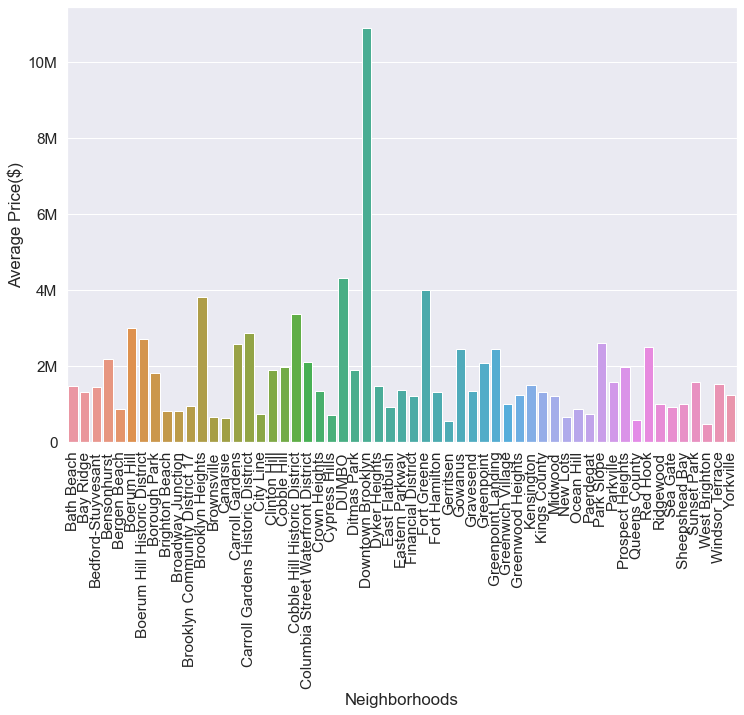

In [229]:
#Lets bar plot the average price of houses by thier neighborhoods 
plt.subplots(figsize=(12, 8))
sns.barplot(x='Neighborhood', y='price', data=house_prices_neighborhood)
plt.xticks(rotation='vertical')
plt.ylabel('Average Price($)')
plt.xlabel('Neighborhoods')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));


In [234]:
#Downtown prices seems really high lets check it out
brooklyn_df[brooklyn_df['Neighborhood'] == 'Downtown Brooklyn']
#It seems it is being skewed by one row which is a large lot as a office space which being sold for 100mil so we should
#drop this oberservation.

City       Neighborhood State      address/streetAddress  ZipCode  \
895   Brooklyn  Downtown Brooklyn    NY         65 Lawrence St #A3  11201.0   
896   Brooklyn  Downtown Brooklyn    NY                383 Gold St  11201.0   
904   Brooklyn  Downtown Brooklyn    NY         69 Lawrence St #C3  11201.0   
911   Brooklyn  Downtown Brooklyn    NY  150 Myrtle Ave 2203 #2203  11201.0   
1281  Brooklyn  Downtown Brooklyn    NY  191 Willoughby St APT 10L  11201.0   
1302  Brooklyn  Downtown Brooklyn    NY      68-76 Schermerhorn St  11201.0   
1314  Brooklyn  Downtown Brooklyn    NY          312 Livingston St  11217.0   
1315  Brooklyn  Downtown Brooklyn    NY          306 Livingston St  11217.0   
1365  Brooklyn  Downtown Brooklyn    NY          304 Livingston St  11217.0   
1399  Brooklyn  Downtown Brooklyn    NY              425 Fulton St  11201.0   
1470  Brooklyn  Downtown Brooklyn    NY          115 Willoughby St  11201.0   
1493  Brooklyn  Downtown Brooklyn    NY          138 Willoughby St  11201.0   
1516  Brooklyn  Downtown Brooklyn    NY            388 Bridge #46D  11201.0   
6316  Brooklyn  Downtown Brooklyn    NY          312 Livingston St  11217.0   
6318  Brooklyn  Downtown Brooklyn    NY          306 Livingston St  11217.0   
6384  Brooklyn  Downtown Brooklyn    NY          304 Livingston St  11217.0   
6427  Brooklyn  Downtown Brooklyn    NY              425 Fulton St  11201.0   
6464  Brooklyn  Downtown Brooklyn    NY  191 Willoughby St APT 10L  11201.0   
6508  Brooklyn  Downtown Brooklyn    NY          115 Willoughby St  11201.0   
6533  Brooklyn  Downtown Brooklyn    NY          138 Willoughby St  11201.0   
6564  Brooklyn  Downtown Brooklyn    NY            388 Bridge #46D  11201.0   
6577  Brooklyn  Downtown Brooklyn    NY      68-76 Schermerhorn St  11201.0   

       latitude  longitude        price  propertyTaxRate       HomeType  \
895   40.693382 -73.986031     941881.0             0.65          Condo   
896   40.692825 -73.983200  100000000.0             0.65    Vacant Land   
904   40.693367 -73.986031     712775.0             0.65          Condo   
911   40.693581 -73.983582    1250000.0             0.65      Apartment   
1281  40.692432 -73.980377     849000.0             0.65          Condo   
1302  40.690624 -73.991051   24750000.0             0.65    Vacant Land   
1314  40.688061 -73.982285    7095000.0             0.65  Single Family   
1315  40.688145 -73.982498   10000000.0             0.65  Single Family   
1365  40.688168 -73.982559    3400000.0             0.65  Single Family   
1399  40.692009 -73.987984   12800000.0             0.65  Single Family   
1470  40.692337 -73.984474    6700000.0             0.65  Single Family   
1493  40.691814 -73.982994    2095710.0             0.65  Single Family   
1516  40.691669 -73.985474     775000.0             0.65          Condo   
6316  40.688061 -73.982285    7095000.0             0.65  Single Family   
6318  40.688145 -73.982498   10000000.0             0.65  Single Family   
6384  40.688168 -73.982559    3400000.0             0.65  Single Family   
6427  40.692009 -73.987984   12800000.0             0.65  Single Family   
6464  40.692432 -73.980377     849000.0             0.65          Condo   
6508  40.692337 -73.984474    6700000.0             0.65  Single Family   
6533  40.691814 -73.982994    2095710.0             0.65  Single Family   
6564  40.691669 -73.985474     775000.0             0.65          Condo   
6577  40.690624 -73.991051   24750000.0             0.65    Vacant Land   

     YearBuilt ParkingType Basement  Total_Bathrooms  Full_Bathrooms  \
895        NaN    0 spaces    False              0.0             NaN   
896        NaN    0 spaces    False              0.0             NaN   
904        NaN    0 spaces    False              0.0             NaN   
911       2009    0 spaces    False              2.0             NaN   
1281      1958    0 spaces    False              2.0             2.0   
1302       NaN    0 spaces    Fals

In [297]:
#We should drop all hometype which is vacant land as these are not typical houses and mess up the distribution 
#of house prices 
vacant_lands = brooklyn_df[brooklyn_df['HomeType'] == 'Vacant Land'].index
brooklyn_df = brooklyn_df.drop(vacant_lands)

In [244]:
brooklyn_df = brooklyn_df.reset_index(drop=True)


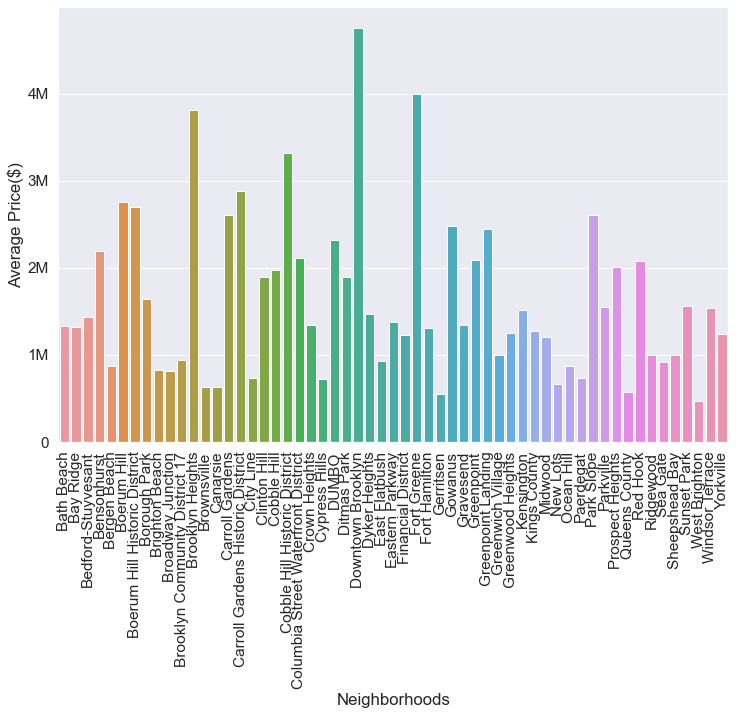

In [299]:
house_prices_neighborhood = brooklyn_df[['Neighborhood','price']].groupby('Neighborhood', as_index=False).mean().round()
plt.subplots(figsize=(12, 8))
sns.barplot(x='Neighborhood', y='price', data=house_prices_neighborhood)
plt.xticks(rotation='vertical')
plt.ylabel('Average Price($)')
plt.xlabel('Neighborhoods')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));


## 1.7 Neighborhood Summary Statistics <a id='1.7_Neighborhood_Summary_Statistics'></a>

In [279]:
neighborhood_summary = brooklyn_df.groupby('Neighborhood').agg(
    houses_in_neighborhood = pd.NamedAgg(column='Neighborhood', aggfunc='count'),
    average_price = pd.NamedAgg(column='price', aggfunc='mean'),
    average_bedrooms = pd.NamedAgg(column='Bedrooms', aggfunc='mean'),
    average_bathrooms = pd.NamedAgg(column='Total_Bathrooms', aggfunc='mean'),
    average_stories_of_buidling = pd.NamedAgg(column='Story_Building', aggfunc='mean')
)

In [282]:
neighborhood_summary['average_price'] = round(neighborhood_summary['average_price'])
neighborhood_summary['average_bedrooms'] = round(neighborhood_summary['average_bedrooms'])
neighborhood_summary['average_bathrooms'] = round(neighborhood_summary['average_bathrooms'])
neighborhood_summary['average_stories_of_buidling'] = round(neighborhood_summary['average_stories_of_buidling'])

In [283]:
neighborhood_summary

houses_in_neighborhood  average_price  \
Neighborhood                                                                 
Bath Beach                                              400      1337149.0   
Bay Ridge                                               291      1315760.0   
Bedford-Stuyvesant                                       33      1437651.0   
Bensonhurst                                              34      2198258.0   
Bergen Beach                                            278       872570.0   
Boerum Hill                                             157      2758810.0   
Boerum Hill Historic District                            68      2702592.0   
Borough Park                                             86      1636571.0   
Brighton Beach                                          185       825834.0   
Broadway Junction                                        31       817249.0   
Brooklyn Community District 17                          433       944492.0   
Brooklyn Heights                                        271      3807673.0   
Brownsville                                             199       637661.0   
Canarsie                                                521       637675.0   
Carroll Gardens                                         180      2606599.0   
Carroll Gardens Historic District                        20      2881389.0   
City Line                                                49       733501.0   
Clinton Hill                                            129      1899989.0   
Cobble Hill                                              46      1978140.0   
Cobble Hill Historic District                           332      3321685.0   
Columbia Street Waterfront District                     138      2111975.0   
Crown Heights                                           232      1347421.0   
Cypress Hills                                            55       724647.0   
DUMBO                                                    28      2316025.0   
Ditmas Park                                              90      1892761.0   
Downtown Brooklyn                                        19      4754425.0   
Dyker Heights                                           193      1464364.0   
East Flatbush                                           209       930508.0   
Eastern Parkway                                          94      1374070.0   
Financial District                                        2      1225000.0   
Fort Greene                                              94      4000504.0   
Fort Hamilton                                           112      1308489.0   
Gerritsen                                               174       552598.0   
Gowanus                                                 132      2476293.0   
Gravesend                                               765      1340961.0   
Greenpoint                                              333      2088833.0   
Greenpoint Landing                                        4      2450000.0   
Greenwich Village                                         1       999000.0   
Greenwood Heights                                        81      1256144.0   
Kensington                                              120      1510141.0   
Kings County                                           5267      1269416.0   
Midwood                                                 168      1202697.0   
New Lots                                                205       665314.0   
Ocean Hill                                              167       873326.0   
Paerdegat                                                69       737413.0   
Park Slope                                              106      2604893.0   
Parkville                                               193      1551647.0   
Prospect Heights                                         41      2015085.0   
Queens County                                             2       579000.0   
Red Hook                                                 92

## 1.8 Save Data <a id='1.8_Save_Data'></a>

In [289]:
#Lets see what our new dataframe looks like
brooklyn_df.info()
brooklyn_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14226 entries, 0 to 14225
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          14226 non-null  object 
 1   Neighborhood                  14226 non-null  object 
 2   State                         14226 non-null  object 
 3   address/streetAddress         14226 non-null  object 
 4   ZipCode                       14224 non-null  float64
 5   latitude                      14226 non-null  float64
 6   longitude                     14226 non-null  float64
 7   price                         14226 non-null  float64
 8   propertyTaxRate               14225 non-null  float64
 9   HomeType                      14180 non-null  object 
 10  YearBuilt                     13472 non-null  object 
 11  ParkingType                   14174 non-null  object 
 12  Basement                      14226 non-null  object 
 13  T

(14226, 45)

In [294]:
brooklyn_df.to_csv(r'C:\Users\izine\Desktop\GitHub\Springboard-Data-Science\Capstone 1\Data\brooklyn_df_cleaned.csv', index=False)

## 1.9 Summary <a id='1.9_Summary'></a>

We are tasked to best estimates prices for houses being built by Capital Fortune real-estate company, who are building houses in Brooklyn, NY. We extracted data from the nyc_housing data from zillow. We need to build a predict model which can best estimate prices for the houses given the brooklyn market. 

We started by inspecting our original dataframe which had over 75k rows and 1507 columns, we began to start cleaning our data as a lot of our columns which were not relevant or repeated information of other columns. We needed to isolate the dataframe for our target location which is Brooklyn so we filtered our nyc dataframe to all address which resided in Brooklyn. 

Next step was to clean up some of the data types for our columns, unfortunately there were a lot of missing data to counter-act we either dropped those columns or imputed data to some important columns. For instance we change our column type of Has_Basement to True or False to simplify this feature. our column names were quite un-intuitive from the original datafile so we relabeled a lot of them for more readable names.  

We noticed there were a lot fo houses which were sold for prices far below their market value for instance a million dollar house was sold for 5000, these are cases where family members sell their property to other family and friends to change ownership and etc. So we excluded these houses, the opposite was also the case there were few observations where their price was 100 million and above we realized a lot of the hometype labeled vacant land were lots for large office space and warehouses behind sold, as these properties does not relate to houses being built by Capital Fortune we ommited these as well. 

We wanted to do an analysis on neighborhoods in brooklyn and how their prices differ so we utilized a geolocator to reverse geocode neighborhoods using latitudes and longitudes which was in our dataframe. One issue was a lot of neighborhood in the Kings County distinct was not coming up in our API so we left them as Kings County thus why they have the largest number of rows. 

Reverse geolocation was a interesting idea but the time it takes to process is unbearable, as we are capped to one requests per second with our API, it took hours to finish our neighborhood look up. But once we gathered all the neighborhoods via its latitude and longitude we were able to see how the average price of their houses were distributed for each neighborhood. We also peeked into some neighborhood summary

While this was a cleaning of the data I believe we better fine tune our data and perphaps impute more missing data based on better classification rather than just using the average. 